## Libraries

In [442]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from plotly.colors import qualitative
import statsmodels.api as smf
import statsmodels.formula.api as smf
import seaborn as sns

## Reading from CSV 

In [443]:
stop_and_search_2019 = pd.read_csv('../../Data/Police_Data/met_sas_2019_after_processing_and_concatenating/met_sas_2019.csv')
stop_and_search_2020 = pd.read_csv('../../Data/Police_Data/met_sas_2020_after_processing_and_concatenating/met_sas_2020.csv')
stop_and_search_2021 = pd.read_csv('../../Data/Police_Data/met_sas_2021_after_processing_and_concatenating/met_sas_2021.csv')

census_ethnicities_2021 = pd.read_csv('../../Data/Ethnic_Groups/Ethnic_group_2021_cleaned.csv')
census_ethnicities_2011 = pd.read_csv('../../Data/Ethnic_Groups/Ethnic_group_2011_cleaned.csv')

## EDA of Stop and Search 2019-2020-2021

In [444]:
# Concatenating the three years
stop_and_search_2019_2020_2021 = pd.concat([stop_and_search_2019, stop_and_search_2020, stop_and_search_2021])
stop_and_search_2019_2020_2021

Type                       Date Gender Age range  \
0                   Person search  2019-01-01T00:00:00+00:00   Male   over 34   
1                   Person search  2019-01-01T00:01:00+00:00   Male     10-17   
2       Person and Vehicle search  2019-01-01T00:04:00+00:00   Male     25-34   
3       Person and Vehicle search  2019-01-01T00:05:00+00:00   Male     18-24   
4                   Person search  2019-01-01T00:05:00+00:00   Male     18-24   
...                           ...                        ...    ...       ...   
169641              Person search  2021-12-31T23:52:00+00:00   Male     25-34   
169642  Person and Vehicle search  2021-12-31T23:55:00+00:00   Male     25-34   
169643  Person and Vehicle search  2021-12-31T23:56:00+00:00   Male     18-24   
169644              Person search  2021-12-31T23:56:00+00:00   Male     10-17   
169645              Person search  2021-12-31T23:59:00+00:00   Male     18-24   

       Self-defined ethnicity Officer-defined ethnicity  \
0                       Black                     Black   
1                       White                     White   
2                       White                     White   
3                       Black                     Black   
4                       Black                     Black   
...                       ...                       ...   
169641                  Other                     White   
169642                  Black                     Black   
169643                  White                     White   
169644                  Black                     Black   
169645                  Black                     Black   

                          Object of search                       Outcome  \
0                         Controlled drugs  A no further action disposal   
1       Evidence of offences under the Act                        Arrest   
2                         Controlled drugs                        Arrest   
3                         Controlled drugs          Community resolution   
4                         Controlled drugs  A no further action disposal   
...                                    ...                           ...   
169641                    Controlled drugs          Community resolution   
169642  Evidence of offences under the Act                        Arrest   
169643                    Controlled drugs  A no further action disposal   
169644                    Controlled drugs                        Arrest   
169645                    Controlled drugs  A no further action disposal   

                       Borough  
0       Kensington and Chelsea  
1                  Westminster  
2                    Greenwich  
3                    Redbridge  
4                    Redbridge  
...                        ...  
169641                Haringey  
169642               Greenwich  
169643             Westminster  
169644                 Croydon  
169645                 Croydon  

[610798 rows x 9 columns]

### Checking number of locations/boroughs

In [445]:
# unique values of column 'Borough'
boroughs = stop_and_search_2019_2020_2021['Borough'].unique()
len(boroughs)

32

### Date transformations

In [446]:
# turning column 'Date' into datetime
stop_and_search_2019_2020_2021['Date'] = pd.to_datetime(stop_and_search_2019_2020_2021['Date'])
stop_and_search_2019_2020_2021

Type                      Date Gender Age range  \
0                   Person search 2019-01-01 00:00:00+00:00   Male   over 34   
1                   Person search 2019-01-01 00:01:00+00:00   Male     10-17   
2       Person and Vehicle search 2019-01-01 00:04:00+00:00   Male     25-34   
3       Person and Vehicle search 2019-01-01 00:05:00+00:00   Male     18-24   
4                   Person search 2019-01-01 00:05:00+00:00   Male     18-24   
...                           ...                       ...    ...       ...   
169641              Person search 2021-12-31 23:52:00+00:00   Male     25-34   
169642  Person and Vehicle search 2021-12-31 23:55:00+00:00   Male     25-34   
169643  Person and Vehicle search 2021-12-31 23:56:00+00:00   Male     18-24   
169644              Person search 2021-12-31 23:56:00+00:00   Male     10-17   
169645              Person search 2021-12-31 23:59:00+00:00   Male     18-24   

       Self-defined ethnicity Officer-defined ethnicity  \
0                       Black                     Black   
1                       White                     White   
2                       White                     White   
3                       Black                     Black   
4                       Black                     Black   
...                       ...                       ...   
169641                  Other                     White   
169642                  Black                     Black   
169643                  White                     White   
169644                  Black                     Black   
169645                  Black                     Black   

                          Object of search                       Outcome  \
0                         Controlled drugs  A no further action disposal   
1       Evidence of offences under the Act                        Arrest   
2                         Controlled drugs                        Arrest   
3                         Controlled drugs          Community resolution   
4                         Controlled drugs  A no further action disposal   
...                                    ...                           ...   
169641                    Controlled drugs          Community resolution   
169642  Evidence of offences under the Act                        Arrest   
169643                    Controlled drugs  A no further action disposal   
169644                    Controlled drugs                        Arrest   
169645                    Controlled drugs  A no further action disposal   

                       Borough  
0       Kensington and Chelsea  
1                  Westminster  
2                    Greenwich  
3                    Redbridge  
4                    Redbridge  
...                        ...  
169641                Haringey  
169642               Greenwich  
169643             Westminster  
169644                 Croydon  
169645                 Croydon  

[610798 rows x 9 columns]

In [447]:
# creating a new column 'Month' to store the month of each stop and search
stop_and_search_2019_2020_2021['Month'] = stop_and_search_2019_2020_2021['Date'].dt.month
stop_and_search_2019_2020_2021

# creating a new column 'Year' to store the year of each stop and search
stop_and_search_2019_2020_2021['Year'] = stop_and_search_2019_2020_2021['Date'].dt.year
stop_and_search_2019_2020_2021

# creating a new column 'Month_Year' to store the month and year of each stop and search
stop_and_search_2019_2020_2021['Month_Year'] = stop_and_search_2019_2020_2021['Date'].dt.strftime('%b-%Y')
stop_and_search_2019_2020_2021

Type                      Date Gender Age range  \
0                   Person search 2019-01-01 00:00:00+00:00   Male   over 34   
1                   Person search 2019-01-01 00:01:00+00:00   Male     10-17   
2       Person and Vehicle search 2019-01-01 00:04:00+00:00   Male     25-34   
3       Person and Vehicle search 2019-01-01 00:05:00+00:00   Male     18-24   
4                   Person search 2019-01-01 00:05:00+00:00   Male     18-24   
...                           ...                       ...    ...       ...   
169641              Person search 2021-12-31 23:52:00+00:00   Male     25-34   
169642  Person and Vehicle search 2021-12-31 23:55:00+00:00   Male     25-34   
169643  Person and Vehicle search 2021-12-31 23:56:00+00:00   Male     18-24   
169644              Person search 2021-12-31 23:56:00+00:00   Male     10-17   
169645              Person search 2021-12-31 23:59:00+00:00   Male     18-24   

       Self-defined ethnicity Officer-defined ethnicity  \
0                       Black                     Black   
1                       White                     White   
2                       White                     White   
3                       Black                     Black   
4                       Black                     Black   
...                       ...                       ...   
169641                  Other                     White   
169642                  Black                     Black   
169643                  White                     White   
169644                  Black                     Black   
169645                  Black                     Black   

                          Object of search                       Outcome  \
0                         Controlled drugs  A no further action disposal   
1       Evidence of offences under the Act                        Arrest   
2                         Controlled drugs                        Arrest   
3                         Controlled drugs          Community resolution   
4                         Controlled drugs  A no further action disposal   
...                                    ...                           ...   
169641                    Controlled drugs          Community resolution   
169642  Evidence of offences under the Act                        Arrest   
169643                    Controlled drugs  A no further action disposal   
169644                    Controlled drugs                        Arrest   
169645                    Controlled drugs  A no further action disposal   

                       Borough  Month  Year Month_Year  
0       Kensington and Chelsea      1  2019   Jan-2019  
1                  Westminster      1  2019   Jan-2019  
2                    Greenwich      1  2019   Jan-2019  
3                    Redbridge      1  2019   Jan-2019  
4                    Redbridge      1  2019   Jan-2019  
...                        ...    ...   ...        ...  
169641                Haringey     12  2021   Dec-2021  
169642               Greenwich     12  2021   Dec-2021  
169643             Westminster     12  2021   Dec-2021  
169644                 Croydon     12  2021   Dec-2021  
169645                 Croydon     12  2021   Dec-2021  

[610798 rows x 12 columns]

### Number of Stop and Search by Year

In [448]:
stop_and_search_2019_2020_2021['Year'].value_counts()

2020    237374
2019    203778
2021    169646
Name: Year, dtype: int64

In [449]:
# Grouping by 'Year' and counting the number of stop and search
stop_and_search_2019_2020_2021_grouped_by_year = stop_and_search_2019_2020_2021.groupby('Year').count()
stop_and_search_2019_2020_2021_grouped_by_year.reset_index(inplace=True)

# Creating the bar plot
fig = go.Figure(data=[go.Bar(
    x=stop_and_search_2019_2020_2021_grouped_by_year['Year'],
    y=stop_and_search_2019_2020_2021_grouped_by_year['Type'],
    text=stop_and_search_2019_2020_2021_grouped_by_year['Type'],
    textposition='auto'
)])

# Updating the layout
fig.update_layout(
    title={
        'text': 'Number of Stop and Search by Year',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title='Year',
    yaxis_title='Stop and Search Counts',
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=1),
    width=600,
    height=500
)

fig.show()


In [450]:
# Creating a new dataframe to store the results
stop_and_search_per_month = pd.DataFrame()

# Groupping the data by year and month, and counting the number of occurrences
stop_and_search_per_month['Count'] = stop_and_search_2019_2020_2021.groupby(['Year', 'Month']).size().reset_index(name='Count')['Count']

stop_and_search_per_month[['Year', 'Month']] = stop_and_search_2019_2020_2021.groupby(['Year', 'Month']).size().reset_index()[['Year', 'Month']]

stop_and_search_per_month


Count  Year  Month
0   14193  2019      1
1   14418  2019      2
2   20781  2019      3
3   16242  2019      4
4   16780  2019      5
5   17898  2019      6
6   19123  2019      7
7   19802  2019      8
8   16696  2019      9
9   16892  2019     10
10  16404  2019     11
11  14549  2019     12
12  20318  2020      1
13  17686  2020      2
14  17956  2020      3
15  24162  2020      4
16  33175  2020      5
17  22268  2020      6
18  19104  2020      7
19  14884  2020      8
20  14671  2020      9
21  18137  2020     10
22  19687  2020     11
23  15326  2020     12
24  16559  2021      1
25  19405  2021      2
26  18822  2021      3
27  16307  2021      4
28  14773  2021      5
29  12381  2021      6
30  11750  2021      7
31  12152  2021      8
32  10513  2021      9
33  13507  2021     10
34  12385  2021     11
35  11092  2021     12

### Self-defined Ethnicty vs Officer-defined Ethnicity 

In [451]:
stop_and_search_2019_2020_2021_sd_ethnicities=stop_and_search_2019_2020_2021.groupby(['Year','Self-defined ethnicity']).count().reset_index()
stop_and_search_2019_2020_2021_sd_ethnicities['Sd Count'] = stop_and_search_2019_2020_2021_sd_ethnicities['Type']
stop_and_search_2019_2020_2021_sd_ethnicities = stop_and_search_2019_2020_2021_sd_ethnicities[['Year','Self-defined ethnicity','Sd Count']]
# rename the column 'self-defined ethnicity' to ethnicity
stop_and_search_2019_2020_2021_sd_ethnicities.rename(columns={'Self-defined ethnicity':'Ethnicity'}, inplace=True)
stop_and_search_2019_2020_2021_sd_ethnicities

Year Ethnicity  Sd Count
0   2019     Asian     30353
1   2019     Black     60089
2   2019     Mixed      7357
3   2019     Other     38701
4   2019     White     67278
5   2020     Asian     34577
6   2020     Black     62158
7   2020     Mixed      8470
8   2020     Other     52485
9   2020     White     79684
10  2021     Asian     22920
11  2021     Black     41035
12  2021     Mixed      5974
13  2021     Other     42768
14  2021     White     56949

In [452]:
stop_and_search_2019_2020_2021_od_ethnicities=stop_and_search_2019_2020_2021.groupby(['Year','Officer-defined ethnicity']).count().reset_index()
stop_and_search_2019_2020_2021_od_ethnicities['Od Count'] = stop_and_search_2019_2020_2021_od_ethnicities['Type']
stop_and_search_2019_2020_2021_od_ethnicities = stop_and_search_2019_2020_2021_od_ethnicities[['Year','Officer-defined ethnicity','Od Count']]
stop_and_search_2019_2020_2021_od_ethnicities.rename(columns={'Officer-defined ethnicity':'Ethnicity'}, inplace=True)
stop_and_search_2019_2020_2021_od_ethnicities

Year Ethnicity  Od Count
0   2019     Asian     35576
1   2019     Black     80294
2   2019     Other      8324
3   2019     White     79584
4   2020     Asian     42524
5   2020     Black     87364
6   2020     Other     11387
7   2020     White     96099
8   2021     Asian     29474
9   2021     Black     60340
10  2021     Other      8842
11  2021     White     70990

In [453]:
# merging the dataframes stop_and_search_2019_2020_2021_sd_ethnicities and stop_and_search_2019_2020_2021_od_ethnicities on year
merged_Sd_Od = pd.merge(stop_and_search_2019_2020_2021_sd_ethnicities, stop_and_search_2019_2020_2021_od_ethnicities, on=['Year', 'Ethnicity'], how='left')
merged_Sd_Od

Year Ethnicity  Sd Count  Od Count
0   2019     Asian     30353   35576.0
1   2019     Black     60089   80294.0
2   2019     Mixed      7357       NaN
3   2019     Other     38701    8324.0
4   2019     White     67278   79584.0
5   2020     Asian     34577   42524.0
6   2020     Black     62158   87364.0
7   2020     Mixed      8470       NaN
8   2020     Other     52485   11387.0
9   2020     White     79684   96099.0
10  2021     Asian     22920   29474.0
11  2021     Black     41035   60340.0
12  2021     Mixed      5974       NaN
13  2021     Other     42768    8842.0
14  2021     White     56949   70990.0

### Composition of Stop and Search Incidents by Ethnic Group Each Year: 2019-2021

In [454]:

# Grouping data by 'Year' and 'Self-defined ethnicity' to get the count of each ethnicity per year
grouped_df_ethnicity_per_year = stop_and_search_2019_2020_2021.groupby(['Year', 'Self-defined ethnicity']).size().reset_index(name='Counts')

# Creating traces for each ethnicity
traces = []
ethnicities = grouped_df_ethnicity_per_year['Self-defined ethnicity'].unique()
for ethnicity in ethnicities:
    df_ethnicity = grouped_df_ethnicity_per_year[grouped_df_ethnicity_per_year['Self-defined ethnicity'] == ethnicity]
    traces.append(go.Bar(name=ethnicity, x=df_ethnicity['Year'], y=df_ethnicity['Counts']))

# Creating the layout for the plot
layout = go.Layout(
        title=dict(
        text='Stop and Search Incidents of Each Ethnicity Per Year: 2019-2021',
        x=0.5, # this line centers the title
        y=0.9, # this line positions the title vertically
    ),
        legend=dict(
        title="Ethnic Group",
    ),
        barmode='group',  # for grouped bar plot
        xaxis_title="Year",
        yaxis_title="Stop and Search Counts",
        autosize=False,
        width=600,
        height=500
)

# Creating the figure and adding the traces
fig = go.Figure(data=traces, layout=layout)

# Showing the plot
fig.show()

In [455]:
grouped_df_ethnicity_per_year

Year Self-defined ethnicity  Counts
0   2019                  Asian   30353
1   2019                  Black   60089
2   2019                  Mixed    7357
3   2019                  Other   38701
4   2019                  White   67278
5   2020                  Asian   34577
6   2020                  Black   62158
7   2020                  Mixed    8470
8   2020                  Other   52485
9   2020                  White   79684
10  2021                  Asian   22920
11  2021                  Black   41035
12  2021                  Mixed    5974
13  2021                  Other   42768
14  2021                  White   56949

### Number of Stop and Search by Ethnicity for Each Type Across Years

In [456]:
stop_and_search_2019_2020_2021_grouped_by_type_self = stop_and_search_2019_2020_2021.groupby(['Year','Type','Self-defined ethnicity']).count().reset_index()
stop_and_search_2019_2020_2021_grouped_by_type_self

Year                       Type Self-defined ethnicity   Date  Gender  \
0   2019  Person and Vehicle search                  Asian  10594   10594   
1   2019  Person and Vehicle search                  Black  14347   14347   
2   2019  Person and Vehicle search                  Mixed   1764    1764   
3   2019  Person and Vehicle search                  Other   8003    8003   
4   2019  Person and Vehicle search                  White  11671   11671   
5   2019              Person search                  Asian  19663   19663   
6   2019              Person search                  Black  45600   45600   
7   2019              Person search                  Mixed   5572    5572   
8   2019              Person search                  Other  30626   30626   
9   2019              Person search                  White  55489   55489   
10  2019             Vehicle search                  Asian     96      96   
11  2019             Vehicle search                  Black    142     142   
12  2019             Vehicle search                  Mixed     21      21   
13  2019             Vehicle search                  Other     72      72   
14  2019             Vehicle search                  White    118     118   
15  2020  Person and Vehicle search                  Asian  12778   12778   
16  2020  Person and Vehicle search                  Black  17993   17993   
17  2020  Person and Vehicle search                  Mixed   2191    2191   
18  2020  Person and Vehicle search                  Other  12997   12997   
19  2020  Person and Vehicle search                  White  17183   17183   
20  2020              Person search                  Asian  21709   21709   
21  2020              Person search                  Black  44023   44023   
22  2020              Person search                  Mixed   6259    6259   
23  2020              Person search                  Other  39378   39378   
24  2020              Person search                  White  62339   62339   
25  2020             Vehicle search                  Asian     90      90   
26  2020             Vehicle search                  Black    142     142   
27  2020             Vehicle search                  Mixed     20      20   
28  2020             Vehicle search                  Other    110     110   
29  2020             Vehicle search                  White    162     162   
30  2021  Person and Vehicle search                  Asian   8292    8292   
31  2021  Person and Vehicle search                  Black  11465   11465   
32  2021  Person and Vehicle search                  Mixed   1537    1537   
33  2021  Person and Vehicle search                  Other  10734   10734   
34  2021  Person and Vehicle search                  White  12483   12483   
35  2021              Person search                  Asian  14583   14583   
36  2021              Person search                  Black  29482   29482   
37  2021              Person search                  Mixed   4420    4420   
38  2021              Person search                  Other  31950   31950   
39  2021              Person search                  White  44353   44353   
40  2021             Vehicle search                  Asian     45      45   
41  2021             Vehicle search                  Black     88      88   
42  2021             Vehicle search                  Mixed     17      17   
43  2021             Vehicle search                  Other     84      84   
44  2021             Vehicle search                  White    113     113   

    Age range  Officer-defined ethnicity  Object of search  Outcome  Borough  \
0       10594                      10594             10594    10594    10594   
1       14347                      14347             14347    14347    14347   
2        1764                       1764              1764     1764     1764   
3        8003                       8003              8003     8003     8003   
4       11671                      11671             11671   

In [457]:
# grouping the data
stop_search_type_grouped = stop_and_search_2019_2020_2021.groupby(['Year', 'Type', 'Self-defined ethnicity']).size().reset_index(name='Counts')


# creating a long dataframe
long_df = stop_search_type_grouped.melt(id_vars=['Year', 'Type', 'Self-defined ethnicity'], 
                                   value_vars=['Counts'], 
                                   var_name='Counts', 
                                   value_name='Number')

# creating the stacked bar chart
fig = px.bar(long_df,
             x="Type",
             y="Number",
             color="Self-defined ethnicity",
             facet_col="Year",
             labels={'Number':'Stop and Search Counts', 'Type': 'Type', 'Year': 'Year'},
             title="Number of Stop and Search by Ethnicity for Each Type Across Years",
            )

# adjusting the layout
fig.update_layout(barmode='stack',
                  title=dict(
                    text='Number of Stop and Search by Ethnicity for Each Type Across Years',
                    x=0.48, # this line centers the title
                    y=0.94, # this line positions the title vertically
                ), 
                legend=dict(
                title="Ethnic Group",
    ),
                annotations=[
                    dict(text='2019', x=0.15, y=1.0, showarrow=False, xref='paper', yref='paper', font=dict(size=14)),
                    dict(text='2020', x=0.5, y=1.0, showarrow=False, xref='paper', yref='paper', font=dict(size=14)),
                    dict(text='2021', x=0.85, y=1.0, showarrow=False, xref='paper', yref='paper', font=dict(size=14)),
                ],
                  width=800, 
                  height=400)

# showing the plot
fig.show()


In [458]:
long_df

Year                       Type Self-defined ethnicity  Counts  Number
0   2019  Person and Vehicle search                  Asian  Counts   10594
1   2019  Person and Vehicle search                  Black  Counts   14347
2   2019  Person and Vehicle search                  Mixed  Counts    1764
3   2019  Person and Vehicle search                  Other  Counts    8003
4   2019  Person and Vehicle search                  White  Counts   11671
5   2019              Person search                  Asian  Counts   19663
6   2019              Person search                  Black  Counts   45600
7   2019              Person search                  Mixed  Counts    5572
8   2019              Person search                  Other  Counts   30626
9   2019              Person search                  White  Counts   55489
10  2019             Vehicle search                  Asian  Counts      96
11  2019             Vehicle search                  Black  Counts     142
12  2019             Vehicle search                  Mixed  Counts      21
13  2019             Vehicle search                  Other  Counts      72
14  2019             Vehicle search                  White  Counts     118
15  2020  Person and Vehicle search                  Asian  Counts   12778
16  2020  Person and Vehicle search                  Black  Counts   17993
17  2020  Person and Vehicle search                  Mixed  Counts    2191
18  2020  Person and Vehicle search                  Other  Counts   12997
19  2020  Person and Vehicle search                  White  Counts   17183
20  2020              Person search                  Asian  Counts   21709
21  2020              Person search                  Black  Counts   44023
22  2020              Person search                  Mixed  Counts    6259
23  2020              Person search                  Other  Counts   39378
24  2020              Person search                  White  Counts   62339
25  2020             Vehicle search                  Asian  Counts      90
26  2020             Vehicle search                  Black  Counts     142
27  2020             Vehicle search                  Mixed  Counts      20
28  2020             Vehicle search                  Other  Counts     110
29  2020             Vehicle search                  White  Counts     162
30  2021  Person and Vehicle search                  Asian  Counts    8292
31  2021  Person and Vehicle search                  Black  Counts   11465
32  2021  Person and Vehicle search                  Mixed  Counts    1537
33  2021  Person and Vehicle search                  Other  Counts   10734
34  2021  Person and Vehicle search                  White  Counts   12483
35  2021              Person search                  Asian  Counts   14583
36  2021              Person search                  Black  Counts   29482
37  2021              Person search                  Mixed  Counts    4420
38  2021              Person search                  Other  Counts   31950
39  2021              Person search                  White  Counts   44353
40  2021             Vehicle search                  Asian  Counts      45
41  2021             Vehicle search                  Black  Counts      88
42  2021             Vehicle search                  Mixed  Counts      17
43  2021             Vehicle search                  Other  Counts      84
44  2021             Vehicle search                  White  Counts     113

In [459]:
stop_and_search_2019_2020_2021['Type'].value_counts()

Person search                455446
Person and Vehicle search    154032
Vehicle search                 1320
Name: Type, dtype: int64

### Number of Stop and Search by Ethnicity for Each Age Range Across Years

In [460]:
stop_and_search_2019_2020_2021_age_ethn=stop_and_search_2019_2020_2021.groupby(['Year','Age range', 'Self-defined ethnicity']).count().reset_index()
stop_and_search_2019_2020_2021_age_ethn.head(75)

Year Age range Self-defined ethnicity   Type   Date  Gender  \
0   2019     10-17                  Asian   4629   4629    4629   
1   2019     10-17                  Black  14565  14565   14565   
2   2019     10-17                  Mixed   1998   1998    1998   
3   2019     10-17                  Other   8123   8123    8123   
4   2019     10-17                  White  11910  11910   11910   
..   ...       ...                    ...    ...    ...     ...   
70  2021  under 10                  Asian      8      8       8   
71  2021  under 10                  Black     14     14      14   
72  2021  under 10                  Mixed      1      1       1   
73  2021  under 10                  Other     19     19      19   
74  2021  under 10                  White     10     10      10   

    Officer-defined ethnicity  Object of search  Outcome  Borough  Month  \
0                        4629              4629     4629     4629   4629   
1                       14565             14565    14565    14565  14565   
2                        1998              1998     1998     1998   1998   
3                        8123              8123     8123     8123   8123   
4                       11910             11910    11910    11910  11910   
..                        ...               ...      ...      ...    ...   
70                          8                 8        8        8      8   
71                         14                14       14       14     14   
72                          1                 1        1        1      1   
73                         19                19       19       19     19   
74                         10                10       10       10     10   

    Month_Year  
0         4629  
1        14565  
2         1998  
3         8123  
4        11910  
..         ...  
70           8  
71          14  
72           1  
73          19  
74          10  

[75 rows x 12 columns]

In [461]:
# creating a long dataframe
long_df = stop_and_search_2019_2020_2021_age_ethn.melt(id_vars=['Year', 'Age range', 'Self-defined ethnicity'], value_vars=['Type'], 
                                                        var_name='Type', value_name='Count')

# creating the stacked bar chart
fig = px.bar(long_df,
             x="Age range",
             y="Count",
             color="Self-defined ethnicity",
             facet_col="Year",
             labels={'Count':'Stop and Search Counts', 'Age range': 'Age Range', 'Year': 'Year'},
             title="Number of Stop and Search by Ethnicity for Each Age Range Across Years",
             category_orders={"Age range": ['under 10', '10-17', '18-24', '25-34', 'over 34']}
            )

# adjusting the layout
fig.update_layout(barmode='stack',
                  title=dict(
                    text='Number of Stop and Search by Ethnicity for Each Age Range Across Years',
                    x=0.48, # this line centers the title
                    y=0.94, # this line positions the title vertically
                ), 
                legend=dict(
                title="Ethnic Group",
    ),
                annotations=[
                    dict(text='2019', x=0.15, y=1.0, showarrow=False, xref='paper', yref='paper', font=dict(size=14)),
                    dict(text='2020', x=0.5, y=1.0, showarrow=False, xref='paper', yref='paper', font=dict(size=14)),
                    dict(text='2021', x=0.85, y=1.0, showarrow=False, xref='paper', yref='paper', font=dict(size=14)),
                ],
                  width=800, 
                  height=400)

# Updating x-axis layout
fig.update_xaxes(matches='x')
# showing the plot
fig.show()

In [462]:
stop_and_search_2019_2020_2021.groupby('Year')['Age range'].value_counts()

Year  Age range
2019  18-24        78458
      25-34        48134
      10-17        41225
      over 34      35920
      under 10        41
2020  18-24        92332
      25-34        60158
      over 34      43949
      10-17        40879
      under 10        56
2021  18-24        62192
      25-34        43992
      over 34      35788
      10-17        27622
      under 10        52
Name: Age range, dtype: int64

In [463]:
stop_and_search_2019_2020_2021['Age range'].value_counts()

18-24       232982
25-34       152284
over 34     115657
10-17       109726
under 10       149
Name: Age range, dtype: int64

### Number of Stop and Search by Ethnicity for Each Gender Across Years

In [464]:
stop_and_search_2019_2020_2021_year_gender_ethn = stop_and_search_2019_2020_2021.groupby(['Year','Gender', 'Self-defined ethnicity']).count().reset_index()
stop_and_search_2019_2020_2021_year_gender_ethn

Year  Gender Self-defined ethnicity   Type   Date  Age range  \
0   2019  Female                  Asian    885    885        885   
1   2019  Female                  Black   2654   2654       2654   
2   2019  Female                  Mixed    559    559        559   
3   2019  Female                  Other   2291   2291       2291   
4   2019  Female                  White   7381   7381       7381   
5   2019    Male                  Asian  29457  29457      29457   
6   2019    Male                  Black  57423  57423      57423   
7   2019    Male                  Mixed   6794   6794       6794   
8   2019    Male                  Other  36403  36403      36403   
9   2019    Male                  White  59870  59870      59870   
10  2019   Other                  Asian     11     11         11   
11  2019   Other                  Black     12     12         12   
12  2019   Other                  Mixed      4      4          4   
13  2019   Other                  Other      7      7          7   
14  2019   Other                  White     27     27         27   
15  2020  Female                  Asian   1107   1107       1107   
16  2020  Female                  Black   2897   2897       2897   
17  2020  Female                  Mixed    714    714        714   
18  2020  Female                  Other   3262   3262       3262   
19  2020  Female                  White   8910   8910       8910   
20  2020    Male                  Asian  33452  33452      33452   
21  2020    Male                  Black  59236  59236      59236   
22  2020    Male                  Mixed   7753   7753       7753   
23  2020    Male                  Other  49196  49196      49196   
24  2020    Male                  White  70737  70737      70737   
25  2020   Other                  Asian     18     18         18   
26  2020   Other                  Black     25     25         25   
27  2020   Other                  Mixed      3      3          3   
28  2020   Other                  Other     27     27         27   
29  2020   Other                  White     37     37         37   
30  2021  Female                  Asian    822    822        822   
31  2021  Female                  Black   2174   2174       2174   
32  2021  Female                  Mixed    554    554        554   
33  2021  Female                  Other   2897   2897       2897   
34  2021  Female                  White   6744   6744       6744   
35  2021    Male                  Asian  22083  22083      22083   
36  2021    Male                  Black  38846  38846      38846   
37  2021    Male                  Mixed   5418   5418       5418   
38  2021    Male                  Other  39848  39848      39848   
39  2021    Male                  White  50178  50178      50178   
40  2021   Other                  Asian     15     15         15   
41  2021   Other                  Black     15     15         15   
42  2021   Other                  Mixed      2      2          2   
43  2021   Other                  Other     23     23         23   
44  2021   Other                  White     27     27         27   

    Officer-defined ethnicity  Object of search  Outcome  Borough  Month  \
0                         885               885      885      885    885   
1                        2654              2654     2654     2654   2654   
2                         559               559      559      559    559   
3                        2291              2291     2291     2291   2291   
4                        7381              7381     7381     7381   7381   
5                       29457             29457    29457    29457  29457   
6                       57423             57423    57423    57423  57423   
7                        6794              6794     6794     6794   6794   
8                       36403             36403    36403    36403  36403   
9                       59870             59870    59870    59870  59870   
10                         11          

In [465]:
# creating a long dataframe
long_df = stop_and_search_2019_2020_2021_year_gender_ethn.melt(id_vars=['Year', 'Gender', 'Self-defined ethnicity'], 
                                                                value_vars=['Type'], 
                                                                var_name='Type', 
                                                                value_name='Count')

# creating the stacked bar chart
fig = px.bar(long_df,
             x="Gender",
             y="Count",
             color="Self-defined ethnicity",
             facet_col="Year",
             labels={'Count':'Stop and Search Counts', 'Gender': 'Gender', 'Year': 'Year'},
             title="Number of Stop and Search by Ethnicity for Each Gender Across Years",
            )

# adjusting the layout
fig.update_layout(barmode='stack',
                  title=dict(
                    text='Number of Stop and Search by Ethnicity for Each Gender Across Years',
                    x=0.48, # this line centers the title
                    y=0.94, # this line positions the title vertically
                ), 
                annotations=[
                    dict(text='2019', x=0.15, y=1.0, showarrow=False, xref='paper', yref='paper', font=dict(size=14)),
                    dict(text='2020', x=0.5, y=1.0, showarrow=False, xref='paper', yref='paper', font=dict(size=14)),
                    dict(text='2021', x=0.85, y=1.0, showarrow=False, xref='paper', yref='paper', font=dict(size=14)),
                ],
                legend=dict(
                title="Ethnic Group",
                # orientation="v",
                # yanchor="bottom",
                # y=0.35,
                # xanchor="right",
                # x=1.15
            ),
                  width=800, 
                  height=400)

# showing the plot
fig.show()


In [466]:
stop_and_search_2019_2020_2021.groupby('Year')['Gender'].value_counts()

Year  Gender
2019  Male      189947
      Female     13770
      Other         61
2020  Male      220374
      Female     16890
      Other        110
2021  Male      156373
      Female     13191
      Other         82
Name: Gender, dtype: int64

In [467]:
stop_and_search_2019_2020_2021

Type                      Date Gender Age range  \
0                   Person search 2019-01-01 00:00:00+00:00   Male   over 34   
1                   Person search 2019-01-01 00:01:00+00:00   Male     10-17   
2       Person and Vehicle search 2019-01-01 00:04:00+00:00   Male     25-34   
3       Person and Vehicle search 2019-01-01 00:05:00+00:00   Male     18-24   
4                   Person search 2019-01-01 00:05:00+00:00   Male     18-24   
...                           ...                       ...    ...       ...   
169641              Person search 2021-12-31 23:52:00+00:00   Male     25-34   
169642  Person and Vehicle search 2021-12-31 23:55:00+00:00   Male     25-34   
169643  Person and Vehicle search 2021-12-31 23:56:00+00:00   Male     18-24   
169644              Person search 2021-12-31 23:56:00+00:00   Male     10-17   
169645              Person search 2021-12-31 23:59:00+00:00   Male     18-24   

       Self-defined ethnicity Officer-defined ethnicity  \
0                       Black                     Black   
1                       White                     White   
2                       White                     White   
3                       Black                     Black   
4                       Black                     Black   
...                       ...                       ...   
169641                  Other                     White   
169642                  Black                     Black   
169643                  White                     White   
169644                  Black                     Black   
169645                  Black                     Black   

                          Object of search                       Outcome  \
0                         Controlled drugs  A no further action disposal   
1       Evidence of offences under the Act                        Arrest   
2                         Controlled drugs                        Arrest   
3                         Controlled drugs          Community resolution   
4                         Controlled drugs  A no further action disposal   
...                                    ...                           ...   
169641                    Controlled drugs          Community resolution   
169642  Evidence of offences under the Act                        Arrest   
169643                    Controlled drugs  A no further action disposal   
169644                    Controlled drugs                        Arrest   
169645                    Controlled drugs  A no further action disposal   

                       Borough  Month  Year Month_Year  
0       Kensington and Chelsea      1  2019   Jan-2019  
1                  Westminster      1  2019   Jan-2019  
2                    Greenwich      1  2019   Jan-2019  
3                    Redbridge      1  2019   Jan-2019  
4                    Redbridge      1  2019   Jan-2019  
...                        ...    ...   ...        ...  
169641                Haringey     12  2021   Dec-2021  
169642               Greenwich     12  2021   Dec-2021  
169643             Westminster     12  2021   Dec-2021  
169644                 Croydon     12  2021   Dec-2021  
169645                 Croydon     12  2021   Dec-2021  

[610798 rows x 12 columns]

### Stop and searches per borough 2021

In [468]:
stop_and_search_per_borough_2021 = stop_and_search_2019_2020_2021[stop_and_search_2019_2020_2021['Year']==2021].groupby(['Borough']).count()
stop_and_search_per_borough_2021 = stop_and_search_per_borough_2021['Type'].reset_index()
stop_and_search_per_borough_2021.rename(columns={'Type': 'Count'}, inplace=True)
stop_and_search_per_borough_2021.sort_values(by='Count', ascending=False, inplace=True)
stop_and_search_per_borough_2021

Borough  Count
31             Westminster  11573
20                 Lambeth   9462
26               Southwark   9190
28           Tower Hamlets   9189
23                  Newham   9177
6                  Croydon   9110
9                Greenwich   7423
3                    Brent   6383
7                   Ealing   6175
10                 Hackney   6143
5                   Camden   5810
24               Redbridge   5574
4                  Bromley   5546
29          Waltham Forest   5277
15              Hillingdon   5153
21                Lewisham   4994
17               Islington   4588
0     Barking and Dagenham   4573
12                Haringey   4527
16                Hounslow   4235
30              Wandsworth   3738
18  Kensington and Chelsea   3697
14                Havering   3550
11  Hammersmith and Fulham   3546
8                  Enfield   3386
13                  Harrow   3157
1                   Barnet   3115
2                   Bexley   2981
19    Kingston upon Thames   2450
22                  Merton   2227
27                  Sutton   2187
25    Richmond upon Thames   1510

In [469]:
# Create a figure
fig = go.Figure(data=go.Bar(x=stop_and_search_per_borough_2021['Borough'], y=stop_and_search_per_borough_2021['Count']))

# Customize the layout
fig.update_layout(
    title=dict(
                text='Stop and Search Incidents by Borough in 2021',
                x=0.48, # this line centers the title
                y=0.94, # this line positions the title vertically
), 
    xaxis_title='Borough',
    yaxis_title='Count',
)

# Show the figure
fig.show()

In [470]:
stop_and_search_per_borough_and_ethnicity_2021 = stop_and_search_2019_2020_2021[stop_and_search_2019_2020_2021['Year']==2021].groupby(['Borough', 'Self-defined ethnicity']).count()
stop_and_search_per_borough_and_ethnicity_2021 = stop_and_search_per_borough_and_ethnicity_2021['Type'].reset_index()
stop_and_search_per_borough_and_ethnicity_2021.rename(columns={'Type': 'Borough_Count'}, inplace=True)

# merging the two dataframes
merged_df = pd.merge(stop_and_search_per_borough_and_ethnicity_2021, stop_and_search_per_borough_2021, on='Borough', how='left')
merged_df.sort_values(by='Count', ascending=False, inplace=True)

# pd.set_option('display.max_rows', None)
merged_df
# pd.reset_option('display.max_rows')

Borough Self-defined ethnicity  Borough_Count  Count
159           Westminster                  White           3486  11573
158           Westminster                  Other           4195  11573
157           Westminster                  Mixed            561  11573
156           Westminster                  Black           2067  11573
155           Westminster                  Asian           1264  11573
..                    ...                    ...            ...    ...
125  Richmond upon Thames                  Asian            149   1510
126  Richmond upon Thames                  Black            165   1510
127  Richmond upon Thames                  Mixed             76   1510
128  Richmond upon Thames                  Other            283   1510
129  Richmond upon Thames                  White            837   1510

[160 rows x 4 columns]

In [471]:
color_seq = [qualitative.Plotly[i] for i in [4, 3, 2, 1, 0]]

# Creating the figure
fig = px.bar(merged_df, 
             x="Borough", 
             y="Borough_Count", 
             color="Self-defined ethnicity", 
             title="Ethnicity Count by Borough",
             labels={"Count":"Number of Stop and Search", "Borough":"Borough", "Self-defined ethnicity": "Ethnicity"},
             hover_data=['Borough_Count'],
             color_discrete_sequence=color_seq)


# Customizing the layout
fig.update_layout(
        title=dict(
                text='Stop and Search Incidents by Borough and Ethnicity in 2021',
                x=0.48, # this line centers the title
                y=0.94, # this line positions the title vertically
), 
    barmode='stack',
    yaxis=dict(title="Stop and Search Counts"),
    legend=dict(
        title="Ethnic Group",
    )
)
# Rotating x-axis labels vertically
fig.update_xaxes(tickangle=270)

# Showing the figure
fig.show()

## EDA of Census 2021

In [472]:
census_ethnicities_2021

Borough Ethnic group  Observation
0    Barking and Dagenham        Asian        56583
1    Barking and Dagenham        Black        46807
2    Barking and Dagenham        Mixed         9320
3    Barking and Dagenham        Other         7886
4    Barking and Dagenham        White        98275
..                    ...          ...          ...
155           Westminster        Asian        34242
156           Westminster        Black        16456
157           Westminster        Mixed        13335
158           Westminster        Other        27471
159           Westminster        White       112732

[160 rows x 3 columns]

In [473]:
census_ethnicities_borough_2021 = census_ethnicities_2021.groupby(['Borough']).sum().reset_index()
census_ethnicities_borough_2021.rename(columns={'Observation': 'Counts'}, inplace=True)
census_ethnicities_borough_2021.sort_values(by='Counts', ascending=False, inplace=True)
census_ethnicities_borough_2021.reset_index(drop=True, inplace=True)
census_ethnicities_borough_2021

Borough  Counts
0                  Croydon  390724
1                   Barnet  389344
2                   Ealing  367116
3                   Newham  351030
4                    Brent  339821
5                  Bromley  329991
6                  Enfield  329985
7               Wandsworth  327506
8                  Lambeth  317650
9            Tower Hamlets  310306
10               Redbridge  310261
11               Southwark  307640
12              Hillingdon  305907
13                Lewisham  300553
14               Greenwich  289065
15                Hounslow  288181
16          Waltham Forest  278428
17                Haringey  264238
18                Havering  262052
19                  Harrow  261205
20                 Hackney  259147
21                  Bexley  246475
22    Barking and Dagenham  218871
23               Islington  216590
24                  Merton  215187
25                  Camden  210136
26                  Sutton  209636
27             Westminster  204236
28    Richmond upon Thames  195277
29  Hammersmith and Fulham  183156
30    Kingston upon Thames  168065
31  Kensington and Chelsea  143373

In [474]:
# merging the two dataframes
merged_df = pd.merge(census_ethnicities_2021, census_ethnicities_borough_2021, on='Borough', how='left')
merged_df.sort_values(by='Counts', ascending=False, inplace=True)
# pd.set_option('display.max_rows', None)
merged_df
# pd.reset_option('display.max_rows')

Borough Ethnic group  Observation  Counts
31                 Croydon        Black        88441  390724
30                 Croydon        Asian        68487  390724
34                 Croydon        White       188985  390724
33                 Croydon        Other        15066  390724
32                 Croydon        Mixed        29745  390724
..                     ...          ...          ...     ...
90  Kensington and Chelsea        Asian        17025  143373
94  Kensington and Chelsea        White        91394  143373
93  Kensington and Chelsea        Other        14150  143373
91  Kensington and Chelsea        Black        11279  143373
92  Kensington and Chelsea        Mixed         9525  143373

[160 rows x 4 columns]

### Population by Ethnic Group in Each Borough in 2021

In [475]:
color_seq = [qualitative.Plotly[i] for i in [1, 0, 4, 3, 2]]

# Creating a bar plot
fig = px.bar(merged_df, 
             x="Borough", 
             y="Observation", 
             color="Ethnic group",
             title="Borough-level Ethnic Diversity in London, 2021",
             labels={"Observation": "Count", "Borough": "Borough", "Ethnic group": "Ethnic Group"},
             hover_data=['Counts'],
            color_discrete_sequence=color_seq)

# Customizing the layout
fig.update_layout(
        title=dict(
                text='Borough-level Ethnic Diversity in London, 2021',
                x=0.48, # this line centers the title
                y=0.94, # this line positions the title vertically
), 
    barmode='stack',
    yaxis=dict(title="Population Counts"),
    legend=dict(
        title="Ethnic Group"
    )
)

fig.update_xaxes(tickangle=270)


# Showing the figure
fig.show()


### Population by Ethnic Group Cesnus 2021

In [476]:
census_ethnicities_2021_grouped = census_ethnicities_2021.groupby(['Ethnic group']).sum().reset_index()
census_ethnicities_2021_grouped

census_ethnicities_2021_grouped['total'] = census_ethnicities_2021_grouped['Observation'].sum()
census_ethnicities_2021_grouped

census_ethnicities_2021_grouped['Percentage'] = census_ethnicities_2021_grouped['Observation']/census_ethnicities_2021_grouped['total'] * 100
census_ethnicities_2021_grouped

# Creating the pie chart
fig = px.pie(census_ethnicities_2021_grouped,
             values='Percentage',
             names='Ethnic group',
             title='Ethnic Composition: Percentage Distribution of Ethnic Groups in London Boroughs, 2021',
             color='Ethnic group', 
             width=600,  
             height=550 
             )

color_map = {"Black":"red", "White":"yellow", "Mixed":"green", "Asian":"blue", "Other":"purple"}

fig.update_layout(
    title={
        'text': 'Percentage Distribution of Ethnic Groups in London Boroughs, 2021',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend=dict(
        title="Ethnic Group",
    ),
    margin=dict(
        l=50,
        r=100,
        b=30,
        t=80 
    )
)

# Showing the plot
fig.show() 

In [477]:
census_ethnicities_2021_grouped

Ethnic group  Observation    total  Percentage
0        Asian      1816202  8791152   20.659431
1        Black      1188137  8791152   13.515146
2        Mixed       505306  8791152    5.747893
3        Other       556290  8791152    6.327840
4        White      4725217  8791152   53.749691

## EDA of Census 2011

In [478]:
census_ethnicities_2011

Borough Ethnic group  Observation
0    Barking and Dagenham        White     108386.0
1                  Barnet        White     228553.0
2                  Bexley        White     189962.0
3                   Brent        White     112880.0
4                 Bromley        White     260870.0
..                    ...          ...          ...
155                Sutton        Other       2408.0
156         Tower Hamlets        Other       5787.0
157        Waltham Forest        Other      10504.0
158            Wandsworth        Other       6444.0
159           Westminster        Other      24337.0

[160 rows x 3 columns]

In [479]:
# turning Observation into integer
census_ethnicities_2011['Observation'] = census_ethnicities_2011['Observation'].astype(int)

### Population by Ethnic Group in Each Borough in 2011

In [480]:
# Reshaping the data to long format
census_ethnicities_2011_long = census_ethnicities_2011.melt(id_vars=['Borough', 'Ethnic group'], var_name='Year', value_name='Population')

# Creating bar chart
fig = px.bar(census_ethnicities_2011_long,
             x='Borough',
             y='Population',
             color='Ethnic group',
             barmode='stack',
             title='Population by Ethnic Group in Each Borough in 2011',
             labels={'Population':'Population', 'Borough':'Borough'},
             color_discrete_sequence=color_seq,
             height=600,
             width=1000)

# Showing the plot
fig.show()


### Population by Ethnic Group Cesnus 2011

In [481]:
grouped_df_census_2011 = census_ethnicities_2011.groupby('Ethnic group')['Observation'].sum().reset_index()
grouped_df_census_2011

Ethnic group  Observation
0        Asian      1510606
1        Black      1088447
2        Mixed       404990
3        Other       280887
4        White      4881636

In [482]:
census_ethnicities_2011_grouped = census_ethnicities_2011.groupby(['Ethnic group']).sum().reset_index()
census_ethnicities_2011_grouped

census_ethnicities_2011_grouped['total'] = census_ethnicities_2011_grouped['Observation'].sum()
census_ethnicities_2011_grouped

census_ethnicities_2011_grouped['Percentage'] = census_ethnicities_2011_grouped['Observation']/census_ethnicities_2011_grouped['total'] * 100
census_ethnicities_2011_grouped

color_map = {"Black":"red", "White":"yellow", "Mixed":"green", "Asian":"blue", "Other":"purple"}

# Creating a pie chart
fig = px.pie(census_ethnicities_2011_grouped,
             values='Percentage',
             names='Ethnic group',
             title='Population Percentage by Ethnic Group Across All Boroughs in 2011',
             color='Ethnic group',
             width=700,  # adjust width
             height=700  # adjust height
             )

# Showing the plot
fig.show() 


## Comparison between Census 2011 and 2021

In [483]:
grouped_df_census_2021 = census_ethnicities_2021.groupby('Ethnic group')['Observation'].sum().reset_index()
grouped_df_census_2021

Ethnic group  Observation
0        Asian      1816202
1        Black      1188137
2        Mixed       505306
3        Other       556290
4        White      4725217

In [484]:
grouped_df_census_2011

Ethnic group  Observation
0        Asian      1510606
1        Black      1088447
2        Mixed       404990
3        Other       280887
4        White      4881636

In [485]:
ethnic_groups = list(grouped_df_census_2021['Ethnic group'].unique())
# ethnic_groups = ['Asian', 'Black', 'Mixed', 'Other', 'White']
obs_2011 = list(grouped_df_census_2011['Observation'].unique())
# obs_2011 = [1510606.0, 1088447.0, 404990.0, 280887.0, 4881636.0]
obs_2021 = list(grouped_df_census_2021['Observation'].unique())
# obs_2021 = [1816202, 1188137, 505306, 556290, 4725217]

# Calculating the difference
obs_diff = [obs_2021[i] - obs_2011[i] for i in range(len(obs_2011))]

# Creating a bar chart for 2011 data
bar_2011 = go.Bar(
    x=ethnic_groups,
    y=obs_2011,
    name='2011',
    marker_color='blue'
)

# Creating a bar chart for 2021 data
bar_2021 = go.Bar(
    x=ethnic_groups,
    y=obs_2021,
    name='2021',
    marker_color='red'
)

# Creating text for the differences
diff_text = [go.layout.Annotation(
    x=ethnic_groups[i],
    y=max(obs_2011[i], obs_2021[i]) + 400000,  # add a value to shift the text upward
    text=f'Diff: {obs_diff[i]}',
    showarrow=False
) for i in range(len(ethnic_groups))]


# Combining the two bar charts
data = [bar_2011, bar_2021]

# Creating the layout
layout = go.Layout(
    title='Ethnic Group Populations census 2011 vs 2021',
    barmode='group',
    height=700,
    width=1000,
    annotations=diff_text,
    title_x=0.5,  # center the title
)

# Creating a Figure and adding the data
fig = go.Figure(data=data, layout=layout)

# Showing the figure
fig.show()


## Disproportionality

### Making the population data compatible for comparison (it is raw counts so there is no need for normalisation)

In [486]:
ethnicity_data_grouped = census_ethnicities_2021
ethnicity_data_grouped.rename(columns = {'Observation':'Population Counts'}, inplace = True)
ethnicity_data_grouped

Borough Ethnic group  Population Counts
0    Barking and Dagenham        Asian              56583
1    Barking and Dagenham        Black              46807
2    Barking and Dagenham        Mixed               9320
3    Barking and Dagenham        Other               7886
4    Barking and Dagenham        White              98275
..                    ...          ...                ...
155           Westminster        Asian              34242
156           Westminster        Black              16456
157           Westminster        Mixed              13335
158           Westminster        Other              27471
159           Westminster        White             112732

[160 rows x 3 columns]

In [487]:
df_stop_counts = stop_and_search_2019_2020_2021.groupby(['Year','Month','Borough','Self-defined ethnicity']).size().reset_index(name='stop_counts')
df_stop_counts

Year  Month               Borough Self-defined ethnicity  stop_counts
0     2019      1  Barking and Dagenham                  Asian           24
1     2019      1  Barking and Dagenham                  Black           45
2     2019      1  Barking and Dagenham                  Mixed            7
3     2019      1  Barking and Dagenham                  Other           10
4     2019      1  Barking and Dagenham                  White          104
...    ...    ...                   ...                    ...          ...
5755  2021     12           Westminster                  Asian          104
5756  2021     12           Westminster                  Black          234
5757  2021     12           Westminster                  Mixed           49
5758  2021     12           Westminster                  Other          370
5759  2021     12           Westminster                  White          299

[5760 rows x 5 columns]

In [488]:
# merging the stop and search data with the census data
combined_df = pd.merge(df_stop_counts, ethnicity_data_grouped, 
                       left_on=['Borough', 'Self-defined ethnicity'], 
                       right_on=['Borough', 'Ethnic group'])

combined_df.drop('Self-defined ethnicity', axis=1, inplace=True)
combined_df

Year  Month               Borough  stop_counts Ethnic group  \
0     2019      1  Barking and Dagenham           24        Asian   
1     2019      2  Barking and Dagenham           41        Asian   
2     2019      3  Barking and Dagenham           92        Asian   
3     2019      4  Barking and Dagenham           49        Asian   
4     2019      5  Barking and Dagenham           74        Asian   
...    ...    ...                   ...          ...          ...   
5755  2021      8           Westminster          285        White   
5756  2021      9           Westminster          244        White   
5757  2021     10           Westminster          238        White   
5758  2021     11           Westminster          235        White   
5759  2021     12           Westminster          299        White   

      Population Counts  
0                 56583  
1                 56583  
2                 56583  
3                 56583  
4                 56583  
...                 ...  
5755             112732  
5756             112732  
5757             112732  
5758             112732  
5759             112732  

[5760 rows x 6 columns]

In [489]:
# Groupping based on year month and ethnic group
london_overall_2019_2020_2021 = combined_df.groupby(['Year','Month','Ethnic group']).sum().reset_index()
london_overall_2019_2020_2021

Year  Month Ethnic group  stop_counts  Population Counts
0    2019      1        Asian         2110            1816202
1    2019      1        Black         4245            1188137
2    2019      1        Mixed          496             505306
3    2019      1        Other         2497             556290
4    2019      1        White         4845            4725217
..    ...    ...          ...          ...                ...
175  2021     12        Asian         1389            1816202
176  2021     12        Black         2649            1188137
177  2021     12        Mixed          436             505306
178  2021     12        Other         2833             556290
179  2021     12        White         3785            4725217

[180 rows x 5 columns]

In [490]:
london_overall_2019_2020_2021_new = london_overall_2019_2020_2021.groupby(['Year','Ethnic group','Population Counts']).sum().reset_index()
london_overall_2019_2020_2021_new.drop('Month', axis=1, inplace=True)
london_overall_2019_2020_2021_new

Year Ethnic group  Population Counts  stop_counts
0   2019        Asian            1816202        30353
1   2019        Black            1188137        60089
2   2019        Mixed             505306         7357
3   2019        Other             556290        38701
4   2019        White            4725217        67278
5   2020        Asian            1816202        34577
6   2020        Black            1188137        62158
7   2020        Mixed             505306         8470
8   2020        Other             556290        52485
9   2020        White            4725217        79684
10  2021        Asian            1816202        22920
11  2021        Black            1188137        41035
12  2021        Mixed             505306         5974
13  2021        Other             556290        42768
14  2021        White            4725217        56949

In [491]:
london_overall_2019_2020_2021_new

Year Ethnic group  Population Counts  stop_counts
0   2019        Asian            1816202        30353
1   2019        Black            1188137        60089
2   2019        Mixed             505306         7357
3   2019        Other             556290        38701
4   2019        White            4725217        67278
5   2020        Asian            1816202        34577
6   2020        Black            1188137        62158
7   2020        Mixed             505306         8470
8   2020        Other             556290        52485
9   2020        White            4725217        79684
10  2021        Asian            1816202        22920
11  2021        Black            1188137        41035
12  2021        Mixed             505306         5974
13  2021        Other             556290        42768
14  2021        White            4725217        56949

In [492]:
# Groupping by the 'Year' column and calculate the sum of the 'stop_counts' for each year.
stop_counts_per_year = london_overall_2019_2020_2021_new.groupby('Year')['stop_counts'].sum()

# We can convert this Series to a DataFrame for easier merging.
stop_counts_per_year_df = stop_counts_per_year.reset_index()

# Merging this DataFrame with the original DataFrame on the 'Year' column.
# Using a left merge to keep all rows from the original DataFrame, and adding the total stop counts for each year.
london_overall_2019_2020_2021_new = pd.merge(london_overall_2019_2020_2021_new, stop_counts_per_year_df, on='Year', how='left')

# Renaming the column
london_overall_2019_2020_2021_new = london_overall_2019_2020_2021_new.rename(columns={"stop_counts_y": "total_stop_counts_per_year", "stop_counts_x": "stop_counts"})

# Groupping by the 'Year' column and calculating the sum of the 'Population Counts' for each year.
population_counts_per_year = london_overall_2019_2020_2021_new.groupby('Year')['Population Counts'].sum()

# Converting this Series to a DataFrame for easier merging.
population_counts_per_year_df = population_counts_per_year.reset_index()

# Merging this DataFrame with the original DataFrame on the 'Year' column.
# Using a left merge to keep all rows from the original DataFrame, and adding the total population counts for each year.
london_overall_2019_2020_2021_new = pd.merge(london_overall_2019_2020_2021_new, population_counts_per_year_df, on='Year', how='left')

# Renaming the column
london_overall_2019_2020_2021_new = london_overall_2019_2020_2021_new.rename(columns={"Population Counts_y": "total_population_counts_per_year", "Population Counts_x": "Population Counts"})

In [493]:
london_overall_2019_2020_2021_new

Year Ethnic group  Population Counts  stop_counts  \
0   2019        Asian            1816202        30353   
1   2019        Black            1188137        60089   
2   2019        Mixed             505306         7357   
3   2019        Other             556290        38701   
4   2019        White            4725217        67278   
5   2020        Asian            1816202        34577   
6   2020        Black            1188137        62158   
7   2020        Mixed             505306         8470   
8   2020        Other             556290        52485   
9   2020        White            4725217        79684   
10  2021        Asian            1816202        22920   
11  2021        Black            1188137        41035   
12  2021        Mixed             505306         5974   
13  2021        Other             556290        42768   
14  2021        White            4725217        56949   

    total_stop_counts_per_year  total_population_counts_per_year  
0                       203778                           8791152  
1                       203778                           8791152  
2                       203778                           8791152  
3                       203778                           8791152  
4                       203778                           8791152  
5                       237374                           8791152  
6                       237374                           8791152  
7                       237374                           8791152  
8                       237374                           8791152  
9                       237374                           8791152  
10                      169646                           8791152  
11                      169646                           8791152  
12                      169646                           8791152  
13                      169646                           8791152  
14                      169646                           8791152

In [494]:
# Stop and search rates for calculating the disproportionality index relative to the population of the ethnicity group
london_overall_2019_2020_2021_new['Stop Rate'] = london_overall_2019_2020_2021_new['stop_counts'] / london_overall_2019_2020_2021_new['total_stop_counts_per_year']

# Stop and search rates like the study in the literature review : per one thousand people
london_overall_2019_2020_2021_new['Stop and Search Rate Per 1000'] = london_overall_2019_2020_2021_new['stop_counts']/ london_overall_2019_2020_2021_new['Population Counts'] * 1000

# Stop and search rates like the study in the literature review : per one individual
london_overall_2019_2020_2021_new['Stop and Search Rate'] = london_overall_2019_2020_2021_new['stop_counts']/ london_overall_2019_2020_2021_new['Population Counts']

london_overall_2019_2020_2021_new

Year Ethnic group  Population Counts  stop_counts  \
0   2019        Asian            1816202        30353   
1   2019        Black            1188137        60089   
2   2019        Mixed             505306         7357   
3   2019        Other             556290        38701   
4   2019        White            4725217        67278   
5   2020        Asian            1816202        34577   
6   2020        Black            1188137        62158   
7   2020        Mixed             505306         8470   
8   2020        Other             556290        52485   
9   2020        White            4725217        79684   
10  2021        Asian            1816202        22920   
11  2021        Black            1188137        41035   
12  2021        Mixed             505306         5974   
13  2021        Other             556290        42768   
14  2021        White            4725217        56949   

    total_stop_counts_per_year  total_population_counts_per_year  Stop Rate  \
0                       203778                           8791152   0.148951   
1                       203778                           8791152   0.294875   
2                       203778                           8791152   0.036103   
3                       203778                           8791152   0.189917   
4                       203778                           8791152   0.330153   
5                       237374                           8791152   0.145665   
6                       237374                           8791152   0.261857   
7                       237374                           8791152   0.035682   
8                       237374                           8791152   0.221107   
9                       237374                           8791152   0.335690   
10                      169646                           8791152   0.135105   
11                      169646                           8791152   0.241886   
12                      169646                           8791152   0.035215   
13                      169646                           8791152   0.252101   
14                      169646                           8791152   0.335693   

    Stop and Search Rate Per 1000  Stop and Search Rate  
0                       16.712348              0.016712  
1                       50.574134              0.050574  
2                       14.559495              0.014559  
3                       69.569829              0.069570  
4                       14.238076              0.014238  
5                       19.038081              0.019038  
6                       52.315516              0.052316  
7                       16.762120              0.016762  
8                       94.348272              0.094348  
9                       16.863564              0.016864  
10                      12.619742              0.012620  
11                      34.537263              0.034537  
12                      11.822539              0.011823  
13                      76.880764              0.076881  
14                      12.052145              0.012052

In [495]:
london_overall_2019_2020_2021_new[['Year','Ethnic group','Stop and Search Rate Per 1000']]

Year Ethnic group  Stop and Search Rate Per 1000
0   2019        Asian                      16.712348
1   2019        Black                      50.574134
2   2019        Mixed                      14.559495
3   2019        Other                      69.569829
4   2019        White                      14.238076
5   2020        Asian                      19.038081
6   2020        Black                      52.315516
7   2020        Mixed                      16.762120
8   2020        Other                      94.348272
9   2020        White                      16.863564
10  2021        Asian                      12.619742
11  2021        Black                      34.537263
12  2021        Mixed                      11.822539
13  2021        Other                      76.880764
14  2021        White                      12.052145

### Stop and Search Rates Per 1000 population per year

In [496]:
# Getting the unique ethnic groups
ethnic_groups = london_overall_2019_2020_2021_new['Ethnic group'].unique()

fig = go.Figure()

# Adding a bar to the figure for each ethnic group
for group in ethnic_groups:
    group_df = london_overall_2019_2020_2021_new[london_overall_2019_2020_2021_new['Ethnic group'] == group]
    fig.add_trace(
        go.Bar(
            x=group_df['Year'],
            y=group_df['Stop and Search Rate Per 1000'],
            name=group,
        )
    )

# Updating layout for grouped bar chart
fig.update_layout(
    barmode='group',
    title={
        'text': 'Stop and Search Disparities: Ethnic Group-Specific Rates per 1000 Population',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend=dict(
        title="Ethnic Group",
    ),
    xaxis_title="Year",
    yaxis_title="Number of Individuals Searched",
    autosize=False,
    width=800, 
    height=500,
)

# Showing the plot
fig.show()


### Excess Stop and Searches

In [497]:
# Defining a function to calculate the excess
def calculate_excess(df):
    # Creating an empty list to store the results
    excess_list = []
    
    # For each year
    for year in df['Year'].unique():
        # Subsetting the DataFrame for the year
        year_df = df[df['Year'] == year]
        
        # Getting the white stop and search rate
        white_rate = year_df[year_df['Ethnic group'] == 'White']['Stop and Search Rate'].values[0]
        
        # For each ethnic group
        for group in year_df['Ethnic group'].unique():
            # If the group is not 'White'
            if group != 'White':
                # Getting the population count and stop count for the group
                population_count = year_df[year_df['Ethnic group'] == group]['Population Counts'].values[0]

                # Group's stop and search rate
                rate = year_df[year_df['Ethnic group'] == group]['Stop and Search Rate'].values[0]
                # Calculating the excess
                excess = population_count * (rate - white_rate)
            
                # Appending the results to the list
                excess_list.append([year, group, excess])
                
    # Converting the list to a DataFrame
    excess_df = pd.DataFrame(excess_list, columns=['Year', 'Ethnic group', 'Excess'])
    
    return excess_df

# Calculating the excess
excess_df = calculate_excess(london_overall_2019_2020_2021_new)

# Function to round the excess to the nearest hundred
def round_to_nearest_hundred(number):
    return round(number / 100) * 100

# Appling the rounding function to the "Excess" column
excess_df['Excess'] = excess_df['Excess'].apply(lambda x: round_to_nearest_hundred(x))
excess_df


Year Ethnic group  Excess
0   2019        Asian    4500
1   2019        Black   43200
2   2019        Mixed     200
3   2019        Other   30800
4   2020        Asian    3900
5   2020        Black   42100
6   2020        Mixed    -100
7   2020        Other   43100
8   2021        Asian    1000
9   2021        Black   26700
10  2021        Mixed    -100
11  2021        Other   36100

In [498]:
london_overall_2019_2020_2021_new

Year Ethnic group  Population Counts  stop_counts  \
0   2019        Asian            1816202        30353   
1   2019        Black            1188137        60089   
2   2019        Mixed             505306         7357   
3   2019        Other             556290        38701   
4   2019        White            4725217        67278   
5   2020        Asian            1816202        34577   
6   2020        Black            1188137        62158   
7   2020        Mixed             505306         8470   
8   2020        Other             556290        52485   
9   2020        White            4725217        79684   
10  2021        Asian            1816202        22920   
11  2021        Black            1188137        41035   
12  2021        Mixed             505306         5974   
13  2021        Other             556290        42768   
14  2021        White            4725217        56949   

    total_stop_counts_per_year  total_population_counts_per_year  Stop Rate  \
0                       203778                           8791152   0.148951   
1                       203778                           8791152   0.294875   
2                       203778                           8791152   0.036103   
3                       203778                           8791152   0.189917   
4                       203778                           8791152   0.330153   
5                       237374                           8791152   0.145665   
6                       237374                           8791152   0.261857   
7                       237374                           8791152   0.035682   
8                       237374                           8791152   0.221107   
9                       237374                           8791152   0.335690   
10                      169646                           8791152   0.135105   
11                      169646                           8791152   0.241886   
12                      169646                           8791152   0.035215   
13                      169646                           8791152   0.252101   
14                      169646                           8791152   0.335693   

    Stop and Search Rate Per 1000  Stop and Search Rate  
0                       16.712348              0.016712  
1                       50.574134              0.050574  
2                       14.559495              0.014559  
3                       69.569829              0.069570  
4                       14.238076              0.014238  
5                       19.038081              0.019038  
6                       52.315516              0.052316  
7                       16.762120              0.016762  
8                       94.348272              0.094348  
9                       16.863564              0.016864  
10                      12.619742              0.012620  
11                      34.537263              0.034537  
12                      11.822539              0.011823  
13                      76.880764              0.076881  
14                      12.052145              0.012052

In [499]:
# Getting unique ethnic groups and years
ethnic_groups = excess_df['Ethnic group'].unique()
years = excess_df['Year'].unique()

# Creatting a trace for each ethnic group
traces = []
for group in ethnic_groups:
    traces.append(go.Bar(
        name=group,
        y=excess_df[excess_df['Ethnic group'] == group]['Year'],
        x=excess_df[excess_df['Ethnic group'] == group]['Excess'],
        orientation='h'
    ))

# Settting the layout for the chart
layout = go.Layout(
    title=dict(
        text='Excess Stop and Search Incidents Relative to White by Ethnic Group',
        x=0.5,  
        y=0.95 
    ),
    legend=dict(
        title="Ethnic Group",
    ),
    barmode='group',
    xaxis=dict(title='Excess Stop and Search Incidents (Rounded to the Nearest Hundred)'),
    yaxis=dict(title='Year', categoryorder='category ascending'),
    autosize=False,
    width=900,
    height=600
)

# Creating and show the figure
fig = go.Figure(data=traces, layout=layout)
fig.show()

### Disrpoportionality ratios per year

In [500]:
london_overall_2019_2020_2021_new['Disproportionality Index'] = london_overall_2019_2020_2021_new['Stop Rate'] / (london_overall_2019_2020_2021_new['Population Counts'] / london_overall_2019_2020_2021_new['total_population_counts_per_year'])
london_overall_2019_2020_2021_new

Year Ethnic group  Population Counts  stop_counts  \
0   2019        Asian            1816202        30353   
1   2019        Black            1188137        60089   
2   2019        Mixed             505306         7357   
3   2019        Other             556290        38701   
4   2019        White            4725217        67278   
5   2020        Asian            1816202        34577   
6   2020        Black            1188137        62158   
7   2020        Mixed             505306         8470   
8   2020        Other             556290        52485   
9   2020        White            4725217        79684   
10  2021        Asian            1816202        22920   
11  2021        Black            1188137        41035   
12  2021        Mixed             505306         5974   
13  2021        Other             556290        42768   
14  2021        White            4725217        56949   

    total_stop_counts_per_year  total_population_counts_per_year  Stop Rate  \
0                       203778                           8791152   0.148951   
1                       203778                           8791152   0.294875   
2                       203778                           8791152   0.036103   
3                       203778                           8791152   0.189917   
4                       203778                           8791152   0.330153   
5                       237374                           8791152   0.145665   
6                       237374                           8791152   0.261857   
7                       237374                           8791152   0.035682   
8                       237374                           8791152   0.221107   
9                       237374                           8791152   0.335690   
10                      169646                           8791152   0.135105   
11                      169646                           8791152   0.241886   
12                      169646                           8791152   0.035215   
13                      169646                           8791152   0.252101   
14                      169646                           8791152   0.335693   

    Stop and Search Rate Per 1000  Stop and Search Rate  \
0                       16.712348              0.016712   
1                       50.574134              0.050574   
2                       14.559495              0.014559   
3                       69.569829              0.069570   
4                       14.238076              0.014238   
5                       19.038081              0.019038   
6                       52.315516              0.052316   
7                       16.762120              0.016762   
8                       94.348272              0.094348   
9                       16.863564              0.016864   
10                      12.619742              0.012620   
11                      34.537263              0.034537   
12                      11.822539              0.011823   
13                      76.880764              0.076881   
14                      12.052145              0.012052   

    Disproportionality Index  
0                   0.720985  
1                   2.181810  
2                   0.628109  
3                   3.001300  
4                   0.614242  
5                   0.705076  
6                   1.937506  
7                   0.620786  
8                   3.494191  
9                   0.624543  
10                  0.653962  
11                  1.789741  
12                  0.612651  
13                  3.984005  
14                  0.624549

In [501]:
# Getting the 'Disproportionality Index' for the 'White' ethnic group each year
white_disproportionality = london_overall_2019_2020_2021_new[london_overall_2019_2020_2021_new['Ethnic group'] == 'White'].set_index('Year')['Stop and Search Rate']
# Calculating the 'Disproportionality Index Relative to White'
london_overall_2019_2020_2021_new['Disproportionality Index Compared to White'] = london_overall_2019_2020_2021_new.apply(lambda row: row['Stop and Search Rate'] / white_disproportionality[row['Year']], axis=1)


In [502]:
london_overall_2019_2020_2021_new

Year Ethnic group  Population Counts  stop_counts  \
0   2019        Asian            1816202        30353   
1   2019        Black            1188137        60089   
2   2019        Mixed             505306         7357   
3   2019        Other             556290        38701   
4   2019        White            4725217        67278   
5   2020        Asian            1816202        34577   
6   2020        Black            1188137        62158   
7   2020        Mixed             505306         8470   
8   2020        Other             556290        52485   
9   2020        White            4725217        79684   
10  2021        Asian            1816202        22920   
11  2021        Black            1188137        41035   
12  2021        Mixed             505306         5974   
13  2021        Other             556290        42768   
14  2021        White            4725217        56949   

    total_stop_counts_per_year  total_population_counts_per_year  Stop Rate  \
0                       203778                           8791152   0.148951   
1                       203778                           8791152   0.294875   
2                       203778                           8791152   0.036103   
3                       203778                           8791152   0.189917   
4                       203778                           8791152   0.330153   
5                       237374                           8791152   0.145665   
6                       237374                           8791152   0.261857   
7                       237374                           8791152   0.035682   
8                       237374                           8791152   0.221107   
9                       237374                           8791152   0.335690   
10                      169646                           8791152   0.135105   
11                      169646                           8791152   0.241886   
12                      169646                           8791152   0.035215   
13                      169646                           8791152   0.252101   
14                      169646                           8791152   0.335693   

    Stop and Search Rate Per 1000  Stop and Search Rate  \
0                       16.712348              0.016712   
1                       50.574134              0.050574   
2                       14.559495              0.014559   
3                       69.569829              0.069570   
4                       14.238076              0.014238   
5                       19.038081              0.019038   
6                       52.315516              0.052316   
7                       16.762120              0.016762   
8                       94.348272              0.094348   
9                       16.863564              0.016864   
10                      12.619742              0.012620   
11                      34.537263              0.034537   
12                      11.822539              0.011823   
13                      76.880764              0.076881   
14                      12.052145              0.012052   

    Disproportionality Index  Disproportionality Index Compared to White  
0                   0.720985                                    1.173779  
1                   2.181810                                    3.552034  
2                   0.628109                                    1.022575  
3                   3.001300                                    4.886182  
4                   0.614242                                    1.000000  
5                   0.705076                                    1.128948  
6                   1.937506                                    3.102281  
7                   0.620786                                    0.993984  
8                   3.494191                                    5.594800  
9                   0.624543                                    1.000000  
10                  0.653962                            

In [503]:
# Unique list of ethnic groups
ethnic_groups = london_overall_2019_2020_2021_new['Ethnic group'].unique()

# Creating an empty figure
fig = go.Figure()

# Adding a trace for each ethnic group
for group in ethnic_groups:
    group_df = london_overall_2019_2020_2021_new[london_overall_2019_2020_2021_new['Ethnic group'] == group]
    fig.add_trace(go.Scatter(x=group_df['Year'], 
                             y=group_df['Disproportionality Index Compared to White'], 
                             mode='lines+markers', 
                             name=group))

fig.update_layout(
                  title={
                    'text': 'Disproportionality Index Relative to White 2019-2021',
                    'y':0.90,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                    legend=dict(
                    title="Ethnic Group",
                ),
                xaxis_title="Year",
                yaxis_title="Disproportionality Index",
                  width=800,  # Adjust the width to your preference
                  xaxis=dict(
                      tickmode='array',  # 'array' mode means ticks are set manually
                      tickvals=london_overall_2019_2020_2021_new['Year'].unique(),  # Define ticks as unique years
                  ))

fig.show()

In [504]:
london_overall_2019_2020_2021_new[['Year', 'Ethnic group', 'Disproportionality Index Compared to White']]

Year Ethnic group  Disproportionality Index Compared to White
0   2019        Asian                                    1.173779
1   2019        Black                                    3.552034
2   2019        Mixed                                    1.022575
3   2019        Other                                    4.886182
4   2019        White                                    1.000000
5   2020        Asian                                    1.128948
6   2020        Black                                    3.102281
7   2020        Mixed                                    0.993984
8   2020        Other                                    5.594800
9   2020        White                                    1.000000
10  2021        Asian                                    1.047095
11  2021        Black                                    2.865653
12  2021        Mixed                                    0.980949
13  2021        Other                                    6.379011
14  2021        White                                    1.000000

In [505]:
# Unique list of ethnic groups
ethnic_groups = london_overall_2019_2020_2021_new['Ethnic group'].unique()

# Creating an empty figure
fig = go.Figure()

# Adding a trace for each ethnic group
for group in ethnic_groups:
    group_df = london_overall_2019_2020_2021_new[london_overall_2019_2020_2021_new['Ethnic group'] == group]
    fig.add_trace(go.Scatter(x=group_df['Year'], 
                             y=group_df['Disproportionality Index'], 
                             mode='lines+markers', 
                             name=group))

fig.update_layout(
                  title={
                    'text': 'Disproportionality Index 2019-2021',
                    'y':0.90,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                    legend=dict(
                    title="Ethnic Group",
                ),
                    xaxis_title="Year",
                    yaxis_title="Disproportionality Index",
                    width=800, 
                    xaxis=dict(
                      tickmode='array',  # 'array' mode means ticks are set manually
                      tickvals=london_overall_2019_2020_2021_new['Year'].unique(),  # Define ticks as unique years
                  ))

fig.show()

In [506]:
london_overall_2019_2020_2021_new[['Year', 'Ethnic group', 'Disproportionality Index']]

Year Ethnic group  Disproportionality Index
0   2019        Asian                  0.720985
1   2019        Black                  2.181810
2   2019        Mixed                  0.628109
3   2019        Other                  3.001300
4   2019        White                  0.614242
5   2020        Asian                  0.705076
6   2020        Black                  1.937506
7   2020        Mixed                  0.620786
8   2020        Other                  3.494191
9   2020        White                  0.624543
10  2021        Asian                  0.653962
11  2021        Black                  1.789741
12  2021        Mixed                  0.612651
13  2021        Other                  3.984005
14  2021        White                  0.624549

In [507]:
# Calculating the monthly and yearly stop_counts and population_counts
monthly_yearly_totals = london_overall_2019_2020_2021.groupby(['Year', 'Month']).agg({'stop_counts':'sum', 'Population Counts':'sum'}).reset_index()

# Renaming the columns for clarity
monthly_yearly_totals.rename(columns={'stop_counts':'Monthly Yearly Stop Counts', 'Population Counts':'Monthly Yearly Population Counts'}, inplace=True)

# Merging the monthly and yearly totals back to the original DataFrame
london_overall_2019_2020_2021 = pd.merge(london_overall_2019_2020_2021, monthly_yearly_totals, how='left', on=['Year', 'Month'])

In [508]:
london_overall_2019_2020_2021

Year  Month Ethnic group  stop_counts  Population Counts  \
0    2019      1        Asian         2110            1816202   
1    2019      1        Black         4245            1188137   
2    2019      1        Mixed          496             505306   
3    2019      1        Other         2497             556290   
4    2019      1        White         4845            4725217   
..    ...    ...          ...          ...                ...   
175  2021     12        Asian         1389            1816202   
176  2021     12        Black         2649            1188137   
177  2021     12        Mixed          436             505306   
178  2021     12        Other         2833             556290   
179  2021     12        White         3785            4725217   

     Monthly Yearly Stop Counts  Monthly Yearly Population Counts  
0                         14193                           8791152  
1                         14193                           8791152  
2                         14193                           8791152  
3                         14193                           8791152  
4                         14193                           8791152  
..                          ...                               ...  
175                       11092                           8791152  
176                       11092                           8791152  
177                       11092                           8791152  
178                       11092                           8791152  
179                       11092                           8791152  

[180 rows x 7 columns]

In [509]:
# Calculating the stop rate per month and year
london_overall_2019_2020_2021['Stop Rate Monthly Yearly'] = london_overall_2019_2020_2021['stop_counts'] / london_overall_2019_2020_2021['Monthly Yearly Stop Counts']

### Comparison of the number of stop and search operations to every 1 subject, relative to their poulation

In [510]:
# Calculating the disproportionality index per month and year
london_overall_2019_2020_2021['Disproportionality Index'] = london_overall_2019_2020_2021['Stop Rate Monthly Yearly'] / (london_overall_2019_2020_2021['Population Counts'] / london_overall_2019_2020_2021['Monthly Yearly Population Counts'])
london_overall_2019_2020_2021

Year  Month Ethnic group  stop_counts  Population Counts  \
0    2019      1        Asian         2110            1816202   
1    2019      1        Black         4245            1188137   
2    2019      1        Mixed          496             505306   
3    2019      1        Other         2497             556290   
4    2019      1        White         4845            4725217   
..    ...    ...          ...          ...                ...   
175  2021     12        Asian         1389            1816202   
176  2021     12        Black         2649            1188137   
177  2021     12        Mixed          436             505306   
178  2021     12        Other         2833             556290   
179  2021     12        White         3785            4725217   

     Monthly Yearly Stop Counts  Monthly Yearly Population Counts  \
0                         14193                           8791152   
1                         14193                           8791152   
2                         14193                           8791152   
3                         14193                           8791152   
4                         14193                           8791152   
..                          ...                               ...   
175                       11092                           8791152   
176                       11092                           8791152   
177                       11092                           8791152   
178                       11092                           8791152   
179                       11092                           8791152   

     Stop Rate Monthly Yearly  Disproportionality Index  
0                    0.148665                  0.719598  
1                    0.299091                  2.213007  
2                    0.034947                  0.607993  
3                    0.175932                  2.780282  
4                    0.341365                  0.635102  
..                        ...                       ...  
175                  0.125225                  0.606142  
176                  0.238821                  1.767060  
177                  0.039308                  0.683861  
178                  0.255409                  4.036280  
179                  0.341237                  0.634863  

[180 rows x 9 columns]

### Stop and search Rates Monthly and Yearly

In [511]:
london_overall_2019_2020_2021['Stop and Search Rate Monthly Yearly'] = london_overall_2019_2020_2021['stop_counts'] / london_overall_2019_2020_2021['Population Counts']
london_overall_2019_2020_2021

Year  Month Ethnic group  stop_counts  Population Counts  \
0    2019      1        Asian         2110            1816202   
1    2019      1        Black         4245            1188137   
2    2019      1        Mixed          496             505306   
3    2019      1        Other         2497             556290   
4    2019      1        White         4845            4725217   
..    ...    ...          ...          ...                ...   
175  2021     12        Asian         1389            1816202   
176  2021     12        Black         2649            1188137   
177  2021     12        Mixed          436             505306   
178  2021     12        Other         2833             556290   
179  2021     12        White         3785            4725217   

     Monthly Yearly Stop Counts  Monthly Yearly Population Counts  \
0                         14193                           8791152   
1                         14193                           8791152   
2                         14193                           8791152   
3                         14193                           8791152   
4                         14193                           8791152   
..                          ...                               ...   
175                       11092                           8791152   
176                       11092                           8791152   
177                       11092                           8791152   
178                       11092                           8791152   
179                       11092                           8791152   

     Stop Rate Monthly Yearly  Disproportionality Index  \
0                    0.148665                  0.719598   
1                    0.299091                  2.213007   
2                    0.034947                  0.607993   
3                    0.175932                  2.780282   
4                    0.341365                  0.635102   
..                        ...                       ...   
175                  0.125225                  0.606142   
176                  0.238821                  1.767060   
177                  0.039308                  0.683861   
178                  0.255409                  4.036280   
179                  0.341237                  0.634863   

     Stop and Search Rate Monthly Yearly  
0                               0.001162  
1                               0.003573  
2                               0.000982  
3                               0.004489  
4                               0.001025  
..                                   ...  
175                             0.000765  
176                             0.002230  
177                             0.000863  
178                             0.005093  
179                             0.000801  

[180 rows x 10 columns]

In [512]:
# Mapping of month numbers to month abbreviations
month_mapping = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                  7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

# Appling the mapping to the 'Month' column
london_overall_2019_2020_2021['Month'] = london_overall_2019_2020_2021['Month'].map(month_mapping)

# Getting the unique years and ethnic groups
years = london_overall_2019_2020_2021['Year'].unique()
ethnic_groups = london_overall_2019_2020_2021['Ethnic group'].unique()

# Removing 'Other' from ethnic_groups
ethnic_groups = [eg for eg in ethnic_groups if eg != 'Other']

# Loopping through the years
for year in years:
    # Creating a new figure for the current year
    fig = go.Figure()

    # Loopping through the ethnic groups
    for group in ethnic_groups:
        # Filtering the data for the current year and ethnic group
        filtered_df = london_overall_2019_2020_2021[(london_overall_2019_2020_2021['Year'] == year) & (london_overall_2019_2020_2021['Ethnic group'] == group)]
        
        # Creating a trace for the current year and ethnic group
        fig.add_trace(go.Scatter(
            x=filtered_df['Month'], 
            y=filtered_df['Disproportionality Index'], 
            mode='lines',
            name=f'{group}'
        ))

    # Addding labels and title
    fig.update_layout(
        title=f"Disproportionality Index by Month and Ethnic Group for {year}",
        title_x=0.5,
        xaxis_title="Month",
        yaxis_title="Disproportionality Index",
        autosize=False,
        width=700,  # adjust width
        height=500,  # adjust height
    )

    # Showing the plot
    fig.show()


In [513]:
london_overall_2019_2020_2021

Year Month Ethnic group  stop_counts  Population Counts  \
0    2019   Jan        Asian         2110            1816202   
1    2019   Jan        Black         4245            1188137   
2    2019   Jan        Mixed          496             505306   
3    2019   Jan        Other         2497             556290   
4    2019   Jan        White         4845            4725217   
..    ...   ...          ...          ...                ...   
175  2021   Dec        Asian         1389            1816202   
176  2021   Dec        Black         2649            1188137   
177  2021   Dec        Mixed          436             505306   
178  2021   Dec        Other         2833             556290   
179  2021   Dec        White         3785            4725217   

     Monthly Yearly Stop Counts  Monthly Yearly Population Counts  \
0                         14193                           8791152   
1                         14193                           8791152   
2                         14193                           8791152   
3                         14193                           8791152   
4                         14193                           8791152   
..                          ...                               ...   
175                       11092                           8791152   
176                       11092                           8791152   
177                       11092                           8791152   
178                       11092                           8791152   
179                       11092                           8791152   

     Stop Rate Monthly Yearly  Disproportionality Index  \
0                    0.148665                  0.719598   
1                    0.299091                  2.213007   
2                    0.034947                  0.607993   
3                    0.175932                  2.780282   
4                    0.341365                  0.635102   
..                        ...                       ...   
175                  0.125225                  0.606142   
176                  0.238821                  1.767060   
177                  0.039308                  0.683861   
178                  0.255409                  4.036280   
179                  0.341237                  0.634863   

     Stop and Search Rate Monthly Yearly  
0                               0.001162  
1                               0.003573  
2                               0.000982  
3                               0.004489  
4                               0.001025  
..                                   ...  
175                             0.000765  
176                             0.002230  
177                             0.000863  
178                             0.005093  
179                             0.000801  

[180 rows x 10 columns]

In [514]:
# Creating a pivot table with 'Year', 'Month' as index and 'Ethnic group' as columns
pivot_df = london_overall_2019_2020_2021.pivot_table(index=['Year', 'Month'], columns='Ethnic group', values='Stop and Search Rate Monthly Yearly')

# Calculating the new Disproportionality Index relative to 'White'
pivot_df = pivot_df.div(pivot_df['White'], axis=0)

# Melting the pivot table back to the original format
df_relative_to_white = pivot_df.reset_index().melt(id_vars=['Year', 'Month'], 
                                                   value_vars=pivot_df.columns, 
                                                   var_name='Ethnic group', 
                                                   value_name='Disproportionality Index Compared to White')

# Merging the new Disproportionality Index back to the original DataFrame
london_overall_2019_2020_2021 = pd.merge(london_overall_2019_2020_2021, df_relative_to_white, on=['Year', 'Month', 'Ethnic group'])

In [515]:
london_overall_2019_2020_2021

Year Month Ethnic group  stop_counts  Population Counts  \
0    2019   Jan        Asian         2110            1816202   
1    2019   Jan        Black         4245            1188137   
2    2019   Jan        Mixed          496             505306   
3    2019   Jan        Other         2497             556290   
4    2019   Jan        White         4845            4725217   
..    ...   ...          ...          ...                ...   
175  2021   Dec        Asian         1389            1816202   
176  2021   Dec        Black         2649            1188137   
177  2021   Dec        Mixed          436             505306   
178  2021   Dec        Other         2833             556290   
179  2021   Dec        White         3785            4725217   

     Monthly Yearly Stop Counts  Monthly Yearly Population Counts  \
0                         14193                           8791152   
1                         14193                           8791152   
2                         14193                           8791152   
3                         14193                           8791152   
4                         14193                           8791152   
..                          ...                               ...   
175                       11092                           8791152   
176                       11092                           8791152   
177                       11092                           8791152   
178                       11092                           8791152   
179                       11092                           8791152   

     Stop Rate Monthly Yearly  Disproportionality Index  \
0                    0.148665                  0.719598   
1                    0.299091                  2.213007   
2                    0.034947                  0.607993   
3                    0.175932                  2.780282   
4                    0.341365                  0.635102   
..                        ...                       ...   
175                  0.125225                  0.606142   
176                  0.238821                  1.767060   
177                  0.039308                  0.683861   
178                  0.255409                  4.036280   
179                  0.341237                  0.634863   

     Stop and Search Rate Monthly Yearly  \
0                               0.001162   
1                               0.003573   
2                               0.000982   
3                               0.004489   
4                               0.001025   
..                                   ...   
175                             0.000765   
176                             0.002230   
177                             0.000863   
178                             0.005093   
179                             0.000801   

     Disproportionality Index Compared to White  
0                                      1.133043  
1                                      3.484489  
2                                      0.957316  
3                                      4.377693  
4                                      1.000000  
..                                          ...  
175                                    0.954759  
176                                    2.783372  
177                                    1.077179  
178                                    6.357717  
179                                    1.000000  

[180 rows x 11 columns]

In [516]:
# Loopping through the years
for year in years:
    # Creating a new figure for the current year
    fig = go.Figure()

    # Loop[ing] through the ethnic groups
    for group in ethnic_groups:
        # Filtering the data for the current year and ethnic group
        filtered_df = london_overall_2019_2020_2021[(london_overall_2019_2020_2021['Year'] == year) & (london_overall_2019_2020_2021['Ethnic group'] == group)]
        
        # Creating a trace for the current year and ethnic group
        fig.add_trace(go.Scatter(
            x=filtered_df['Month'], 
            y=filtered_df['Disproportionality Index Compared to White'],  # Change this line
            mode='lines',
            name=f'{group}'
        ))

    # Adding labels and title
    fig.update_layout(
        title=f"Disproportionality Index Compared to White by Month and Ethnic Group for {year}",
        title_x=0.5,  # This is the line you need to add to center the title
        xaxis_title="Month",
        yaxis_title="Disproportionality Index Compared to White",
        autosize=False,
        width=700,  # adjust width
        height=500,  # adjust height
    )

    # Showing the plot
    fig.show()


### In depth disproportionality by Borough 2021

In [517]:
# groupping by borough and ethnicicty to get the number of stops
stop_search_grouped_2021 = stop_and_search_2021.groupby(['Borough', 'Self-defined ethnicity']).size().reset_index(name='stop_counts')

In [518]:
stop_search_grouped_2021

Borough Self-defined ethnicity  stop_counts
0    Barking and Dagenham                  Asian          824
1    Barking and Dagenham                  Black          982
2    Barking and Dagenham                  Mixed          133
3    Barking and Dagenham                  Other          635
4    Barking and Dagenham                  White         1999
..                    ...                    ...          ...
155           Westminster                  Asian         1264
156           Westminster                  Black         2067
157           Westminster                  Mixed          561
158           Westminster                  Other         4195
159           Westminster                  White         3486

[160 rows x 3 columns]

In [519]:
# merging the grouped df with the census data
combined_df_2021 = pd.merge(stop_search_grouped_2021, ethnicity_data_grouped, 
                       left_on=['Borough', 'Self-defined ethnicity'], 
                       right_on=['Borough', 'Ethnic group'])

combined_df_2021.drop('Self-defined ethnicity', axis=1, inplace=True)

In [520]:
stop_search_grouped_2021.groupby(['Self-defined ethnicity']).sum()

stop_counts
Self-defined ethnicity             
Asian                         22920
Black                         41035
Mixed                          5974
Other                         42768
White                         56949

### Caluculation of stop and search rates and disproporitonality index for London Boroughs 2021

In [521]:
# Calculating total population for each borough
borough_population = combined_df_2021.groupby('Borough')['Population Counts'].sum().reset_index(name='borough_population')
borough_stops = combined_df_2021.groupby('Borough')['stop_counts'].sum().reset_index(name='borough_stops')

# Merging this data back to our main dataframe
combined_df_2021 = pd.merge(combined_df_2021, borough_population, on='Borough')
combined_df_2021 = pd.merge(combined_df_2021, borough_stops, on='Borough')

# Calculating the overall stop and search rates for each borough per individual
combined_df_2021['stop_and_search_rate_of_borough'] = combined_df_2021['borough_stops'] / combined_df_2021['borough_population']

# Calculating the overall stop and search rates for each borough
combined_df_2021['stop_and_search_rate_of_borough_per_1000'] = combined_df_2021['borough_stops'] / combined_df_2021['borough_population'] * 1000

# Calculating the stop and search rate like we did in the previous section (the same as the study 2008) per individual
combined_df_2021['stop_and_search_rate'] = combined_df_2021['stop_counts'] / combined_df_2021['Population Counts']

# Calculating the stop and search rate like we did in the previous section (the same as the study 2008) per 1000 individuals
combined_df_2021['stop_and_search_rate_per_1000'] = combined_df_2021['stop_counts'] / combined_df_2021['Population Counts'] * 1000

# Calculating the stop rate which is the number of stops divided by the total number of stops in the borough (used for the disproportionality index)
combined_df_2021['stop_rate'] = combined_df_2021['stop_counts'] / combined_df_2021['borough_stops']

# Calculating the disproportionality index retalice to their population
combined_df_2021['Disproportionality Index'] = combined_df_2021['stop_rate'] / (combined_df_2021['Population Counts']/combined_df_2021['borough_population'])


combined_df_2021

Borough  stop_counts Ethnic group  Population Counts  \
0    Barking and Dagenham          824        Asian              56583   
1    Barking and Dagenham          982        Black              46807   
2    Barking and Dagenham          133        Mixed               9320   
3    Barking and Dagenham          635        Other               7886   
4    Barking and Dagenham         1999        White              98275   
..                    ...          ...          ...                ...   
155           Westminster         1264        Asian              34242   
156           Westminster         2067        Black              16456   
157           Westminster          561        Mixed              13335   
158           Westminster         4195        Other              27471   
159           Westminster         3486        White             112732   

     borough_population  borough_stops  stop_and_search_rate_of_borough  \
0                218871           4573                         0.020894   
1                218871           4573                         0.020894   
2                218871           4573                         0.020894   
3                218871           4573                         0.020894   
4                218871           4573                         0.020894   
..                  ...            ...                              ...   
155              204236          11573                         0.056665   
156              204236          11573                         0.056665   
157              204236          11573                         0.056665   
158              204236          11573                         0.056665   
159              204236          11573                         0.056665   

     stop_and_search_rate_of_borough_per_1000  stop_and_search_rate  \
0                                   20.893586              0.014563   
1                                   20.893586              0.020980   
2                                   20.893586              0.014270   
3                                   20.893586              0.080522   
4                                   20.893586              0.020341   
..                                        ...                   ...   
155                                 56.664839              0.036914   
156                                 56.664839              0.125608   
157                                 56.664839              0.042070   
158                                 56.664839              0.152706   
159                                 56.664839              0.030923   

     stop_and_search_rate_per_1000  stop_rate  Disproportionality Index  
0                        14.562678   0.180188                  0.696993  
1                        20.979768   0.214739                  1.004125  
2                        14.270386   0.029084                  0.683003  
3                        80.522445   0.138859                  3.853931  
4                        20.340880   0.437131                  0.973547  
..                             ...        ...                       ...  
155                      36.913732   0.109220                  0.651440  
156                     125.607681   0.178605                  2.216678  
157                      42.069741   0.048475                  0.742431  
158                     152.706490   0.362482                  2.694907  
159                      30.922897   0.301218                  0.545716  

[160 rows x 12 columns]

#### Stop and search rate by Borough in 2021

In [522]:
stop_and_search_rates_borough = combined_df_2021[['Borough', 'stop_and_search_rate_of_borough_per_1000']].drop_duplicates().sort_values(by='stop_and_search_rate_of_borough_per_1000', ascending=False)
stop_and_search_rates_borough

Borough  stop_and_search_rate_of_borough_per_1000
155             Westminster                                 56.664839
130               Southwark                                 29.872578
100                 Lambeth                                 29.787502
140           Tower Hamlets                                 29.612705
25                   Camden                                 27.648761
115                  Newham                                 26.143065
90   Kensington and Chelsea                                 25.785887
45                Greenwich                                 25.679345
50                  Hackney                                 23.704693
30                  Croydon                                 23.315691
85                Islington                                 21.182880
0      Barking and Dagenham                                 20.893586
55   Hammersmith and Fulham                                 19.360545
145          Waltham Forest                                 18.952835
15                    Brent                                 18.783418
120               Redbridge                                 17.965519
60                 Haringey                                 17.132282
75               Hillingdon                                 16.844989
35                   Ealing                                 16.820297
20                  Bromley                                 16.806519
105                Lewisham                                 16.616038
80                 Hounslow                                 14.695625
95     Kingston upon Thames                                 14.577693
70                 Havering                                 13.546930
10                   Bexley                                 12.094533
65                   Harrow                                 12.086292
150              Wandsworth                                 11.413531
135                  Sutton                                 10.432368
110                  Merton                                 10.349138
40                  Enfield                                 10.261072
5                    Barnet                                  8.000637
125    Richmond upon Thames                                  7.732605

In [523]:
# Sorting the DataFrame by stop_and_search_rate_of_borough_per_1000 in descending order
df_sorted = stop_and_search_rates_borough

# Create a bar chart
fig = go.Figure(
    data=[
        go.Bar(
            x=df_sorted['Borough'], 
            y=df_sorted['stop_and_search_rate_of_borough_per_1000']
        )
    ]
)

# Update the layout of the figure
fig.update_layout(
    title_text='Stop and Search Rate per 1000 by London Borough in 2021',
    xaxis_title='Borough',
    yaxis_title='Individuals Stopped and Searched',
    # autosize=False,
    # width=1000,
    # height=500,
)
fig.update_layout(title_x=0.5)
fig.update_layout(xaxis_tickangle=30) 

# Display the figure
fig.show()


#### Stop and search rate by Borough and ethnicity in 2021

In [524]:
stop_and_search_rates_borough_ethnic = combined_df_2021[['Borough','stop_and_search_rate_of_borough_per_1000','Ethnic group','stop_and_search_rate_per_1000']].drop_duplicates().sort_values(by='stop_and_search_rate_of_borough_per_1000', ascending=False)
stop_and_search_rates_borough_ethnic.reset_index(drop=True, inplace=True)

stop_and_search_rates_borough_ethnic[['Borough','Ethnic group','stop_and_search_rate_per_1000']]

Borough Ethnic group  stop_and_search_rate_per_1000
0             Westminster        White                      30.922897
1             Westminster        Other                     152.706490
2             Westminster        Mixed                      42.069741
3             Westminster        Black                     125.607681
4             Westminster        Asian                      36.913732
..                    ...          ...                            ...
155  Richmond upon Thames        White                       5.327444
156  Richmond upon Thames        Other                      44.566929
157  Richmond upon Thames        Mixed                       7.128119
158  Richmond upon Thames        Black                      44.751831
159  Richmond upon Thames        Asian                       8.530372

[160 rows x 3 columns]

In [525]:
color_seq = [qualitative.Plotly[i] for i in [4, 3, 2, 1, 0]]

fig = px.bar(stop_and_search_rates_borough_ethnic, 
             y= "stop_and_search_rate_per_1000",
             x= "Borough",
             color="Ethnic group", 
             title="Comparing Stop and Search Rates per 1000 Residents in Boroughs by Ethnic Group, 2021",
             labels={'stop_and_search_rate_per_1000':'Individuals Stopped and Searched'},
             color_discrete_sequence=color_seq,
            )

fig.update_layout(barmode='stack')
fig.update_layout(title_x=0.5)
fig.update_layout(xaxis_tickangle=30) 

fig.show()

In [526]:
combined_df_2021

Borough  stop_counts Ethnic group  Population Counts  \
0    Barking and Dagenham          824        Asian              56583   
1    Barking and Dagenham          982        Black              46807   
2    Barking and Dagenham          133        Mixed               9320   
3    Barking and Dagenham          635        Other               7886   
4    Barking and Dagenham         1999        White              98275   
..                    ...          ...          ...                ...   
155           Westminster         1264        Asian              34242   
156           Westminster         2067        Black              16456   
157           Westminster          561        Mixed              13335   
158           Westminster         4195        Other              27471   
159           Westminster         3486        White             112732   

     borough_population  borough_stops  stop_and_search_rate_of_borough  \
0                218871           4573                         0.020894   
1                218871           4573                         0.020894   
2                218871           4573                         0.020894   
3                218871           4573                         0.020894   
4                218871           4573                         0.020894   
..                  ...            ...                              ...   
155              204236          11573                         0.056665   
156              204236          11573                         0.056665   
157              204236          11573                         0.056665   
158              204236          11573                         0.056665   
159              204236          11573                         0.056665   

     stop_and_search_rate_of_borough_per_1000  stop_and_search_rate  \
0                                   20.893586              0.014563   
1                                   20.893586              0.020980   
2                                   20.893586              0.014270   
3                                   20.893586              0.080522   
4                                   20.893586              0.020341   
..                                        ...                   ...   
155                                 56.664839              0.036914   
156                                 56.664839              0.125608   
157                                 56.664839              0.042070   
158                                 56.664839              0.152706   
159                                 56.664839              0.030923   

     stop_and_search_rate_per_1000  stop_rate  Disproportionality Index  
0                        14.562678   0.180188                  0.696993  
1                        20.979768   0.214739                  1.004125  
2                        14.270386   0.029084                  0.683003  
3                        80.522445   0.138859                  3.853931  
4                        20.340880   0.437131                  0.973547  
..                             ...        ...                       ...  
155                      36.913732   0.109220                  0.651440  
156                     125.607681   0.178605                  2.216678  
157                      42.069741   0.048475                  0.742431  
158                     152.706490   0.362482                  2.694907  
159                      30.922897   0.301218                  0.545716  

[160 rows x 12 columns]

In [527]:
def calculate_borough_excess(df):
    # Calculating the white stop rate for the borough
    white_stop_rate = df[df['Ethnic group'] == 'White']['stop_and_search_rate'].values[0]

    # Calculating the excess stops for each ethnic group
    df['Excess'] = df['Population Counts'] * (df['stop_and_search_rate'] - white_stop_rate)
    return df

# Groupping the data by Borough and applying the calculate_borough_excess function
df_with_excess_borough = combined_df_2021.groupby('Borough').apply(calculate_borough_excess).reset_index(drop=True)
df_with_excess_borough = df_with_excess_borough[['Borough','Ethnic group','Excess']]

# round to the nearest hundred
df_with_excess_borough['Excess'] = df_with_excess_borough['Excess'].apply(lambda x: round_to_nearest_hundred(x))
df_with_excess_borough

Borough Ethnic group  Excess
0    Barking and Dagenham        Asian    -300
1    Barking and Dagenham        Black       0
2    Barking and Dagenham        Mixed    -100
3    Barking and Dagenham        Other     500
4    Barking and Dagenham        White       0
..                    ...          ...     ...
155           Westminster        Asian     200
156           Westminster        Black    1600
157           Westminster        Mixed     100
158           Westminster        Other    3300
159           Westminster        White       0

[160 rows x 3 columns]

In [528]:
# Filtering out the rows for the 'White' ethnic group as their excess is always zero
df_non_white = df_with_excess_borough[df_with_excess_borough['Ethnic group'] != 'White']
fig = px.bar(df_non_white, y="Borough", x="Excess", color="Ethnic group", title="Excess Stop and Search Relative to White Across Boroughs, 2021",
             labels={"Excess": "Excess Stop and Search Incidents (Rounded to the Nearest Hundred)", "Borough": "Borough", "Ethnic group": "Ethnic Group"},height=1000,width=1000,
             category_orders={"Borough": sorted(df_non_white['Borough'].unique())})
             
fig.update_layout(width=700, height=900,
                  title={
                    'text': "Excess Stop and Search Relative to White Across Boroughs, 2021",
                    'x': 0.5,  
                    'xanchor': 'center', 
                    'y': 0.95 
                })

fig.show()

In [529]:
# Pivot the DataFrame to get a matrix format suitable for a heatmap
heatmap_data = combined_df_2021.pivot('Borough', 'Ethnic group', 'Disproportionality Index')

# Creating a heatmap
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='YlGnBu')) # use 'YlGnBu' colorscale

# Defining a threshold
threshold = heatmap_data.values.max() / 2.0

# Adding annotations
annotations = []
for y in range(heatmap_data.shape[0]):
    for x in range(heatmap_data.shape[1]):
        value = heatmap_data.values[y, x]
        color = 'white' if value > threshold else 'black'
        annotations.append(dict(
            xref='x', yref='y',
            x=heatmap_data.columns[x], y=heatmap_data.index[y],
            text=str(round(value, 2)),
            font=dict(color=color),
            showarrow=False))

fig.update_layout(
    annotations=annotations,
    title={'text': "Disproportionality Index by Ethnic Group in Each Borough in 2021", 'x': 0.5},
    height=800, width=800
)

fig.show()


In [530]:
heatmap_data

Ethnic group               Asian     Black     Mixed     Other     White
Borough                                                                 
Barking and Dagenham    0.696993  1.004125  0.683003  3.853931  0.973547
Barnet                  0.571835  2.426318  0.801794  3.102590  0.610597
Bexley                  0.351925  1.127169  0.662213  4.923820  0.950196
Brent                   0.434921  1.698404  0.697541  3.081638  0.627819
Bromley                 0.398749  2.039430  0.446088  6.743415  0.829678
Camden                  0.502941  2.314583  0.685059  4.442040  0.596900
Croydon                 0.450896  1.142545  0.438340  8.805087  0.598459
Ealing                  0.773874  2.333458  0.564702  2.391270  0.538757
Enfield                 0.508157  1.133805  0.881975  2.359879  0.758059
Greenwich               0.480270  1.301230  0.562840  4.920688  0.760909
Hackney                 1.019927  1.722324  0.624813  2.795951  0.464717
Hammersmith and Fulham  0.529731  1.943859  0.704452  4.775831  0.489371
Haringey                0.520974  1.840294  0.525311  3.053798  0.524072
Harrow                  0.451674  2.730439  0.917165  3.746858  0.797558
Havering                0.710641  1.731888  0.734615  6.774299  0.820053
Hillingdon              0.584692  2.517832  0.542145  3.441484  0.762869
Hounslow                0.456453  2.164701  0.669699  4.038367  0.796760
Islington               0.629234  2.033310  0.570067  3.929375  0.557370
Kensington and Chelsea  0.712976  2.437775  0.883512  3.532762  0.496038
Kingston upon Thames    0.691983  4.224974  0.854043  3.380023  0.760467
Lambeth                 0.502453  1.714158  0.402120  5.484189  0.379163
Lewisham                0.415717  1.449359  0.459070  4.712216  0.613305
Merton                  0.663991  1.975845  0.681267  5.700558  0.603836
Newham                  0.588788  1.352159  0.475255  4.102385  0.950722
Redbridge               0.664157  2.090318  0.550678  3.623299  0.842351
Richmond upon Thames    1.103169  5.787419  0.921826  5.763507  0.688958
Southwark               0.487774  1.435179  0.542536  3.983294  0.583949
Sutton                  0.383036  2.022463  0.556532  6.596246  0.824326
Tower Hamlets           1.090075  1.784223  0.414199  4.008042  0.529466
Waltham Forest          0.993602  1.636834  0.531058  3.361666  0.618692
Wandsworth              0.605994  2.933584  0.782659  6.615796  0.460386
Westminster             0.651440  2.216678  0.742431  2.694907  0.545716

In [531]:
# Calculating stop_rate for 'White' for each borough and reset index
white_borough_id = combined_df_2021[combined_df_2021['Ethnic group'] == 'White']
white_borough_id.set_index('Borough', inplace=True)

# Performing the division using groupby
def calculate_ratio(group):
    borough = group.name
    if borough in white_borough_id.index:
        return group['stop_and_search_rate'] / white_borough_id.loc[borough, 'stop_and_search_rate']
    else:
        return None

combined_df_2021['SSR Compared to White'] = combined_df_2021.groupby('Borough').apply(calculate_ratio).reset_index(level=0, drop=True)

In [532]:
combined_df_2021

Borough  stop_counts Ethnic group  Population Counts  \
0    Barking and Dagenham          824        Asian              56583   
1    Barking and Dagenham          982        Black              46807   
2    Barking and Dagenham          133        Mixed               9320   
3    Barking and Dagenham          635        Other               7886   
4    Barking and Dagenham         1999        White              98275   
..                    ...          ...          ...                ...   
155           Westminster         1264        Asian              34242   
156           Westminster         2067        Black              16456   
157           Westminster          561        Mixed              13335   
158           Westminster         4195        Other              27471   
159           Westminster         3486        White             112732   

     borough_population  borough_stops  stop_and_search_rate_of_borough  \
0                218871           4573                         0.020894   
1                218871           4573                         0.020894   
2                218871           4573                         0.020894   
3                218871           4573                         0.020894   
4                218871           4573                         0.020894   
..                  ...            ...                              ...   
155              204236          11573                         0.056665   
156              204236          11573                         0.056665   
157              204236          11573                         0.056665   
158              204236          11573                         0.056665   
159              204236          11573                         0.056665   

     stop_and_search_rate_of_borough_per_1000  stop_and_search_rate  \
0                                   20.893586              0.014563   
1                                   20.893586              0.020980   
2                                   20.893586              0.014270   
3                                   20.893586              0.080522   
4                                   20.893586              0.020341   
..                                        ...                   ...   
155                                 56.664839              0.036914   
156                                 56.664839              0.125608   
157                                 56.664839              0.042070   
158                                 56.664839              0.152706   
159                                 56.664839              0.030923   

     stop_and_search_rate_per_1000  stop_rate  Disproportionality Index  \
0                        14.562678   0.180188                  0.696993   
1                        20.979768   0.214739                  1.004125   
2                        14.270386   0.029084                  0.683003   
3                        80.522445   0.138859                  3.853931   
4                        20.340880   0.437131                  0.973547   
..                             ...        ...                       ...   
155                      36.913732   0.109220                  0.651440   
156                     125.607681   0.178605                  2.216678   
157                      42.069741   0.048475                  0.742431   
158                     152.706490   0.362482                  2.694907   
159                      30.922897   0.301218                  0.545716   

     SSR Compared to White  
0                 0.715932  
1                 1.031409  
2                 0.701562  
3                 3.958651  
4                 1.000000  
..                     ...  
155               1.193735  
156               4.061964  
157               1.360472  
158               4.938298  
159               1.000000  

[160 rows x 13 columns]

In [533]:
# Pivot the DataFrame to get a matrix format suitable for a heatmap
heatmap_data = combined_df_2021.pivot('Borough', 'Ethnic group', 'SSR Compared to White')

fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='YlGnBu')) # use 'YlGnBu' colorscale

# Defining a threshold
threshold = heatmap_data.values.max() / 2.0

# Adding annotations
annotations = []
for y in range(heatmap_data.shape[0]):
    for x in range(heatmap_data.shape[1]):
        value = heatmap_data.values[y, x]
        color = 'white' if value > threshold else 'black'
        annotations.append(dict(
            xref='x', yref='y',
            x=heatmap_data.columns[x], y=heatmap_data.index[y],
            text=str(round(value, 2)),
            font=dict(color=color),
            showarrow=False))

fig.update_layout(
    annotations=annotations,
    title={'text': "Disproportionality Index Relative to White by Ethnic Group in Each Borough in 2021", 'x': 0.5},
    height=800, width=800
)

fig.show()


In [534]:
heatmap_data

Ethnic group               Asian     Black     Mixed      Other  White
Borough                                                               
Barking and Dagenham    0.715932  1.031409  0.701562   3.958651    1.0
Barnet                  0.936517  3.973680  1.313130   5.081237    1.0
Bexley                  0.370371  1.186249  0.696922   5.181899    1.0
Brent                   0.692749  2.705244  1.111054   4.908479    1.0
Bromley                 0.480607  2.458099  0.537664   8.127753    1.0
Camden                  0.842587  3.877671  1.147694   7.441847    1.0
Croydon                 0.753428  1.909145  0.732448  14.712930    1.0
Ealing                  1.436406  4.331188  1.048158   4.438495    1.0
Enfield                 0.670339  1.495668  1.163464   3.113053    1.0
Greenwich               0.631179  1.710100  0.739695   6.466855    1.0
Hackney                 2.194725  3.706175  1.344501   6.016454    1.0
Hammersmith and Fulham  1.082472  3.972156  1.439505   9.759116    1.0
Haringey                0.994088  3.511525  1.002364   5.827054    1.0
Harrow                  0.566322  3.423501  1.149967   4.697915    1.0
Havering                0.866579  2.111923  0.895815   8.260809    1.0
Hillingdon              0.766438  3.300477  0.710665   4.511238    1.0
Hounslow                0.572886  2.716880  0.840528   5.068488    1.0
Islington               1.128935  3.648044  1.022780   7.049852    1.0
Kensington and Chelsea  1.437343  4.914494  1.781139   7.121962    1.0
Kingston upon Thames    0.909944  5.555762  1.123051   4.444667    1.0
Lambeth                 1.325162  4.520896  1.060546  14.463924    1.0
Lewisham                0.677831  2.363196  0.748518   7.683318    1.0
Merton                  1.099622  3.272155  1.128233   9.440575    1.0
Newham                  0.619306  1.422244  0.499889   4.315020    1.0
Redbridge               0.788456  2.481529  0.653739   4.301413    1.0
Richmond upon Thames    1.601213  8.400245  1.338000   8.365537    1.0
Southwark               0.835302  2.457712  0.929081   6.821303    1.0
Sutton                  0.464666  2.453475  0.675136   8.001988    1.0
Tower Hamlets           2.058818  3.369852  0.782296   7.569966    1.0
Waltham Forest          1.605971  2.645634  0.858356   5.433501    1.0
Wandsworth              1.316275  6.372013  1.700008  14.370117    1.0
Westminster             1.193735  4.061964  1.360472   4.938298    1.0

In [535]:
# export the dataframe to a csv file
# heatmap_data.to_csv('dis_rtw_index.csv', index=True)

### Object of Search Disproportionality

In [536]:
# unique values in 'Object of search' column
stop_and_search_2019_2020_2021['Object of search'].unique()

array(['Controlled drugs', 'Evidence of offences under the Act',
       'Offensive weapons', 'Fireworks', 'Stolen goods',
       'Articles for use in criminal damage', 'Firearms',
       'Anything to threaten or harm anyone'], dtype=object)

In [537]:
stop_and_search_2019_2020_2021

Type                      Date Gender Age range  \
0                   Person search 2019-01-01 00:00:00+00:00   Male   over 34   
1                   Person search 2019-01-01 00:01:00+00:00   Male     10-17   
2       Person and Vehicle search 2019-01-01 00:04:00+00:00   Male     25-34   
3       Person and Vehicle search 2019-01-01 00:05:00+00:00   Male     18-24   
4                   Person search 2019-01-01 00:05:00+00:00   Male     18-24   
...                           ...                       ...    ...       ...   
169641              Person search 2021-12-31 23:52:00+00:00   Male     25-34   
169642  Person and Vehicle search 2021-12-31 23:55:00+00:00   Male     25-34   
169643  Person and Vehicle search 2021-12-31 23:56:00+00:00   Male     18-24   
169644              Person search 2021-12-31 23:56:00+00:00   Male     10-17   
169645              Person search 2021-12-31 23:59:00+00:00   Male     18-24   

       Self-defined ethnicity Officer-defined ethnicity  \
0                       Black                     Black   
1                       White                     White   
2                       White                     White   
3                       Black                     Black   
4                       Black                     Black   
...                       ...                       ...   
169641                  Other                     White   
169642                  Black                     Black   
169643                  White                     White   
169644                  Black                     Black   
169645                  Black                     Black   

                          Object of search                       Outcome  \
0                         Controlled drugs  A no further action disposal   
1       Evidence of offences under the Act                        Arrest   
2                         Controlled drugs                        Arrest   
3                         Controlled drugs          Community resolution   
4                         Controlled drugs  A no further action disposal   
...                                    ...                           ...   
169641                    Controlled drugs          Community resolution   
169642  Evidence of offences under the Act                        Arrest   
169643                    Controlled drugs  A no further action disposal   
169644                    Controlled drugs                        Arrest   
169645                    Controlled drugs  A no further action disposal   

                       Borough  Month  Year Month_Year  
0       Kensington and Chelsea      1  2019   Jan-2019  
1                  Westminster      1  2019   Jan-2019  
2                    Greenwich      1  2019   Jan-2019  
3                    Redbridge      1  2019   Jan-2019  
4                    Redbridge      1  2019   Jan-2019  
...                        ...    ...   ...        ...  
169641                Haringey     12  2021   Dec-2021  
169642               Greenwich     12  2021   Dec-2021  
169643             Westminster     12  2021   Dec-2021  
169644                 Croydon     12  2021   Dec-2021  
169645                 Croydon     12  2021   Dec-2021  

[610798 rows x 12 columns]

In [538]:
# groupping the stop and search data by year, oos and ethnicity
df_stop_counts_os = stop_and_search_2019_2020_2021.groupby([ 'Year', 'Object of search', 'Self-defined ethnicity']).size().reset_index(name='Stop Counts')

In [539]:
df_stop_counts_os

Year                     Object of search Self-defined ethnicity  \
0    2019  Anything to threaten or harm anyone                  Asian   
1    2019  Anything to threaten or harm anyone                  Black   
2    2019  Anything to threaten or harm anyone                  Mixed   
3    2019  Anything to threaten or harm anyone                  Other   
4    2019  Anything to threaten or harm anyone                  White   
..    ...                                  ...                    ...   
115  2021                         Stolen goods                  Asian   
116  2021                         Stolen goods                  Black   
117  2021                         Stolen goods                  Mixed   
118  2021                         Stolen goods                  Other   
119  2021                         Stolen goods                  White   

     Stop Counts  
0            999  
1           2996  
2            303  
3           1997  
4           1771  
..           ...  
115         1500  
116         3736  
117          633  
118         5159  
119         7746  

[120 rows x 4 columns]

In [540]:
census_ethnicities_2021_grouped

Ethnic group  Observation    total  Percentage
0        Asian      1816202  8791152   20.659431
1        Black      1188137  8791152   13.515146
2        Mixed       505306  8791152    5.747893
3        Other       556290  8791152    6.327840
4        White      4725217  8791152   53.749691

In [541]:
census_ethnicities_2021_grouped_overall = census_ethnicities_2021_grouped[['Ethnic group', 'Observation']]
census_ethnicities_2021_grouped_overall

Ethnic group  Observation
0        Asian      1816202
1        Black      1188137
2        Mixed       505306
3        Other       556290
4        White      4725217

In [542]:
# merging the grouped stop and search data with census data
merged_df_os = df_stop_counts_os.merge(census_ethnicities_2021_grouped_overall, left_on='Self-defined ethnicity', right_on='Ethnic group', how='left')
merged_df_os

Year                     Object of search Self-defined ethnicity  \
0    2019  Anything to threaten or harm anyone                  Asian   
1    2019  Anything to threaten or harm anyone                  Black   
2    2019  Anything to threaten or harm anyone                  Mixed   
3    2019  Anything to threaten or harm anyone                  Other   
4    2019  Anything to threaten or harm anyone                  White   
..    ...                                  ...                    ...   
115  2021                         Stolen goods                  Asian   
116  2021                         Stolen goods                  Black   
117  2021                         Stolen goods                  Mixed   
118  2021                         Stolen goods                  Other   
119  2021                         Stolen goods                  White   

     Stop Counts Ethnic group  Observation  
0            999        Asian      1816202  
1           2996        Black      1188137  
2            303        Mixed       505306  
3           1997        Other       556290  
4           1771        White      4725217  
..           ...          ...          ...  
115         1500        Asian      1816202  
116         3736        Black      1188137  
117          633        Mixed       505306  
118         5159        Other       556290  
119         7746        White      4725217  

[120 rows x 6 columns]

In [543]:
# calculating stop rate and population rate and disproportionality index (relative to their population)
merged_df_os['Stop Rate'] = merged_df_os['Stop Counts']/merged_df_os.groupby(['Year','Object of search'])['Stop Counts'].transform('sum')
merged_df_os['Population Rate'] = merged_df_os['Observation']/merged_df_os.groupby(['Year','Object of search'])['Observation'].transform('sum')
merged_df_os['Disproportionality Index'] = merged_df_os['Stop Rate']/merged_df_os['Population Rate']
merged_df_os

Year                     Object of search Self-defined ethnicity  \
0    2019  Anything to threaten or harm anyone                  Asian   
1    2019  Anything to threaten or harm anyone                  Black   
2    2019  Anything to threaten or harm anyone                  Mixed   
3    2019  Anything to threaten or harm anyone                  Other   
4    2019  Anything to threaten or harm anyone                  White   
..    ...                                  ...                    ...   
115  2021                         Stolen goods                  Asian   
116  2021                         Stolen goods                  Black   
117  2021                         Stolen goods                  Mixed   
118  2021                         Stolen goods                  Other   
119  2021                         Stolen goods                  White   

     Stop Counts Ethnic group  Observation  Stop Rate  Population Rate  \
0            999        Asian      1816202   0.123853         0.206594   
1           2996        Black      1188137   0.371436         0.135151   
2            303        Mixed       505306   0.037565         0.057479   
3           1997        Other       556290   0.247582         0.063278   
4           1771        White      4725217   0.219564         0.537497   
..           ...          ...          ...        ...              ...   
115         1500        Asian      1816202   0.079898         0.206594   
116         3736        Black      1188137   0.198999         0.135151   
117          633        Mixed       505306   0.033717         0.057479   
118         5159        Other       556290   0.274795         0.063278   
119         7746        White      4725217   0.412592         0.537497   

     Disproportionality Index  
0                    0.599500  
1                    2.748292  
2                    0.653545  
3                    3.912590  
4                    0.408493  
..                        ...  
115                  0.386737  
116                  1.472412  
117                  0.586595  
118                  4.342634  
119                  0.767617  

[120 rows x 9 columns]

In [544]:
tebleau_os = merged_df_os[['Year', 'Object of search', 'Ethnic group', 'Disproportionality Index']]

In [545]:
# exporting the data to csv for Tableau
# tebleau_os.to_csv('stop_and_search_2019_2020_2021__disprop_object_of_search.csv', index=False)

In [546]:
# Getting the unique ethnic groups and objects of search
ethnic_groups = merged_df_os['Ethnic group'].unique()
objects_of_search = merged_df_os['Object of search'].unique()
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}
# Creating a subplot for each object of search
fig = sp.make_subplots(rows=1, cols=len(objects_of_search), subplot_titles=objects_of_search, shared_yaxes=True)

# Loopping through the objects of search and ethnic groups to create separate traces for each
for i, object_of_search in enumerate(objects_of_search):
    for group in ethnic_groups:
        # Filtering the data for the current object of search and ethnic group
        filtered_df = merged_df_os[(merged_df_os['Ethnic group'] == group) & (merged_df_os['Object of search'] == object_of_search)]
        
        # Adding a trace to the current subplot
        fig.add_trace(go.Scatter(
            x=filtered_df['Year'], 
            y=filtered_df['Disproportionality Index'], 
            mode='lines+markers',
            name=f'{group}',
            marker_color=color_map[group],  # set the marker color according to the ethnic group
            legendgroup=group,  # group legend entries by ethnic group
            hoverinfo='name+y',
            hovertemplate='Year: %{x}<br>Disproportionality Index: %{y}<extra></extra>',
        ), row=1, col=i+1)  # place the subplot in the correct column

    fig.update_xaxes(tickmode='array', tickvals=[2019, 2020, 2021], row=1, col=i+1)  # set the x-axis ticks for the current subplot


# Updating layout
fig.update_layout(height=1000, width=3000, title_text="Disproportionality Index for each Object of Search by Ethnic Group", title_x=0.5)

# Showing the plot
fig.show()


In [547]:
# Calculating stop and search rate for every object of search and ethnic group
merged_df_os['Stop and Search Rate'] = merged_df_os['Stop Counts']/ merged_df_os['Observation']
merged_df_os

Year                     Object of search Self-defined ethnicity  \
0    2019  Anything to threaten or harm anyone                  Asian   
1    2019  Anything to threaten or harm anyone                  Black   
2    2019  Anything to threaten or harm anyone                  Mixed   
3    2019  Anything to threaten or harm anyone                  Other   
4    2019  Anything to threaten or harm anyone                  White   
..    ...                                  ...                    ...   
115  2021                         Stolen goods                  Asian   
116  2021                         Stolen goods                  Black   
117  2021                         Stolen goods                  Mixed   
118  2021                         Stolen goods                  Other   
119  2021                         Stolen goods                  White   

     Stop Counts Ethnic group  Observation  Stop Rate  Population Rate  \
0            999        Asian      1816202   0.123853         0.206594   
1           2996        Black      1188137   0.371436         0.135151   
2            303        Mixed       505306   0.037565         0.057479   
3           1997        Other       556290   0.247582         0.063278   
4           1771        White      4725217   0.219564         0.537497   
..           ...          ...          ...        ...              ...   
115         1500        Asian      1816202   0.079898         0.206594   
116         3736        Black      1188137   0.198999         0.135151   
117          633        Mixed       505306   0.033717         0.057479   
118         5159        Other       556290   0.274795         0.063278   
119         7746        White      4725217   0.412592         0.537497   

     Disproportionality Index  Stop and Search Rate  
0                    0.599500              0.000550  
1                    2.748292              0.002522  
2                    0.653545              0.000600  
3                    3.912590              0.003590  
4                    0.408493              0.000375  
..                        ...                   ...  
115                  0.386737              0.000826  
116                  1.472412              0.003144  
117                  0.586595              0.001253  
118                  4.342634              0.009274  
119                  0.767617              0.001639  

[120 rows x 10 columns]

In [548]:
# Getting the data for the White group
white_data = merged_df_os[merged_df_os['Self-defined ethnicity'] == 'White'][['Year', 'Object of search', 'Stop and Search Rate']]
# Merging this with the original data
merged_data_white_id = pd.merge(merged_df_os, white_data, how='left', on=['Year', 'Object of search'], suffixes=('', ' White'))
# Calculating the relative DI
merged_data_white_id['SSR Compared to White'] = merged_data_white_id['Stop and Search Rate'] / merged_data_white_id['Stop and Search Rate White']

In [549]:
merged_data_white_id[['Year','Object of search','Ethnic group', 'SSR Compared to White']]

Year                     Object of search Ethnic group  \
0    2019  Anything to threaten or harm anyone        Asian   
1    2019  Anything to threaten or harm anyone        Black   
2    2019  Anything to threaten or harm anyone        Mixed   
3    2019  Anything to threaten or harm anyone        Other   
4    2019  Anything to threaten or harm anyone        White   
..    ...                                  ...          ...   
115  2021                         Stolen goods        Asian   
116  2021                         Stolen goods        Black   
117  2021                         Stolen goods        Mixed   
118  2021                         Stolen goods        Other   
119  2021                         Stolen goods        White   

     SSR Compared to White  
0                 1.467589  
1                 6.727884  
2                 1.599895  
3                 9.578114  
4                 1.000000  
..                     ...  
115               0.503815  
116               1.918159  
117               0.764176  
118               5.657291  
119               1.000000  

[120 rows x 4 columns]

In [550]:
tebleau_os_rtw = merged_data_white_id[['Year', 'Object of search', 'Ethnic group', 'SSR Compared to White']]

In [551]:
# Reset to default
pd.reset_option('display.max_rows')

In [552]:
# exporting the data to csv for Tableau
# tebleau_os_rtw.to_csv('stop_and_search_2019_2020_2021__disprop_object_of_search_White.csv', index=False)

In [553]:
# Getting the unique ethnic groups and objects of search
ethnic_groups = merged_data_white_id['Ethnic group'].unique()
objects_of_search = merged_data_white_id['Object of search'].unique()
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}
# Creating a subplot for each object of search
fig = sp.make_subplots(rows=1, cols=len(objects_of_search), subplot_titles=objects_of_search, shared_yaxes=True)

# Loopping through the objects of search and ethnic groups to create separate traces for each
for i, object_of_search in enumerate(objects_of_search):
    for group in ethnic_groups:
        # Filtering the data for the current object of search and ethnic group
        filtered_df = merged_data_white_id[(merged_data_white_id['Ethnic group'] == group) & (merged_data_white_id['Object of search'] == object_of_search)]
        
        # Adding a trace to the current subplot
        fig.add_trace(go.Scatter(
            x=filtered_df['Year'], 
            y=filtered_df['SSR Compared to White'], 
            mode='lines+markers',
            name=f'{group}',
            marker_color=color_map[group],
            legendgroup=group,  # groupping legend entries by ethnic group
            hoverinfo='name+y',
            hovertemplate='Year: %{x}<br>Disproportionality Index: %{y}<extra></extra>',
        ), row=1, col=i+1)  # placing the subplot in the correct column

    fig.update_xaxes(tickmode='array', tickvals=[2019, 2020, 2021], row=1, col=i+1)  # seting the x-axis ticks for the current subplot


# Updating layout
fig.update_layout(height=1000, width=3000, title_text="Disproportionality Index for each Object of Search by Ethnic Group Compared to White", title_x=0.5)

# Showing the plot
fig.show()


### Outcome Disproportionality

In [554]:
# unique outcomes
stop_and_search_2019_2020_2021['Outcome'].unique()

array(['A no further action disposal', 'Arrest', 'Community resolution',
       'Summons / charged by post', 'Penalty Notice for Disorder',
       'Caution (simple or conditional)'], dtype=object)

In [555]:
# Groupping by year, outcome, ethnicity and counting the number of stops
df_stop_counts_oc = stop_and_search_2019_2020_2021.groupby([ 'Year', 'Outcome', 'Self-defined ethnicity']).size().reset_index(name='Stop Counts')
df_stop_counts_oc

Year                       Outcome Self-defined ethnicity  Stop Counts
0   2019  A no further action disposal                  Asian        22453
1   2019  A no further action disposal                  Black        43636
2   2019  A no further action disposal                  Mixed         4943
3   2019  A no further action disposal                  Other        30692
4   2019  A no further action disposal                  White        48687
..   ...                           ...                    ...          ...
85  2021     Summons / charged by post                  Asian          449
86  2021     Summons / charged by post                  Black          756
87  2021     Summons / charged by post                  Mixed          104
88  2021     Summons / charged by post                  Other          627
89  2021     Summons / charged by post                  White          824

[90 rows x 4 columns]

In [556]:
census_ethnicities_2021_grouped_overall

Ethnic group  Observation
0        Asian      1816202
1        Black      1188137
2        Mixed       505306
3        Other       556290
4        White      4725217

In [557]:
# Merging the stop counts with the census data
merged_df_oc = df_stop_counts_oc.merge(census_ethnicities_2021_grouped_overall, left_on='Self-defined ethnicity', right_on='Ethnic group', how='left')
merged_df_oc

Year                       Outcome Self-defined ethnicity  Stop Counts  \
0   2019  A no further action disposal                  Asian        22453   
1   2019  A no further action disposal                  Black        43636   
2   2019  A no further action disposal                  Mixed         4943   
3   2019  A no further action disposal                  Other        30692   
4   2019  A no further action disposal                  White        48687   
..   ...                           ...                    ...          ...   
85  2021     Summons / charged by post                  Asian          449   
86  2021     Summons / charged by post                  Black          756   
87  2021     Summons / charged by post                  Mixed          104   
88  2021     Summons / charged by post                  Other          627   
89  2021     Summons / charged by post                  White          824   

   Ethnic group  Observation  
0         Asian      1816202  
1         Black      1188137  
2         Mixed       505306  
3         Other       556290  
4         White      4725217  
..          ...          ...  
85        Asian      1816202  
86        Black      1188137  
87        Mixed       505306  
88        Other       556290  
89        White      4725217  

[90 rows x 6 columns]

In [558]:
# Calculating the stop rate, population rate and disproportionality index
# Stop rate for the disproportionality index
merged_df_oc['Stop Rate'] = merged_df_oc['Stop Counts']/merged_df_oc.groupby(['Year','Outcome'])['Stop Counts'].transform('sum')
# Population rate for the disproportionality index
merged_df_oc['Population Rate'] = merged_df_oc['Observation']/merged_df_oc.groupby(['Year','Outcome'])['Observation'].transform('sum')
# Disproportionality index
merged_df_oc['Disproportionality Index'] = merged_df_oc['Stop Rate']/merged_df_oc['Population Rate']
merged_df_oc

Year                       Outcome Self-defined ethnicity  Stop Counts  \
0   2019  A no further action disposal                  Asian        22453   
1   2019  A no further action disposal                  Black        43636   
2   2019  A no further action disposal                  Mixed         4943   
3   2019  A no further action disposal                  Other        30692   
4   2019  A no further action disposal                  White        48687   
..   ...                           ...                    ...          ...   
85  2021     Summons / charged by post                  Asian          449   
86  2021     Summons / charged by post                  Black          756   
87  2021     Summons / charged by post                  Mixed          104   
88  2021     Summons / charged by post                  Other          627   
89  2021     Summons / charged by post                  White          824   

   Ethnic group  Observation  Stop Rate  Population Rate  \
0         Asian      1816202   0.149278         0.206594   
1         Black      1188137   0.290112         0.135151   
2         Mixed       505306   0.032863         0.057479   
3         Other       556290   0.204054         0.063278   
4         White      4725217   0.323693         0.537497   
..          ...          ...        ...              ...   
85        Asian      1816202   0.162681         0.206594   
86        Black      1188137   0.273913         0.135151   
87        Mixed       505306   0.037681         0.057479   
88        Other       556290   0.227174         0.063278   
89        White      4725217   0.298551         0.537497   

    Disproportionality Index  
0                   0.722564  
1                   2.146568  
2                   0.571745  
3                   3.224706  
4                   0.602223  
..                       ...  
85                  0.787443  
86                  2.026712  
87                  0.655565  
88                  3.590071  
89                  0.555446  

[90 rows x 9 columns]

In [559]:
tebleau_oc = merged_df_oc[['Year', 'Outcome', 'Ethnic group', 'Disproportionality Index']]

In [560]:
# exporting the data to csv for Tableau
# tebleau_oc.to_csv('stop_and_search_2019_2020_2021__disprop_outcome.csv', index=False)

In [561]:
# Getting the unique ethnic groups and outcome
ethnic_groups = merged_df_oc['Ethnic group'].unique()
outcome = merged_df_oc['Outcome'].unique()
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}
# Creating a subplot for each outcome
fig = sp.make_subplots(rows=1, cols=len(outcome), subplot_titles=outcome, shared_yaxes=True)

# Loopping through the outcome and ethnic groups to creating separate traces for each
for i, outcome in enumerate(outcome):
    for group in ethnic_groups:
        # Filtering the data for the current outcome and ethnic group
        filtered_df = merged_df_oc[(merged_df_oc['Ethnic group'] == group) & (merged_df_oc['Outcome'] == outcome)]
        
        # Adding a trace to the current subplot
        fig.add_trace(go.Scatter(
            x=filtered_df['Year'], 
            y=filtered_df['Disproportionality Index'], 
            mode='lines+markers',
            name=f'{group}',
            marker_color=color_map[group],  # set the marker color according to the ethnic group
            legendgroup=group,  # group legend entries by ethnic group
            hoverinfo='name+y',
            hovertemplate='Year: %{x}<br>Disproportionality Index: %{y}<extra></extra>',
        ), row=1, col=i+1)  # place the subplot in the correct column

    fig.update_xaxes(tickmode='array', tickvals=[2019, 2020, 2021], row=1, col=i+1)  # set the x-axis ticks for the current subplot


# Updating layout
fig.update_layout(height=1000, width=3000, title_text="Disproportionality Index for each Outcome by Ethnic Group", title_x=0.5)

# Showing the plot
fig.show()

In [562]:
# actual stop and search rate 
merged_df_oc['Stop and Search Rate'] = merged_df_oc['Stop Counts']/merged_df_oc['Observation']
# Getting the data for the White group
white_data_outcome = merged_df_oc[merged_df_oc['Self-defined ethnicity'] == 'White'][['Year', 'Outcome', 'Stop and Search Rate']]
# Merging this with the original data
merged_data_oc_white_id = pd.merge(merged_df_oc, white_data_outcome, how='left', on=['Year', 'Outcome'], suffixes=('', ' White'))
# Calculating the relative DI
merged_data_oc_white_id['SSR Compared to White'] = merged_data_oc_white_id['Stop and Search Rate'] / merged_data_oc_white_id['Stop and Search Rate White']

In [563]:
merged_data_oc_white_id

Year                       Outcome Self-defined ethnicity  Stop Counts  \
0   2019  A no further action disposal                  Asian        22453   
1   2019  A no further action disposal                  Black        43636   
2   2019  A no further action disposal                  Mixed         4943   
3   2019  A no further action disposal                  Other        30692   
4   2019  A no further action disposal                  White        48687   
..   ...                           ...                    ...          ...   
85  2021     Summons / charged by post                  Asian          449   
86  2021     Summons / charged by post                  Black          756   
87  2021     Summons / charged by post                  Mixed          104   
88  2021     Summons / charged by post                  Other          627   
89  2021     Summons / charged by post                  White          824   

   Ethnic group  Observation  Stop Rate  Population Rate  \
0         Asian      1816202   0.149278         0.206594   
1         Black      1188137   0.290112         0.135151   
2         Mixed       505306   0.032863         0.057479   
3         Other       556290   0.204054         0.063278   
4         White      4725217   0.323693         0.537497   
..          ...          ...        ...              ...   
85        Asian      1816202   0.162681         0.206594   
86        Black      1188137   0.273913         0.135151   
87        Mixed       505306   0.037681         0.057479   
88        Other       556290   0.227174         0.063278   
89        White      4725217   0.298551         0.537497   

    Disproportionality Index  Stop and Search Rate  \
0                   0.722564              0.012363   
1                   2.146568              0.036726   
2                   0.571745              0.009782   
3                   3.224706              0.055173   
4                   0.602223              0.010304   
..                       ...                   ...   
85                  0.787443              0.000247   
86                  2.026712              0.000636   
87                  0.655565              0.000206   
88                  3.590071              0.001127   
89                  0.555446              0.000174   

    Stop and Search Rate White  SSR Compared to White  
0                     0.010304               1.199828  
1                     0.010304               3.564406  
2                     0.010304               0.949391  
3                     0.010304               5.354670  
4                     0.010304               1.000000  
..                         ...                    ...  
85                    0.000174               1.417675  
86                    0.000174               3.648798  
87                    0.000174               1.180248  
88                    0.000174               6.463397  
89                    0.000174               1.000000  

[90 rows x 12 columns]

In [564]:
tebleau_oc = merged_data_oc_white_id[['Year', 'Outcome', 'Ethnic group', 'SSR Compared to White']]

In [565]:
tebleau_oc

Year                       Outcome Ethnic group  SSR Compared to White
0   2019  A no further action disposal        Asian               1.199828
1   2019  A no further action disposal        Black               3.564406
2   2019  A no further action disposal        Mixed               0.949391
3   2019  A no further action disposal        Other               5.354670
4   2019  A no further action disposal        White               1.000000
..   ...                           ...          ...                    ...
85  2021     Summons / charged by post        Asian               1.417675
86  2021     Summons / charged by post        Black               3.648798
87  2021     Summons / charged by post        Mixed               1.180248
88  2021     Summons / charged by post        Other               6.463397
89  2021     Summons / charged by post        White               1.000000

[90 rows x 4 columns]

In [566]:
# exporting the data to csv for Tableau
# tebleau_oc.to_csv('stop_and_search_2019_2020_2021__disprop_outcome_White.csv', index=False)

In [567]:
# Getting the unique ethnic groups and objects of search
ethnic_groups = merged_data_oc_white_id['Ethnic group'].unique()
outcome = merged_data_oc_white_id['Outcome'].unique()
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}
# Creating a subplot for each outcome
fig = sp.make_subplots(rows=1, cols=len(outcome), subplot_titles=outcome, shared_yaxes=True)

# Loopping through the outcomes and ethnic groups to create separate traces for each
for i, outcome in enumerate(outcome):
    for group in ethnic_groups:
        # Filtering the data for the current object of search and ethnic group
        filtered_df = merged_data_oc_white_id[(merged_data_oc_white_id['Ethnic group'] == group) & (merged_data_oc_white_id['Outcome'] == outcome)]
        
        # Adding a trace to the current subplot
        fig.add_trace(go.Scatter(
            x=filtered_df['Year'], 
            y=filtered_df['SSR Compared to White'], 
            mode='lines+markers',
            name=f'{group}',
            marker_color=color_map[group],  # setting the marker color according to the ethnic group
            legendgroup=group,  # groupping legend entries by ethnic group
            hoverinfo='name+y',
            hovertemplate='Year: %{x}<br>Disproportionality Index: %{y}<extra></extra>',
        ), row=1, col=i+1)  # placing the subplot in the correct column

    fig.update_xaxes(tickmode='array', tickvals=[2019, 2020, 2021], row=1, col=i+1)  # setting the x-axis ticks for the current subplot


# Updating layout
fig.update_layout(height=1000, width=3000, title_text="Disproportionality Index for each Outcome by Ethnic Group Compared to White", title_x=0.5)

# Showing the plot
fig.show()


## Factors that may have an impact on the disproportionality

### Copmosition of ethnic groups in the boroughs

In [568]:
proportions_ethnic_dis = combined_df_2021.copy()
proportions_ethnic_dis['Proportion in Borough'] = proportions_ethnic_dis['Population Counts']/proportions_ethnic_dis['borough_population']
proportions_ethnic_dis.drop(columns=['stop_counts','Population Counts', 'borough_population','borough_stops','stop_rate',], inplace=True)
proportions_ethnic_dis

Borough Ethnic group  stop_and_search_rate_of_borough  \
0    Barking and Dagenham        Asian                         0.020894   
1    Barking and Dagenham        Black                         0.020894   
2    Barking and Dagenham        Mixed                         0.020894   
3    Barking and Dagenham        Other                         0.020894   
4    Barking and Dagenham        White                         0.020894   
..                    ...          ...                              ...   
155           Westminster        Asian                         0.056665   
156           Westminster        Black                         0.056665   
157           Westminster        Mixed                         0.056665   
158           Westminster        Other                         0.056665   
159           Westminster        White                         0.056665   

     stop_and_search_rate_of_borough_per_1000  stop_and_search_rate  \
0                                   20.893586              0.014563   
1                                   20.893586              0.020980   
2                                   20.893586              0.014270   
3                                   20.893586              0.080522   
4                                   20.893586              0.020341   
..                                        ...                   ...   
155                                 56.664839              0.036914   
156                                 56.664839              0.125608   
157                                 56.664839              0.042070   
158                                 56.664839              0.152706   
159                                 56.664839              0.030923   

     stop_and_search_rate_per_1000  Disproportionality Index  \
0                        14.562678                  0.696993   
1                        20.979768                  1.004125   
2                        14.270386                  0.683003   
3                        80.522445                  3.853931   
4                        20.340880                  0.973547   
..                             ...                       ...   
155                      36.913732                  0.651440   
156                     125.607681                  2.216678   
157                      42.069741                  0.742431   
158                     152.706490                  2.694907   
159                      30.922897                  0.545716   

     SSR Compared to White  Proportion in Borough  
0                 0.715932               0.258522  
1                 1.031409               0.213857  
2                 0.701562               0.042582  
3                 3.958651               0.036030  
4                 1.000000               0.449009  
..                     ...                    ...  
155               1.193735               0.167659  
156               4.061964               0.080573  
157               1.360472               0.065292  
158               4.938298               0.134506  
159               1.000000               0.551969  

[160 rows x 9 columns]

In [569]:
blk_proportions_ethnic_dis = proportions_ethnic_dis[proportions_ethnic_dis['Ethnic group'] == 'Black']
blk_proportions_ethnic_dis

Borough Ethnic group  stop_and_search_rate_of_borough  \
1      Barking and Dagenham        Black                         0.020894   
6                    Barnet        Black                         0.008001   
11                   Bexley        Black                         0.012095   
16                    Brent        Black                         0.018783   
21                  Bromley        Black                         0.016807   
26                   Camden        Black                         0.027649   
31                  Croydon        Black                         0.023316   
36                   Ealing        Black                         0.016820   
41                  Enfield        Black                         0.010261   
46                Greenwich        Black                         0.025679   
51                  Hackney        Black                         0.023705   
56   Hammersmith and Fulham        Black                         0.019361   
61                 Haringey        Black                         0.017132   
66                   Harrow        Black                         0.012086   
71                 Havering        Black                         0.013547   
76               Hillingdon        Black                         0.016845   
81                 Hounslow        Black                         0.014696   
86                Islington        Black                         0.021183   
91   Kensington and Chelsea        Black                         0.025786   
96     Kingston upon Thames        Black                         0.014578   
101                 Lambeth        Black                         0.029788   
106                Lewisham        Black                         0.016616   
111                  Merton        Black                         0.010349   
116                  Newham        Black                         0.026143   
121               Redbridge        Black                         0.017966   
126    Richmond upon Thames        Black                         0.007733   
131               Southwark        Black                         0.029873   
136                  Sutton        Black                         0.010432   
141           Tower Hamlets        Black                         0.029613   
146          Waltham Forest        Black                         0.018953   
151              Wandsworth        Black                         0.011414   
156             Westminster        Black                         0.056665   

     stop_and_search_rate_of_borough_per_1000  stop_and_search_rate  \
1                                   20.893586              0.020980   
6                                    8.000637              0.019412   
11                                  12.094533              0.013633   
16                                  18.783418              0.031902   
21                                  16.806519              0.034276   
26                                  27.648761              0.063995   
31                                  23.315691              0.026639   
36                                  16.820297              0.039249   
41                                  10.261072              0.011634   
46                                  25.679345              0.033415   
51                                  23.704693              0.040827   
56                                  19.360545              0.037634   
61                                  17.132282              0.031528   
66                                  12.086292              0.033001   
71                                  13.546930              0.023462   
76                                  16.844989              0.042413   
81                                  14.695625              0.031812   
86                                  21.182880              0.043071   
91                                  25.785887              0.062860   
96                                  14.577693             

In [570]:
# making a copy of the dataframe
ethnicity_proportion_indicator_2021 = combined_df_2021.copy()
ethnicity_proportion_indicator_2021['Percentage of ethnicicty in the borough population'] = ethnicity_proportion_indicator_2021['Population Counts']/ethnicity_proportion_indicator_2021['borough_population']
ethnicity_proportion_indicator_2021.drop(columns=['stop_counts','Population Counts', 'borough_population','borough_stops','stop_rate'], inplace=True)

In [571]:
ethnicity_proportion_indicator_2021

Borough Ethnic group  stop_and_search_rate_of_borough  \
0    Barking and Dagenham        Asian                         0.020894   
1    Barking and Dagenham        Black                         0.020894   
2    Barking and Dagenham        Mixed                         0.020894   
3    Barking and Dagenham        Other                         0.020894   
4    Barking and Dagenham        White                         0.020894   
..                    ...          ...                              ...   
155           Westminster        Asian                         0.056665   
156           Westminster        Black                         0.056665   
157           Westminster        Mixed                         0.056665   
158           Westminster        Other                         0.056665   
159           Westminster        White                         0.056665   

     stop_and_search_rate_of_borough_per_1000  stop_and_search_rate  \
0                                   20.893586              0.014563   
1                                   20.893586              0.020980   
2                                   20.893586              0.014270   
3                                   20.893586              0.080522   
4                                   20.893586              0.020341   
..                                        ...                   ...   
155                                 56.664839              0.036914   
156                                 56.664839              0.125608   
157                                 56.664839              0.042070   
158                                 56.664839              0.152706   
159                                 56.664839              0.030923   

     stop_and_search_rate_per_1000  Disproportionality Index  \
0                        14.562678                  0.696993   
1                        20.979768                  1.004125   
2                        14.270386                  0.683003   
3                        80.522445                  3.853931   
4                        20.340880                  0.973547   
..                             ...                       ...   
155                      36.913732                  0.651440   
156                     125.607681                  2.216678   
157                      42.069741                  0.742431   
158                     152.706490                  2.694907   
159                      30.922897                  0.545716   

     SSR Compared to White  Percentage of ethnicicty in the borough population  
0                 0.715932                                           0.258522   
1                 1.031409                                           0.213857   
2                 0.701562                                           0.042582   
3                 3.958651                                           0.036030   
4                 1.000000                                           0.449009   
..                     ...                                                ...   
155               1.193735                                           0.167659   
156               4.061964                                           0.080573   
157               1.360472                                           0.065292   
158               4.938298                                           0.134506   
159               1.000000                                           0.551969   

[160 rows x 9 columns]

#### DI

In [572]:
# Defining color map
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}

# Getting unique ethnicities
unique_ethnicities = ethnicity_proportion_indicator_2021['Ethnic group'].unique()

# Looping over each ethnicity group
for i, ethnicity in enumerate(unique_ethnicities):
    
    # Subseting the dataframe for this ethnicity
    ethnicity_data = ethnicity_proportion_indicator_2021[ethnicity_proportion_indicator_2021['Ethnic group'] == ethnicity]
    
    # Calculating and printing the correlation coefficient
    corr = ethnicity_data['Disproportionality Index'].corr(ethnicity_data['Percentage of ethnicicty in the borough population'])
    print(f'\nCorrelation coefficient between Disproportionality Index and Percentage of ethnicicty in the borough population for {ethnicity}: {corr}\n')

    # Ploting the data with scatter plot
    fig = px.scatter(ethnicity_data, 
                     x='Percentage of ethnicicty in the borough population', 
                     y='Disproportionality Index',
                     title=f'Disproportionality Index vs Proportion of {ethnicity} ethnic group in Borough',
                     color_discrete_sequence=[color_map[ethnicity]]) # Use color map,


    fig.update_layout(
        autosize=False,
        width=700,
        title={
            'text': f'Disproportionality Index vs Proportion of {ethnicity} ethnic group in Borough',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})

    fig.show()
    print('\n\n')


Correlation coefficient between Disproportionality Index and Percentage of ethnicicty in the borough population for Asian: 0.11150140864978697







Correlation coefficient between Disproportionality Index and Percentage of ethnicicty in the borough population for Black: -0.6765723857930076







Correlation coefficient between Disproportionality Index and Percentage of ethnicicty in the borough population for Mixed: -0.27591618812635665







Correlation coefficient between Disproportionality Index and Percentage of ethnicicty in the borough population for Other: -0.7428952248514372







Correlation coefficient between Disproportionality Index and Percentage of ethnicicty in the borough population for White: -0.07287475836938855



Regression results for Black:
                                  OLS Regression Results                                 
Dep. Variable:     Q("Disproportionality Index")   R-squared:                       0.458
Model:                                       OLS   Adj. R-squared:                  0.440
Method:                            Least Squares   F-statistic:                     25.33
Date:                           Fri, 04 Aug 2023   Prob (F-statistic):           2.13e-05
Time:                                   17:31:05   Log-Likelihood:                -32.762
No. Observations:                             32   AIC:                             69.52
Df Residuals:                                 30   BIC:                             72.45
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                                              coef    

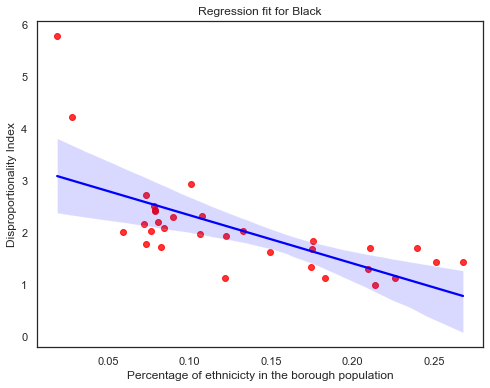

In [573]:
sns.set_style("white")
ethnicity_data = ethnicity_proportion_indicator_2021[ethnicity_proportion_indicator_2021['Ethnic group'] == 'Black']

formula = 'Q("Disproportionality Index") ~ Q("Percentage of ethnicicty in the borough population")'

# Conducting the regression
model = smf.ols(formula, data=ethnicity_data).fit()

# Printing out the statistics
print(f'Regression results for Black:')
print(model.summary())

# Calculatng and printing the correlation coefficient
corr = ethnicity_data['Disproportionality Index'].corr(ethnicity_data['Percentage of ethnicicty in the borough population'])
print(f'\nCorrelation coefficient between Disproportionality Index and Percentage of ethnicicty in the borough population for Black: {corr}\n')

# Ploting the data and the regression model fit
plt.figure(figsize=(8,6))
sns.regplot(x='Percentage of ethnicicty in the borough population', 
            y='Disproportionality Index', 
            data=ethnicity_data,
            color='red',  # Color of the scatter plot
            line_kws={'color': 'blue'})  # Color of the regression line)
plt.title(f'Regression fit for Black')
plt.show()
print('\n\n')

Regression results for Other:
                                  OLS Regression Results                                 
Dep. Variable:     Q("Disproportionality Index")   R-squared:                       0.552
Model:                                       OLS   Adj. R-squared:                  0.537
Method:                            Least Squares   F-statistic:                     36.95
Date:                           Fri, 04 Aug 2023   Prob (F-statistic):           1.12e-06
Time:                                   17:31:05   Log-Likelihood:                -45.218
No. Observations:                             32   AIC:                             94.44
Df Residuals:                                 30   BIC:                             97.37
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                                              coef    

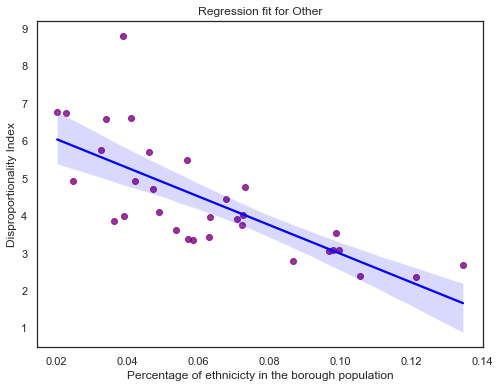

In [574]:

ethnicity_data = ethnicity_proportion_indicator_2021[ethnicity_proportion_indicator_2021['Ethnic group'] == 'Other']

formula = 'Q("Disproportionality Index") ~ Q("Percentage of ethnicicty in the borough population")'

# Conducting the regression
model = smf.ols(formula, data=ethnicity_data).fit()

# Printing out the statistics
print(f'Regression results for Other:')
print(model.summary())

# Calculatng and printing the correlation coefficient
corr = ethnicity_data['Disproportionality Index'].corr(ethnicity_data['Percentage of ethnicicty in the borough population'])
print(f'\nCorrelation coefficient between Disproportionality Index and Percentage of ethnicicty in the borough population for Other: {corr}\n')

# Ploting the data and the regression model fit
plt.figure(figsize=(8,6))
sns.regplot(x='Percentage of ethnicicty in the borough population', 
            y='Disproportionality Index', 
            data=ethnicity_data,
            color='purple',  # Color of the scatter plot
            line_kws={'color': 'blue'})  # Color of the regression line)
plt.title(f'Regression fit for Other')
plt.show()
print('\n\n')

In [575]:
# Defining color map
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}

# Getting unique ethnicities
unique_ethnicities = ethnicity_proportion_indicator_2021['Ethnic group'].unique()

# Looping over each ethnicity group
for i, ethnicity in enumerate(unique_ethnicities):
    
    # Subseting the dataframe for this ethnicity
    ethnicity_data = ethnicity_proportion_indicator_2021[ethnicity_proportion_indicator_2021['Ethnic group'] == ethnicity]
    
    # Calculating and printing the correlation coefficient
    corr = ethnicity_data['SSR Compared to White'].corr(ethnicity_data['Percentage of ethnicicty in the borough population'])
    print(f'\nCorrelation coefficient between Disproportionality Index of {ethnicity} Compared to White and Percentage of ethnicicty in the borough population: {corr}\n')

    # Ploting the data with scatter plot
    fig = px.scatter(ethnicity_data, 
                     x='Percentage of ethnicicty in the borough population', 
                     y='SSR Compared to White',
                     title=f'Disproportionality Index of {ethnicity} Relative to White vs Proportion of {ethnicity} in Borough',
                     color_discrete_sequence=[color_map[ethnicity]]) # Use color map,

    fig.update_yaxes(title_text='Disproportionality Index Relative to White')

    fig.update_layout(
        autosize=False,
        width=750,
        title={
            'text': f'Disproportionality Index of {ethnicity} Relative to White vs Proportion of {ethnicity} in Borough',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})

    fig.show()
    print('\n\n')



Correlation coefficient between Disproportionality Index of Asian Compared to White and Percentage of ethnicicty in the borough population: -0.08941080141017232







Correlation coefficient between Disproportionality Index of Black Compared to White and Percentage of ethnicicty in the borough population: -0.4816668713454471







Correlation coefficient between Disproportionality Index of Mixed Compared to White and Percentage of ethnicicty in the borough population: 0.32628379984963585







Correlation coefficient between Disproportionality Index of Other Compared to White and Percentage of ethnicicty in the borough population: -0.3959471249542954







Correlation coefficient between Disproportionality Index of White Compared to White and Percentage of ethnicicty in the borough population: nan



Regression results for Black:
                                OLS Regression Results                                
Dep. Variable:     Q("SSR Compared to White")   R-squared:                       0.232
Model:                                    OLS   Adj. R-squared:                  0.206
Method:                         Least Squares   F-statistic:                     9.063
Date:                        Fri, 04 Aug 2023   Prob (F-statistic):            0.00525
Time:                                17:31:06   Log-Likelihood:                -54.798
No. Observations:                          32   AIC:                             113.6
Df Residuals:                              30   BIC:                             116.5
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                                              coef    std err          t      P>|t| 

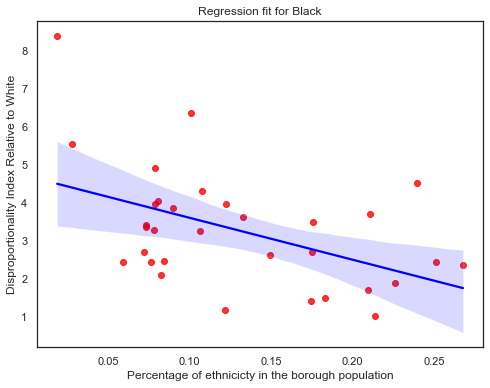

In [576]:
ethnicity_data = ethnicity_proportion_indicator_2021[ethnicity_proportion_indicator_2021['Ethnic group'] == 'Black']

formula = 'Q("SSR Compared to White") ~ Q("Percentage of ethnicicty in the borough population")'

# Conducting the regression
model = smf.ols(formula, data=ethnicity_data).fit()

# Printing out the statistics
print(f'Regression results for Black:')
print(model.summary())

# Calculatng and printing the correlation coefficient
corr = ethnicity_data['SSR Compared to White'].corr(ethnicity_data['Percentage of ethnicicty in the borough population'])
print(f'\nCorrelation coefficient between Disproportionality Index of {ethnicity} Compared to White and Percentage of ethnicicty in the borough population: {corr}\n')

# Ploting the data and the regression model fit
plt.figure(figsize=(8,6))
sns.regplot(x='Percentage of ethnicicty in the borough population', 
            y='SSR Compared to White', 
            data=ethnicity_data,
            color='red',  # Color of the scatter plot
            line_kws={'color': 'blue'})  # Color of the regression line)
plt.title(f'Regression fit for Black')
plt.ylabel('Disproportionality Index Relative to White')
plt.show()
print('\n\n')


### IMD

In [577]:
df_imd_2019 = pd.read_csv('../../Data/IMD/2019/imd_2019.csv')
df_imd_2019.columns

Index(['London Borough', 'IMD - Average rank ', 'IMD - Rank of average rank ',
       'IMD - Average score ', 'IMD - Rank of average score ',
       'IMD - Proportion of LSOAs in most deprived 10% nationally ',
       'IMD - Rank of proportion of LSOAs in most deprived 10% nationally ',
       'IMD 2019 - Extent ', 'IMD 2019 - Rank of extent ',
       'IMD 2019 - Local concentration ',
       'IMD 2019 - Rank of local concentration '],
      dtype='object')

In [578]:
df_imd_2019 = df_imd_2019[['London Borough', 'IMD - Average score ']]

df_imd_2019.sort_values(by=['IMD - Average score '], ascending=False)

London Borough  IMD - Average score 
0     Barking and Dagenham                32.768
10                 Hackney                32.526
23                  Newham                29.577
12                Haringey                27.956
28           Tower Hamlets                27.913
17               Islington                27.535
21                Lewisham                26.661
26               Southwark                25.811
8                  Enfield                25.781
3                    Brent                25.558
20                 Lambeth                25.422
29          Waltham Forest                25.209
9                Greenwich                24.464
7                   Ealing                22.710
6                  Croydon                22.477
11  Hammersmith and Fulham                22.270
18  Kensington and Chelsea                21.526
16                Hounslow                21.487
31             Westminster                20.339
5                   Camden                20.131
15              Hillingdon                18.223
24               Redbridge                17.203
14                Havering                16.789
30              Wandsworth                16.611
2                   Bexley                16.273
1                   Barnet                16.148
13                  Harrow                15.031
22                  Merton                14.649
4                  Bromley                14.163
27                  Sutton                13.987
19    Kingston upon Thames                11.381
25    Richmond upon Thames                 9.425

#### DI

In [579]:
disproportionality_NRTW = combined_df_2021[['Borough','Ethnic group', 'Disproportionality Index']]
disproportionality_NRTW

Borough Ethnic group  Disproportionality Index
0    Barking and Dagenham        Asian                  0.696993
1    Barking and Dagenham        Black                  1.004125
2    Barking and Dagenham        Mixed                  0.683003
3    Barking and Dagenham        Other                  3.853931
4    Barking and Dagenham        White                  0.973547
..                    ...          ...                       ...
155           Westminster        Asian                  0.651440
156           Westminster        Black                  2.216678
157           Westminster        Mixed                  0.742431
158           Westminster        Other                  2.694907
159           Westminster        White                  0.545716

[160 rows x 3 columns]

In [580]:
# merging the datasets on borough names
imd_dis_NRTW = pd.merge(disproportionality_NRTW, df_imd_2019, left_on='Borough', right_on='London Borough', how='left')
imd_dis_NRTW.head(20)

Borough Ethnic group  Disproportionality Index  \
0   Barking and Dagenham        Asian                  0.696993   
1   Barking and Dagenham        Black                  1.004125   
2   Barking and Dagenham        Mixed                  0.683003   
3   Barking and Dagenham        Other                  3.853931   
4   Barking and Dagenham        White                  0.973547   
5                 Barnet        Asian                  0.571835   
6                 Barnet        Black                  2.426318   
7                 Barnet        Mixed                  0.801794   
8                 Barnet        Other                  3.102590   
9                 Barnet        White                  0.610597   
10                Bexley        Asian                  0.351925   
11                Bexley        Black                  1.127169   
12                Bexley        Mixed                  0.662213   
13                Bexley        Other                  4.923820   
14                Bexley        White                  0.950196   
15                 Brent        Asian                  0.434921   
16                 Brent        Black                  1.698404   
17                 Brent        Mixed                  0.697541   
18                 Brent        Other                  3.081638   
19                 Brent        White                  0.627819   

          London Borough  IMD - Average score   
0   Barking and Dagenham                32.768  
1   Barking and Dagenham                32.768  
2   Barking and Dagenham                32.768  
3   Barking and Dagenham                32.768  
4   Barking and Dagenham                32.768  
5                 Barnet                16.148  
6                 Barnet                16.148  
7                 Barnet                16.148  
8                 Barnet                16.148  
9                 Barnet                16.148  
10                Bexley                16.273  
11                Bexley                16.273  
12                Bexley                16.273  
13                Bexley                16.273  
14                Bexley                16.273  
15                 Brent                25.558  
16                 Brent                25.558  
17                 Brent                25.558  
18                 Brent                25.558  
19                 Brent                25.558

In [581]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Defining color map
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}

# Looping over each ethnicity group
for ethnicity in imd_dis_NRTW['Ethnic group'].unique():
    
    # Subsetting the dataframe for this ethnicity
    ethnicity_data = imd_dis_NRTW[imd_dis_NRTW['Ethnic group'] == ethnicity]
    
    # Calculating and print the correlation coefficient
    corr = ethnicity_data['Disproportionality Index'].corr(ethnicity_data['IMD - Average score '])
    print(f'\nCorrelation coefficient between Disproportionality Index and the IMD Average Score for {ethnicity}: {corr}\n')

    # Ploting the data with scatter plot
    fig = px.scatter(ethnicity_data, 
                     x='IMD - Average score ', 
                     y='Disproportionality Index',
                     title=f'Disproportionality Index of {ethnicity} vs IMD Average Score of each Borough',
                     color_discrete_sequence=[color_map[ethnicity]]) # Use color map,


    fig.update_layout(
        autosize=False,
        width=700,
        title={
            'text': f'Disproportionality Index of {ethnicity} vs IMD Average Score of each Borough',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})

    fig.show()
    print('\n\n')



Correlation coefficient between Disproportionality Index and the IMD Average Score for Asian: 0.10760559445076252







Correlation coefficient between Disproportionality Index and the IMD Average Score for Black: -0.6537354739799359







Correlation coefficient between Disproportionality Index and the IMD Average Score for Mixed: -0.4436823823133084







Correlation coefficient between Disproportionality Index and the IMD Average Score for Other: -0.3687647032117074







Correlation coefficient between Disproportionality Index and the IMD Average Score for White: -0.21879004067307037



Regression results for Black:
                                  OLS Regression Results                                 
Dep. Variable:     Q("Disproportionality Index")   R-squared:                       0.427
Model:                                       OLS   Adj. R-squared:                  0.408
Method:                            Least Squares   F-statistic:                     22.39
Date:                           Fri, 04 Aug 2023   Prob (F-statistic):           4.96e-05
Time:                                   17:31:06   Log-Likelihood:                -33.634
No. Observations:                             32   AIC:                             71.27
Df Residuals:                                 30   BIC:                             74.20
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                coef    std err          t      P>|t| 

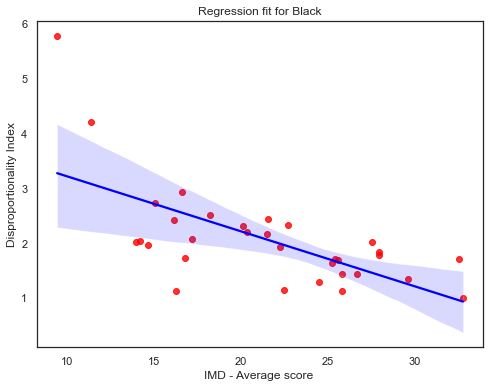

In [582]:
ethnicity_data = imd_dis_NRTW[imd_dis_NRTW['Ethnic group'] == 'Black']


formula = 'Q("Disproportionality Index") ~ Q("IMD - Average score ")'

# Conducting the regression
model = smf.ols(formula, data=ethnicity_data).fit()

# Printing out the statistics
print(f'Regression results for Black:')
print(model.summary())

# Calculating and print the correlation coefficient
corr = ethnicity_data['Disproportionality Index'].corr(ethnicity_data['IMD - Average score '])
print(f'\nCorrelation coefficient between Disproportionality Index of Black and IMD Average Scores: {corr}\n')

# Ploting the data and the regression model fit
plt.figure(figsize=(8,6))
sns.regplot(x='IMD - Average score ', 
            y='Disproportionality Index', 
            data=ethnicity_data,
            scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title(f'Regression fit for Black')
plt.show()
print('\n\n')

#### DIRTW

In [583]:
disproportionality_RTW = combined_df_2021[['Borough','Ethnic group', 'SSR Compared to White']]
disproportionality_RTW

Borough Ethnic group  SSR Compared to White
0    Barking and Dagenham        Asian               0.715932
1    Barking and Dagenham        Black               1.031409
2    Barking and Dagenham        Mixed               0.701562
3    Barking and Dagenham        Other               3.958651
4    Barking and Dagenham        White               1.000000
..                    ...          ...                    ...
155           Westminster        Asian               1.193735
156           Westminster        Black               4.061964
157           Westminster        Mixed               1.360472
158           Westminster        Other               4.938298
159           Westminster        White               1.000000

[160 rows x 3 columns]

In [584]:
# merging the datasets on borough names
imd_dis_RTW = pd.merge(disproportionality_RTW, df_imd_2019, left_on='Borough', right_on='London Borough', how='left')
imd_dis_RTW.head(20)

Borough Ethnic group  SSR Compared to White  \
0   Barking and Dagenham        Asian               0.715932   
1   Barking and Dagenham        Black               1.031409   
2   Barking and Dagenham        Mixed               0.701562   
3   Barking and Dagenham        Other               3.958651   
4   Barking and Dagenham        White               1.000000   
5                 Barnet        Asian               0.936517   
6                 Barnet        Black               3.973680   
7                 Barnet        Mixed               1.313130   
8                 Barnet        Other               5.081237   
9                 Barnet        White               1.000000   
10                Bexley        Asian               0.370371   
11                Bexley        Black               1.186249   
12                Bexley        Mixed               0.696922   
13                Bexley        Other               5.181899   
14                Bexley        White               1.000000   
15                 Brent        Asian               0.692749   
16                 Brent        Black               2.705244   
17                 Brent        Mixed               1.111054   
18                 Brent        Other               4.908479   
19                 Brent        White               1.000000   

          London Borough  IMD - Average score   
0   Barking and Dagenham                32.768  
1   Barking and Dagenham                32.768  
2   Barking and Dagenham                32.768  
3   Barking and Dagenham                32.768  
4   Barking and Dagenham                32.768  
5                 Barnet                16.148  
6                 Barnet                16.148  
7                 Barnet                16.148  
8                 Barnet                16.148  
9                 Barnet                16.148  
10                Bexley                16.273  
11                Bexley                16.273  
12                Bexley                16.273  
13                Bexley                16.273  
14                Bexley                16.273  
15                 Brent                25.558  
16                 Brent                25.558  
17                 Brent                25.558  
18                 Brent                25.558  
19                 Brent                25.558

In [585]:
# Defining color map
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}

# Looping over each ethnicity group
for ethnicity in imd_dis_RTW['Ethnic group'].unique():
    
    # Subseting the dataframe for this ethnicity
    ethnicity_data = imd_dis_RTW[imd_dis_RTW['Ethnic group'] == ethnicity]

    # Calculating and printing the correlation coefficient
    corr = ethnicity_data['SSR Compared to White'].corr(ethnicity_data['IMD - Average score '])
    print(f'\nCorrelation coefficient between Disproportionality Index of {ethnicity} Compared to White and the IMD Average Score of each Borough: {corr}\n')

    # Plotting the data with scatter plot
    fig = px.scatter(ethnicity_data, 
                     x='IMD - Average score ', 
                     y='SSR Compared to White',
                     title=f'Disproportionality Index of {ethnicity} Compared to White vs IMD Average Score of each Borough',
                     color_discrete_sequence=[color_map[ethnicity]]) # Use color map,


    fig.update_layout(
        autosize=False,
        width=794,
        title={
            'text': f'Disproportionality Index of {ethnicity} Relative to White vs IMD Average Score of each Borough',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})

    # change the y axis label
    fig.update_yaxes(title_text='Disproportionality Index Relative to White')

    fig.show()
    print('\n\n')




Correlation coefficient between Disproportionality Index of Asian Compared to White and the IMD Average Score of each Borough: 0.24115785775787582







Correlation coefficient between Disproportionality Index of Black Compared to White and the IMD Average Score of each Borough: -0.43002976422928063







Correlation coefficient between Disproportionality Index of Mixed Compared to White and the IMD Average Score of each Borough: -0.14657958100260188







Correlation coefficient between Disproportionality Index of Other Compared to White and the IMD Average Score of each Borough: -0.13044092515839367







Correlation coefficient between Disproportionality Index of White Compared to White and the IMD Average Score of each Borough: nan



Regression results for Black:
                                OLS Regression Results                                
Dep. Variable:     Q("SSR Compared to White")   R-squared:                       0.185
Model:                                    OLS   Adj. R-squared:                  0.158
Method:                         Least Squares   F-statistic:                     6.806
Date:                        Fri, 04 Aug 2023   Prob (F-statistic):             0.0140
Time:                                17:31:06   Log-Likelihood:                -55.750
No. Observations:                          32   AIC:                             115.5
Df Residuals:                              30   BIC:                             118.4
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------

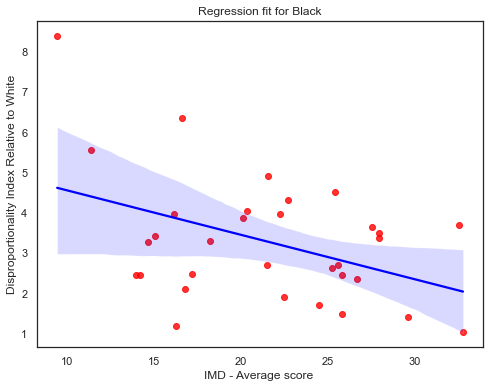

In [586]:
ethnicity_data = imd_dis_RTW[imd_dis_RTW['Ethnic group'] == 'Black']


formula = 'Q("SSR Compared to White") ~ Q("IMD - Average score ")'

# Conducting the regression
model = smf.ols(formula, data=ethnicity_data).fit()

# Printing out the statistics
print(f'Regression results for Black:')
print(model.summary())

# Calculating and print the correlation coefficient
corr = ethnicity_data['SSR Compared to White'].corr(ethnicity_data['IMD - Average score '])
print(f'\nCorrelation coefficient between Disproportionality Index of Black Compared to White and IMD Average Scores: {corr}\n')

# Plotting the data and the regression model fit
plt.figure(figsize=(8,6))
sns.regplot(x='IMD - Average score ', 
            y='SSR Compared to White', 
            data=ethnicity_data,
            scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title(f'Regression fit for Black')
plt.ylabel('Disproportionality Index Relative to White')  # Set the new y-axis label
plt.show()
print('\n\n')

### Income

In [587]:
df_income_2019 = pd.read_csv('../../Data/IMD/2019/income_2019.csv')
df_income_2019.columns

Index(['London Borough', 'Income - Average rank ',
       'Income - Rank of average rank ', 'Income - Average score ',
       'Income - Rank of average score ',
       'Income - Proportion  of LSOAs in most deprived 10% nationally ',
       'Income - Rank of proportion of LSOAs in most deprived 10% nationally ',
       'Income scale', 'Rank of Income Scale'],
      dtype='object')

In [588]:
df_income_2019 = df_income_2019[['London Borough', 'Income - Average score ']]

df_income_2019.sort_values(by=['Income - Average score '], ascending=False)

London Borough  Income - Average score 
10                 Hackney                    0.196
0     Barking and Dagenham                    0.194
28           Tower Hamlets                    0.192
17               Islington                    0.179
8                  Enfield                    0.171
12                Haringey                    0.170
23                  Newham                    0.169
21                Lewisham                    0.164
26               Southwark                    0.162
9                Greenwich                    0.159
3                    Brent                    0.155
20                 Lambeth                    0.153
29          Waltham Forest                    0.152
11  Hammersmith and Fulham                    0.142
5                   Camden                    0.141
7                   Ealing                    0.140
6                  Croydon                    0.136
31             Westminster                    0.135
16                Hounslow                    0.129
24               Redbridge                    0.121
18  Kensington and Chelsea                    0.117
15              Hillingdon                    0.114
1                   Barnet                    0.111
13                  Harrow                    0.109
14                Havering                    0.108
30              Wandsworth                    0.107
2                   Bexley                    0.106
22                  Merton                    0.100
27                  Sutton                    0.095
4                  Bromley                    0.091
19    Kingston upon Thames                    0.078
25    Richmond upon Thames                    0.064

#### DI

In [589]:
disproportionality_NRTW = combined_df_2021[['Borough','Ethnic group', 'Disproportionality Index']]
disproportionality_NRTW

Borough Ethnic group  Disproportionality Index
0    Barking and Dagenham        Asian                  0.696993
1    Barking and Dagenham        Black                  1.004125
2    Barking and Dagenham        Mixed                  0.683003
3    Barking and Dagenham        Other                  3.853931
4    Barking and Dagenham        White                  0.973547
..                    ...          ...                       ...
155           Westminster        Asian                  0.651440
156           Westminster        Black                  2.216678
157           Westminster        Mixed                  0.742431
158           Westminster        Other                  2.694907
159           Westminster        White                  0.545716

[160 rows x 3 columns]

In [590]:
# merging the datasets on borough names
income_dis_NRTW = pd.merge(disproportionality_NRTW, df_income_2019, left_on='Borough', right_on='London Borough', how='left')
income_dis_NRTW.head(20)

Borough Ethnic group  Disproportionality Index  \
0   Barking and Dagenham        Asian                  0.696993   
1   Barking and Dagenham        Black                  1.004125   
2   Barking and Dagenham        Mixed                  0.683003   
3   Barking and Dagenham        Other                  3.853931   
4   Barking and Dagenham        White                  0.973547   
5                 Barnet        Asian                  0.571835   
6                 Barnet        Black                  2.426318   
7                 Barnet        Mixed                  0.801794   
8                 Barnet        Other                  3.102590   
9                 Barnet        White                  0.610597   
10                Bexley        Asian                  0.351925   
11                Bexley        Black                  1.127169   
12                Bexley        Mixed                  0.662213   
13                Bexley        Other                  4.923820   
14                Bexley        White                  0.950196   
15                 Brent        Asian                  0.434921   
16                 Brent        Black                  1.698404   
17                 Brent        Mixed                  0.697541   
18                 Brent        Other                  3.081638   
19                 Brent        White                  0.627819   

          London Borough  Income - Average score   
0   Barking and Dagenham                    0.194  
1   Barking and Dagenham                    0.194  
2   Barking and Dagenham                    0.194  
3   Barking and Dagenham                    0.194  
4   Barking and Dagenham                    0.194  
5                 Barnet                    0.111  
6                 Barnet                    0.111  
7                 Barnet                    0.111  
8                 Barnet                    0.111  
9                 Barnet                    0.111  
10                Bexley                    0.106  
11                Bexley                    0.106  
12                Bexley                    0.106  
13                Bexley                    0.106  
14                Bexley                    0.106  
15                 Brent                    0.155  
16                 Brent                    0.155  
17                 Brent                    0.155  
18                 Brent                    0.155  
19                 Brent                    0.155

In [591]:
# Defining color map
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}

# Looping over each ethnicity group
for ethnicity in income_dis_NRTW['Ethnic group'].unique():
    
    # Subsetting the dataframe for this ethnicity
    ethnicity_data = income_dis_NRTW[income_dis_NRTW['Ethnic group'] == ethnicity]
  
    # Calculating and printing the correlation coefficient
    corr = ethnicity_data['Disproportionality Index'].corr(ethnicity_data['Income - Average score '])
    print(f'\nCorrelation coefficient between Disproportionality Index and the IMD Income Average Score for {ethnicity}: {corr}\n')

    # Plotting the data with scatter plot
    fig = px.scatter(ethnicity_data, 
                     x='Income - Average score ', 
                     y='Disproportionality Index',
                     title=f'Disproportionality Index vs IMD Income Average Score of {ethnicity} ethnic group of each Borough',
                     color_discrete_sequence=[color_map[ethnicity]]) # Use color map,


    fig.update_layout(
        autosize=False,
        width=700,
        title={
            'text': f'Disproportionality Index of {ethnicity} vs IMD Income Average Score of each Borough',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})

    fig.show()
    print('\n\n')


Correlation coefficient between Disproportionality Index and the IMD Income Average Score for Asian: 0.11538517074729124







Correlation coefficient between Disproportionality Index and the IMD Income Average Score for Black: -0.6561437125948084







Correlation coefficient between Disproportionality Index and the IMD Income Average Score for Mixed: -0.4358669119693611







Correlation coefficient between Disproportionality Index and the IMD Income Average Score for Other: -0.3965483703536446







Correlation coefficient between Disproportionality Index and the IMD Income Average Score for White: -0.2289910034564453



Regression results for Black:
                                  OLS Regression Results                                 
Dep. Variable:     Q("Disproportionality Index")   R-squared:                       0.431
Model:                                       OLS   Adj. R-squared:                  0.412
Method:                            Least Squares   F-statistic:                     22.68
Date:                           Fri, 04 Aug 2023   Prob (F-statistic):           4.55e-05
Time:                                   17:31:07   Log-Likelihood:                -33.545
No. Observations:                             32   AIC:                             71.09
Df Residuals:                                 30   BIC:                             74.02
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                   coef    std err          t      P>|

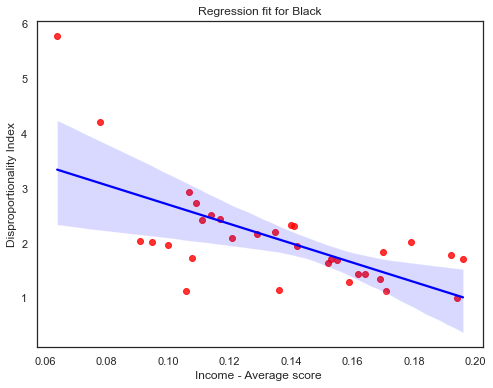

In [592]:
ethnicity_data = income_dis_NRTW[income_dis_NRTW['Ethnic group'] == 'Black']


formula = 'Q("Disproportionality Index") ~ Q("Income - Average score ")'

# Conducting the regression
model = smf.ols(formula, data=ethnicity_data).fit()

# Printing out the statistics
print(f'Regression results for Black:')
print(model.summary())

# Calculating and printing the correlation coefficient
corr = ethnicity_data['Disproportionality Index'].corr(ethnicity_data['Income - Average score '])
print(f'\nCorrelation coefficient between Disproportionality Index of Black and IMD Income Average Scores: {corr}\n')

# Plotting the data and the regression model fit
plt.figure(figsize=(8,6))
sns.regplot(x='Income - Average score ', 
            y='Disproportionality Index', 
            data=ethnicity_data,
            scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title(f'Regression fit for Black')
plt.show()
print('\n\n')

#### DIRTW

In [593]:
combined_df_2021

Borough  stop_counts Ethnic group  Population Counts  \
0    Barking and Dagenham          824        Asian              56583   
1    Barking and Dagenham          982        Black              46807   
2    Barking and Dagenham          133        Mixed               9320   
3    Barking and Dagenham          635        Other               7886   
4    Barking and Dagenham         1999        White              98275   
..                    ...          ...          ...                ...   
155           Westminster         1264        Asian              34242   
156           Westminster         2067        Black              16456   
157           Westminster          561        Mixed              13335   
158           Westminster         4195        Other              27471   
159           Westminster         3486        White             112732   

     borough_population  borough_stops  stop_and_search_rate_of_borough  \
0                218871           4573                         0.020894   
1                218871           4573                         0.020894   
2                218871           4573                         0.020894   
3                218871           4573                         0.020894   
4                218871           4573                         0.020894   
..                  ...            ...                              ...   
155              204236          11573                         0.056665   
156              204236          11573                         0.056665   
157              204236          11573                         0.056665   
158              204236          11573                         0.056665   
159              204236          11573                         0.056665   

     stop_and_search_rate_of_borough_per_1000  stop_and_search_rate  \
0                                   20.893586              0.014563   
1                                   20.893586              0.020980   
2                                   20.893586              0.014270   
3                                   20.893586              0.080522   
4                                   20.893586              0.020341   
..                                        ...                   ...   
155                                 56.664839              0.036914   
156                                 56.664839              0.125608   
157                                 56.664839              0.042070   
158                                 56.664839              0.152706   
159                                 56.664839              0.030923   

     stop_and_search_rate_per_1000  stop_rate  Disproportionality Index  \
0                        14.562678   0.180188                  0.696993   
1                        20.979768   0.214739                  1.004125   
2                        14.270386   0.029084                  0.683003   
3                        80.522445   0.138859                  3.853931   
4                        20.340880   0.437131                  0.973547   
..                             ...        ...                       ...   
155                      36.913732   0.109220                  0.651440   
156                     125.607681   0.178605                  2.216678   
157                      42.069741   0.048475                  0.742431   
158                     152.706490   0.362482                  2.694907   
159                      30.922897   0.301218                  0.545716   

     SSR Compared to White  
0                 0.715932  
1                 1.031409  
2                 0.701562  
3                 3.958651  
4                 1.000000  
..                     ...  
155               1.193735  
156               4.061964  
157               1.360472  
158               4.938298  
159               1.000000  

[160 rows x 13 columns]

In [594]:
disproportionality_RTW = combined_df_2021[['Borough','Ethnic group', 'SSR Compared to White']]
disproportionality_RTW

Borough Ethnic group  SSR Compared to White
0    Barking and Dagenham        Asian               0.715932
1    Barking and Dagenham        Black               1.031409
2    Barking and Dagenham        Mixed               0.701562
3    Barking and Dagenham        Other               3.958651
4    Barking and Dagenham        White               1.000000
..                    ...          ...                    ...
155           Westminster        Asian               1.193735
156           Westminster        Black               4.061964
157           Westminster        Mixed               1.360472
158           Westminster        Other               4.938298
159           Westminster        White               1.000000

[160 rows x 3 columns]

In [595]:
# merging the datasets on borough names
income_dis_RTW = pd.merge(disproportionality_RTW, df_income_2019, left_on='Borough', right_on='London Borough', how='left')
income_dis_RTW.head(20)

Borough Ethnic group  SSR Compared to White  \
0   Barking and Dagenham        Asian               0.715932   
1   Barking and Dagenham        Black               1.031409   
2   Barking and Dagenham        Mixed               0.701562   
3   Barking and Dagenham        Other               3.958651   
4   Barking and Dagenham        White               1.000000   
5                 Barnet        Asian               0.936517   
6                 Barnet        Black               3.973680   
7                 Barnet        Mixed               1.313130   
8                 Barnet        Other               5.081237   
9                 Barnet        White               1.000000   
10                Bexley        Asian               0.370371   
11                Bexley        Black               1.186249   
12                Bexley        Mixed               0.696922   
13                Bexley        Other               5.181899   
14                Bexley        White               1.000000   
15                 Brent        Asian               0.692749   
16                 Brent        Black               2.705244   
17                 Brent        Mixed               1.111054   
18                 Brent        Other               4.908479   
19                 Brent        White               1.000000   

          London Borough  Income - Average score   
0   Barking and Dagenham                    0.194  
1   Barking and Dagenham                    0.194  
2   Barking and Dagenham                    0.194  
3   Barking and Dagenham                    0.194  
4   Barking and Dagenham                    0.194  
5                 Barnet                    0.111  
6                 Barnet                    0.111  
7                 Barnet                    0.111  
8                 Barnet                    0.111  
9                 Barnet                    0.111  
10                Bexley                    0.106  
11                Bexley                    0.106  
12                Bexley                    0.106  
13                Bexley                    0.106  
14                Bexley                    0.106  
15                 Brent                    0.155  
16                 Brent                    0.155  
17                 Brent                    0.155  
18                 Brent                    0.155  
19                 Brent                    0.155

In [596]:
# Defining color map
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}

# Looping over each ethnicity group
for ethnicity in income_dis_RTW['Ethnic group'].unique():
    
    # Subsetting the dataframe for this ethnicity
    ethnicity_data = income_dis_RTW[income_dis_RTW['Ethnic group'] == ethnicity]
  
    # Calculating and printing the correlation coefficient
    corr = ethnicity_data['SSR Compared to White'].corr(ethnicity_data['Income - Average score '])
    print(f'\nCorrelation coefficient between Disproportionality Index Compared to White and the IMD Income Average Score for {ethnicity}: {corr}\n')

    # Plotting the data with scatter plot
    fig = px.scatter(ethnicity_data, 
                     x='Income - Average score ', 
                     y='SSR Compared to White',
                     title=f'Disproportionality Index of {ethnicity} Compared to White vs IMD Income Average Score of each Borough',
                     color_discrete_sequence=[color_map[ethnicity]]) # Use color map,


    fig.update_layout(
        autosize=False,
        width=850,
    
        title={
            'text': f'Disproportionality Index of {ethnicity} Relative to White vs IMD Income Average Score of each Borough',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
    fig.update_yaxes(title_text='Disproportionality Index Relative to White')
    fig.show()
    print('\n\n')



Correlation coefficient between Disproportionality Index Compared to White and the IMD Income Average Score for Asian: 0.24749264692844333







Correlation coefficient between Disproportionality Index Compared to White and the IMD Income Average Score for Black: -0.44055377564134596







Correlation coefficient between Disproportionality Index Compared to White and the IMD Income Average Score for Mixed: -0.15770568803304102







Correlation coefficient between Disproportionality Index Compared to White and the IMD Income Average Score for Other: -0.15558736318881913







Correlation coefficient between Disproportionality Index Compared to White and the IMD Income Average Score for White: nan



### Education

In [597]:
df_education_2019 = pd.read_csv('../../Data/IMD/2019/education_2019.csv')
df_education_2019.columns

Index(['London Borough', 'Education, Skills and Training - Average rank ',
       'Education, Skills and Training - Rank of average rank ',
       'Education, Skills and Training - Average score ',
       'Education, Skills and Training - Rank of average score ',
       'Education, Skills and Training - Proportion  of LSOAs in most deprived 10% nationally',
       'Education, Skills and Training - Rank of proportion of LSOAs in most deprived 10% nationally'],
      dtype='object')

In [598]:
df_education_2019 = df_education_2019[['London Borough', 'Education, Skills and Training - Average score ']]

df_education_2019.sort_values(by=['Education, Skills and Training - Average score '], ascending=False)

London Borough  Education, Skills and Training - Average score 
0     Barking and Dagenham                                           25.513
14                Havering                                           22.594
8                  Enfield                                           20.255
2                   Bexley                                           18.331
23                  Newham                                           17.775
12                Haringey                                           17.600
29          Waltham Forest                                           16.968
28           Tower Hamlets                                           16.934
15              Hillingdon                                           16.402
9                Greenwich                                           15.639
6                  Croydon                                           15.577
3                    Brent                                           15.223
10                 Hackney                                           14.972
21                Lewisham                                           13.911
16                Hounslow                                           13.287
7                   Ealing                                           12.546
17               Islington                                           12.483
27                  Sutton                                           11.953
24               Redbridge                                           11.126
26               Southwark                                           11.086
4                  Bromley                                           10.551
5                   Camden                                           10.523
20                 Lambeth                                           10.493
22                  Merton                                            9.184
31             Westminster                                            8.535
11  Hammersmith and Fulham                                            8.141
13                  Harrow                                            8.044
1                   Barnet                                            7.830
19    Kingston upon Thames                                            6.938
30              Wandsworth                                            6.649
18  Kensington and Chelsea                                            5.192
25    Richmond upon Thames                                            3.534

#### DI

In [599]:
# merging the datasets on borough names
education_dis_NRTW = pd.merge(disproportionality_NRTW, df_education_2019, left_on='Borough', right_on='London Borough', how='left')
education_dis_NRTW.head(20)

Borough Ethnic group  Disproportionality Index  \
0   Barking and Dagenham        Asian                  0.696993   
1   Barking and Dagenham        Black                  1.004125   
2   Barking and Dagenham        Mixed                  0.683003   
3   Barking and Dagenham        Other                  3.853931   
4   Barking and Dagenham        White                  0.973547   
5                 Barnet        Asian                  0.571835   
6                 Barnet        Black                  2.426318   
7                 Barnet        Mixed                  0.801794   
8                 Barnet        Other                  3.102590   
9                 Barnet        White                  0.610597   
10                Bexley        Asian                  0.351925   
11                Bexley        Black                  1.127169   
12                Bexley        Mixed                  0.662213   
13                Bexley        Other                  4.923820   
14                Bexley        White                  0.950196   
15                 Brent        Asian                  0.434921   
16                 Brent        Black                  1.698404   
17                 Brent        Mixed                  0.697541   
18                 Brent        Other                  3.081638   
19                 Brent        White                  0.627819   

          London Borough  Education, Skills and Training - Average score   
0   Barking and Dagenham                                           25.513  
1   Barking and Dagenham                                           25.513  
2   Barking and Dagenham                                           25.513  
3   Barking and Dagenham                                           25.513  
4   Barking and Dagenham                                           25.513  
5                 Barnet                                            7.830  
6                 Barnet                                            7.830  
7                 Barnet                                            7.830  
8                 Barnet                                            7.830  
9                 Barnet                                            7.830  
10                Bexley                                           18.331  
11                Bexley                                           18.331  
12                Bexley                                           18.331  
13                Bexley                                           18.331  
14                Bexley                                           18.331  
15                 Brent                                           15.223  
16                 Brent                                           15.223  
17                 Brent                                           15.223  
18                 Brent                                           15.223  
19                 Brent                                           15.223

In [600]:
# Defining color map
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}

# Looping over each ethnicity group
for ethnicity in education_dis_NRTW['Ethnic group'].unique():
    
    # Subseting the dataframe for this ethnicity
    ethnicity_data = education_dis_NRTW[education_dis_NRTW['Ethnic group'] == ethnicity]
  
    # Calculating and print the correlation coefficient
    corr = ethnicity_data['Disproportionality Index'].corr(ethnicity_data['Education, Skills and Training - Average score '])
    print(f'\nCorrelation coefficient between Disproportionality Index and the IMD Education Average Score for {ethnicity}: {corr}\n')

    # Ploting the data with scatter plot
    fig = px.scatter(ethnicity_data, 
                     x='Education, Skills and Training - Average score ', 
                     y='Disproportionality Index',
                     title=f'Disproportionality Index of {ethnicity} vs IMD Education Average Score of each Borough',
                     color_discrete_sequence=[color_map[ethnicity]]) # Use color map,


    fig.update_layout(
        autosize=False,
        width=730,
        title={
            'text': f'Disproportionality Index of {ethnicity} vs IMD Education Average Score of each Borough',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})

    fig.show()
    print('\n\n')



Correlation coefficient between Disproportionality Index and the IMD Education Average Score for Asian: -0.045042430953759996







Correlation coefficient between Disproportionality Index and the IMD Education Average Score for Black: -0.6855941762623897







Correlation coefficient between Disproportionality Index and the IMD Education Average Score for Mixed: -0.36816031251931464







Correlation coefficient between Disproportionality Index and the IMD Education Average Score for Other: -0.06924819168241358







Correlation coefficient between Disproportionality Index and the IMD Education Average Score for White: 0.4333223415879404



Regression results for Black:
                                  OLS Regression Results                                 
Dep. Variable:     Q("Disproportionality Index")   R-squared:                       0.470
Model:                                       OLS   Adj. R-squared:                  0.452
Method:                            Least Squares   F-statistic:                     26.61
Date:                           Fri, 04 Aug 2023   Prob (F-statistic):           1.49e-05
Time:                                   17:31:07   Log-Likelihood:                -32.395
No. Observations:                             32   AIC:                             68.79
Df Residuals:                                 30   BIC:                             71.72
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                                           coef    std

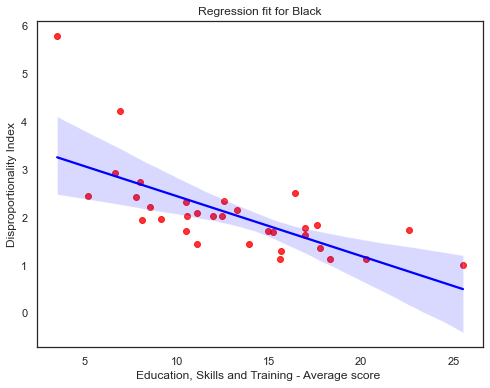

In [601]:
ethnicity_data = education_dis_NRTW[education_dis_NRTW['Ethnic group'] == 'Black']


formula = 'Q("Disproportionality Index") ~ Q("Education, Skills and Training - Average score ")'

# Conducting the regression
model = smf.ols(formula, data=ethnicity_data).fit()

# Printing out the statistics
print(f'Regression results for Black:')
print(model.summary())

# Calculating and print the correlation coefficient
corr = ethnicity_data['Disproportionality Index'].corr(ethnicity_data['Education, Skills and Training - Average score '])
print(f'\nCorrelation coefficient between Disproportionality Index of Black and IMD Education Average Scores: {corr}\n')

# Ploting the data and the regression model fit
plt.figure(figsize=(8,6))
sns.regplot(x='Education, Skills and Training - Average score ', 
            y='Disproportionality Index', 
            data=ethnicity_data,
            scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title(f'Regression fit for Black')
plt.show()
print('\n\n')

#### DIRTW

In [602]:
# merging the datasets on borough names
education_dis_RTW = pd.merge(disproportionality_RTW, df_education_2019, left_on='Borough', right_on='London Borough', how='left')
education_dis_RTW.head(20)

Borough Ethnic group  SSR Compared to White  \
0   Barking and Dagenham        Asian               0.715932   
1   Barking and Dagenham        Black               1.031409   
2   Barking and Dagenham        Mixed               0.701562   
3   Barking and Dagenham        Other               3.958651   
4   Barking and Dagenham        White               1.000000   
5                 Barnet        Asian               0.936517   
6                 Barnet        Black               3.973680   
7                 Barnet        Mixed               1.313130   
8                 Barnet        Other               5.081237   
9                 Barnet        White               1.000000   
10                Bexley        Asian               0.370371   
11                Bexley        Black               1.186249   
12                Bexley        Mixed               0.696922   
13                Bexley        Other               5.181899   
14                Bexley        White               1.000000   
15                 Brent        Asian               0.692749   
16                 Brent        Black               2.705244   
17                 Brent        Mixed               1.111054   
18                 Brent        Other               4.908479   
19                 Brent        White               1.000000   

          London Borough  Education, Skills and Training - Average score   
0   Barking and Dagenham                                           25.513  
1   Barking and Dagenham                                           25.513  
2   Barking and Dagenham                                           25.513  
3   Barking and Dagenham                                           25.513  
4   Barking and Dagenham                                           25.513  
5                 Barnet                                            7.830  
6                 Barnet                                            7.830  
7                 Barnet                                            7.830  
8                 Barnet                                            7.830  
9                 Barnet                                            7.830  
10                Bexley                                           18.331  
11                Bexley                                           18.331  
12                Bexley                                           18.331  
13                Bexley                                           18.331  
14                Bexley                                           18.331  
15                 Brent                                           15.223  
16                 Brent                                           15.223  
17                 Brent                                           15.223  
18                 Brent                                           15.223  
19                 Brent                                           15.223

In [603]:
# Defining color map
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}

# Looping over each ethnicity group
for ethnicity in education_dis_RTW['Ethnic group'].unique():
    
    # Subseting the dataframe for this ethnicity
    ethnicity_data = education_dis_RTW[education_dis_RTW['Ethnic group'] == ethnicity]
  
    # Calculating and printing the correlation coefficient
    corr = ethnicity_data['SSR Compared to White'].corr(ethnicity_data['Education, Skills and Training - Average score '])
    print(f'\nCorrelation coefficient between Disproportionality Index Compared to White and the IMD Education Average Score for {ethnicity}: {corr}\n')

    # Ploting the data with scatter plot
    fig = px.scatter(ethnicity_data, 
                     x='Education, Skills and Training - Average score ', 
                     y='SSR Compared to White',
                     title=f'Disproportionality Index of {ethnicity} Compared to White vs IMD Education Average Score of each Borough',
                     color_discrete_sequence=[color_map[ethnicity]]) # Use color map,


    fig.update_layout(
        autosize=False,
        width=870,
        title={
            'text': f'Disproportionality Index of {ethnicity} Relative to White vs IMD Education Average Score of each Borough',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
    fig.update_yaxes(title_text='Disproportionality Index Relative to White')
    fig.show()
    print('\n\n')



Correlation coefficient between Disproportionality Index Compared to White and the IMD Education Average Score for Asian: -0.21148911666941037







Correlation coefficient between Disproportionality Index Compared to White and the IMD Education Average Score for Black: -0.7640714584629679







Correlation coefficient between Disproportionality Index Compared to White and the IMD Education Average Score for Mixed: -0.5981070163644453







Correlation coefficient between Disproportionality Index Compared to White and the IMD Education Average Score for Other: -0.2900822693604676







Correlation coefficient between Disproportionality Index Compared to White and the IMD Education Average Score for White: nan



Regression results for Black:
                                OLS Regression Results                                
Dep. Variable:     Q("SSR Compared to White")   R-squared:                       0.584
Model:                                    OLS   Adj. R-squared:                  0.570
Method:                         Least Squares   F-statistic:                     42.08
Date:                        Fri, 04 Aug 2023   Prob (F-statistic):           3.60e-07
Time:                                17:31:08   Log-Likelihood:                -44.996
No. Observations:                          32   AIC:                             93.99
Df Residuals:                              30   BIC:                             96.92
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                                           coef    std err          t      P>|t|    

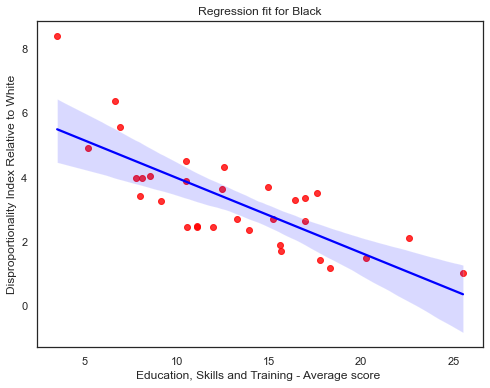

In [604]:
ethnicity_data = education_dis_RTW[education_dis_RTW['Ethnic group'] == 'Black']


formula = 'Q("SSR Compared to White") ~ Q("Education, Skills and Training - Average score ")'

# Conducting the regression
model = smf.ols(formula, data=ethnicity_data).fit()

# Printing out the statistics
print(f'Regression results for Black:')
print(model.summary())

# Calculating and printing the correlation coefficient
corr = ethnicity_data['SSR Compared to White'].corr(ethnicity_data['Education, Skills and Training - Average score '])
print(f'\nCorrelation coefficient between Disproportionality Index of Black Compared to White and IMD Education Average Scores: {corr}\n')

# Ploting the data and the regression model fit
plt.figure(figsize=(8,6))
sns.regplot(x='Education, Skills and Training - Average score ', 
            y='SSR Compared to White', 
            data=ethnicity_data,
            scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title(f'Regression fit for Black')
plt.ylabel('Disproportionality Index Relative to White')
plt.show()
print('\n\n')

Regression results for Mixed:
                                OLS Regression Results                                
Dep. Variable:     Q("SSR Compared to White")   R-squared:                       0.358
Model:                                    OLS   Adj. R-squared:                  0.336
Method:                         Least Squares   F-statistic:                     16.71
Date:                        Fri, 04 Aug 2023   Prob (F-statistic):           0.000300
Time:                                17:31:08   Log-Likelihood:                -1.1741
No. Observations:                          32   AIC:                             6.348
Df Residuals:                              30   BIC:                             9.280
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                                           coef    std err          t      P>|t|    

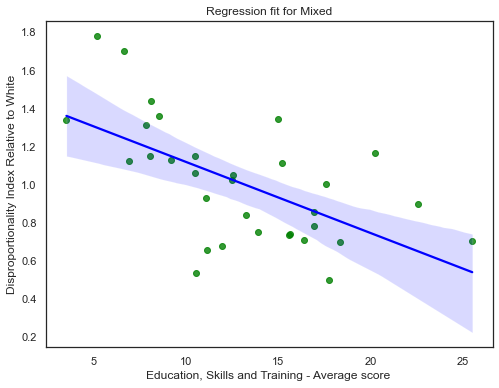

In [605]:
ethnicity_data = education_dis_RTW[education_dis_RTW['Ethnic group'] == 'Mixed']


formula = 'Q("SSR Compared to White") ~ Q("Education, Skills and Training - Average score ")'

# Conducting the regression
model = smf.ols(formula, data=ethnicity_data).fit()

# Printing out the statistics
print(f'Regression results for Mixed:')
print(model.summary())

# Calculating and print the correlation coefficient
corr = ethnicity_data['SSR Compared to White'].corr(ethnicity_data['Education, Skills and Training - Average score '])
print(f'\nCorrelation coefficient between Disproportionality Index of Mixed Compared to White and IMD Education Average Scores: {corr}\n')

# Ploting the data and the regression model fit
plt.figure(figsize=(8,6))
sns.regplot(x='Education, Skills and Training - Average score ', 
            y='SSR Compared to White', 
            data=ethnicity_data,
            scatter_kws={"color": "green"}, line_kws={"color": "blue"})
plt.title(f'Regression fit for Mixed')
plt.ylabel('Disproportionality Index Relative to White')
plt.show()
print('\n\n')

### Employment

In [606]:
df_employment_2019 = pd.read_csv('../../Data/IMD/2019/employment_2019.csv')
df_employment_2019.columns

Index(['London Borough', 'Employment - Average rank ',
       'Employment - Rank of average rank ', 'Employment - Average score ',
       'Employment - Rank of average score ',
       'Employment - Proportion  of LSOAs in most deprived 10% nationally ',
       'Employment - Rank of proportion of LSOAs in most deprived 10% nationally ',
       'Employment scale ', 'Rank of Employment Scale'],
      dtype='object')

In [607]:
df_employment_2019 = df_employment_2019[['London Borough', 'Employment - Average score ']]

df_employment_2019.sort_values(by=['Employment - Average score '], ascending=False)

London Borough  Employment - Average score 
0     Barking and Dagenham                        0.117
10                 Hackney                        0.114
17               Islington                        0.111
12                Haringey                        0.106
21                Lewisham                        0.104
9                Greenwich                        0.102
8                  Enfield                        0.102
28           Tower Hamlets                        0.100
3                    Brent                        0.097
26               Southwark                        0.097
11  Hammersmith and Fulham                        0.094
23                  Newham                        0.093
29          Waltham Forest                        0.093
20                 Lambeth                        0.093
6                  Croydon                        0.092
7                   Ealing                        0.091
5                   Camden                        0.091
31             Westminster                        0.088
18  Kensington and Chelsea                        0.080
16                Hounslow                        0.079
14                Havering                        0.078
2                   Bexley                        0.077
15              Hillingdon                        0.075
1                   Barnet                        0.073
24               Redbridge                        0.072
27                  Sutton                        0.070
4                  Bromley                        0.068
13                  Harrow                        0.067
22                  Merton                        0.064
30              Wandsworth                        0.064
19    Kingston upon Thames                        0.053
25    Richmond upon Thames                        0.050

#### DI

In [608]:
# merging the datasets on borough names
employment_dis_NRTW = pd.merge(disproportionality_NRTW, df_employment_2019, left_on='Borough', right_on='London Borough', how='left')
employment_dis_NRTW.head(20)

Borough Ethnic group  Disproportionality Index  \
0   Barking and Dagenham        Asian                  0.696993   
1   Barking and Dagenham        Black                  1.004125   
2   Barking and Dagenham        Mixed                  0.683003   
3   Barking and Dagenham        Other                  3.853931   
4   Barking and Dagenham        White                  0.973547   
5                 Barnet        Asian                  0.571835   
6                 Barnet        Black                  2.426318   
7                 Barnet        Mixed                  0.801794   
8                 Barnet        Other                  3.102590   
9                 Barnet        White                  0.610597   
10                Bexley        Asian                  0.351925   
11                Bexley        Black                  1.127169   
12                Bexley        Mixed                  0.662213   
13                Bexley        Other                  4.923820   
14                Bexley        White                  0.950196   
15                 Brent        Asian                  0.434921   
16                 Brent        Black                  1.698404   
17                 Brent        Mixed                  0.697541   
18                 Brent        Other                  3.081638   
19                 Brent        White                  0.627819   

          London Borough  Employment - Average score   
0   Barking and Dagenham                        0.117  
1   Barking and Dagenham                        0.117  
2   Barking and Dagenham                        0.117  
3   Barking and Dagenham                        0.117  
4   Barking and Dagenham                        0.117  
5                 Barnet                        0.073  
6                 Barnet                        0.073  
7                 Barnet                        0.073  
8                 Barnet                        0.073  
9                 Barnet                        0.073  
10                Bexley                        0.077  
11                Bexley                        0.077  
12                Bexley                        0.077  
13                Bexley                        0.077  
14                Bexley                        0.077  
15                 Brent                        0.097  
16                 Brent                        0.097  
17                 Brent                        0.097  
18                 Brent                        0.097  
19                 Brent                        0.097

In [609]:
# Defining color map
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}

# Looping over each ethnicity group
for ethnicity in employment_dis_NRTW['Ethnic group'].unique():
    
    # Subseting the dataframe for this ethnicity
    ethnicity_data = employment_dis_NRTW[employment_dis_NRTW['Ethnic group'] == ethnicity]
  
    # Calculating and print the correlation coefficient
    corr = ethnicity_data['Disproportionality Index'].corr(ethnicity_data['Employment - Average score '])
    print(f'\nCorrelation coefficient between Disproportionality Index and the IMD Employment Average Score for {ethnicity}: {corr}\n')

    # Ploting the data with scatter plot
    fig = px.scatter(ethnicity_data, 
                     x='Employment - Average score ', 
                     y='Disproportionality Index',
                     title=f'Disproportionality Index of {ethnicity} vs IMD Employment Average Score of each Borough',
                     color_discrete_sequence=[color_map[ethnicity]]) # Use color map,


    fig.update_layout(
        autosize=False,
        width=740,
        title={
            'text': f'Disproportionality Index of {ethnicity} vs IMD Employment Average Score of each Borough',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})

    fig.show()
    print('\n\n')


Correlation coefficient between Disproportionality Index and the IMD Employment Average Score for Asian: 0.005013154900177041







Correlation coefficient between Disproportionality Index and the IMD Employment Average Score for Black: -0.7007921951776995







Correlation coefficient between Disproportionality Index and the IMD Employment Average Score for Mixed: -0.43417456552159395







Correlation coefficient between Disproportionality Index and the IMD Employment Average Score for Other: -0.3258285381756567







Correlation coefficient between Disproportionality Index and the IMD Employment Average Score for White: -0.22120509636132926



Regression results for Black:
                                  OLS Regression Results                                 
Dep. Variable:     Q("Disproportionality Index")   R-squared:                       0.491
Model:                                       OLS   Adj. R-squared:                  0.474
Method:                            Least Squares   F-statistic:                     28.95
Date:                           Fri, 04 Aug 2023   Prob (F-statistic):           7.95e-06
Time:                                   17:31:08   Log-Likelihood:                -31.746
No. Observations:                             32   AIC:                             67.49
Df Residuals:                                 30   BIC:                             70.42
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                                       coef    std err          t     

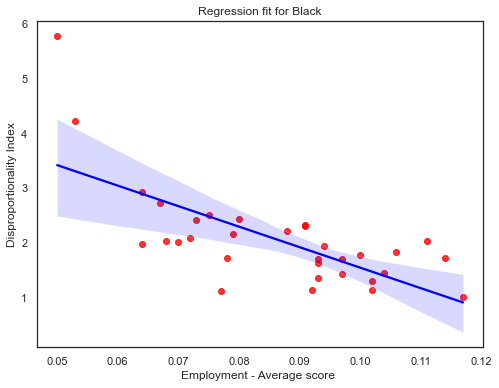

In [610]:
ethnicity_data = employment_dis_NRTW[employment_dis_NRTW['Ethnic group'] == 'Black']


formula = 'Q("Disproportionality Index") ~ Q("Employment - Average score ")'

# Conducting the regression
model = smf.ols(formula, data=ethnicity_data).fit()

# Printing out the statistics
print(f'Regression results for Black:')
print(model.summary())

# Calculating and printing the correlation coefficient
corr = ethnicity_data['Disproportionality Index'].corr(ethnicity_data['Employment - Average score '])
print(f'\nCorrelation coefficient between Disproportionality Index of Black and IMD Employment Average Scores: {corr}\n')

# Ploting the data and the regression model fit
plt.figure(figsize=(8,6))
sns.regplot(x='Employment - Average score ', 
            y='Disproportionality Index', 
            data=ethnicity_data,
            scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title(f'Regression fit for Black')
plt.show()
print('\n\n')

#### DIRTW

In [611]:
# merging the datasets on borough names
employment_dis_RTW = pd.merge(disproportionality_RTW, df_employment_2019, left_on='Borough', right_on='London Borough', how='left')
employment_dis_RTW.head(20)

Borough Ethnic group  SSR Compared to White  \
0   Barking and Dagenham        Asian               0.715932   
1   Barking and Dagenham        Black               1.031409   
2   Barking and Dagenham        Mixed               0.701562   
3   Barking and Dagenham        Other               3.958651   
4   Barking and Dagenham        White               1.000000   
5                 Barnet        Asian               0.936517   
6                 Barnet        Black               3.973680   
7                 Barnet        Mixed               1.313130   
8                 Barnet        Other               5.081237   
9                 Barnet        White               1.000000   
10                Bexley        Asian               0.370371   
11                Bexley        Black               1.186249   
12                Bexley        Mixed               0.696922   
13                Bexley        Other               5.181899   
14                Bexley        White               1.000000   
15                 Brent        Asian               0.692749   
16                 Brent        Black               2.705244   
17                 Brent        Mixed               1.111054   
18                 Brent        Other               4.908479   
19                 Brent        White               1.000000   

          London Borough  Employment - Average score   
0   Barking and Dagenham                        0.117  
1   Barking and Dagenham                        0.117  
2   Barking and Dagenham                        0.117  
3   Barking and Dagenham                        0.117  
4   Barking and Dagenham                        0.117  
5                 Barnet                        0.073  
6                 Barnet                        0.073  
7                 Barnet                        0.073  
8                 Barnet                        0.073  
9                 Barnet                        0.073  
10                Bexley                        0.077  
11                Bexley                        0.077  
12                Bexley                        0.077  
13                Bexley                        0.077  
14                Bexley                        0.077  
15                 Brent                        0.097  
16                 Brent                        0.097  
17                 Brent                        0.097  
18                 Brent                        0.097  
19                 Brent                        0.097

In [612]:
# Defining color map
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}

# Looping over each ethnicity group
for ethnicity in employment_dis_RTW['Ethnic group'].unique():
    
    # Subseting the dataframe for this ethnicity
    ethnicity_data = employment_dis_RTW[employment_dis_RTW['Ethnic group'] == ethnicity]
  
    # Calculating and print the correlation coefficient
    corr = ethnicity_data['SSR Compared to White'].corr(ethnicity_data['Employment - Average score '])
    print(f'\nCorrelation coefficient between Disproportionality Index Compared to White and the IMD Employment Average Score for {ethnicity}: {corr}\n')

    # Ploting the data with scatter plot
    fig = px.scatter(ethnicity_data, 
                     x='Employment - Average score ', 
                     y='SSR Compared to White',
                     title=f'Disproportionality Index of {ethnicity} Compared to White vs IMD Employment Average Score of each Borough',
                     color_discrete_sequence=[color_map[ethnicity]]) # Use color map,


    fig.update_layout(
        autosize=False,
        width=890,
        yaxis_title="Disproportionality Index Relative to White",
        title={
            'text': f'Disproportionality Index of {ethnicity} Relative to White vs IMD Employment Average Score of each Borough',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
    
    fig.show()
    print('\n\n')


Correlation coefficient between Disproportionality Index Compared to White and the IMD Employment Average Score for Asian: 0.1542650120101894







Correlation coefficient between Disproportionality Index Compared to White and the IMD Employment Average Score for Black: -0.48683618414740926







Correlation coefficient between Disproportionality Index Compared to White and the IMD Employment Average Score for Mixed: -0.1632750266769348







Correlation coefficient between Disproportionality Index Compared to White and the IMD Employment Average Score for Other: -0.12860186363157528







Correlation coefficient between Disproportionality Index Compared to White and the IMD Employment Average Score for White: nan



Regression results for Black:
                                OLS Regression Results                                
Dep. Variable:     Q("SSR Compared to White")   R-squared:                       0.237
Model:                                    OLS   Adj. R-squared:                  0.212
Method:                         Least Squares   F-statistic:                     9.319
Date:                        Fri, 04 Aug 2023   Prob (F-statistic):            0.00472
Time:                                17:31:08   Log-Likelihood:                -54.694
No. Observations:                          32   AIC:                             113.4
Df Residuals:                              30   BIC:                             116.3
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]

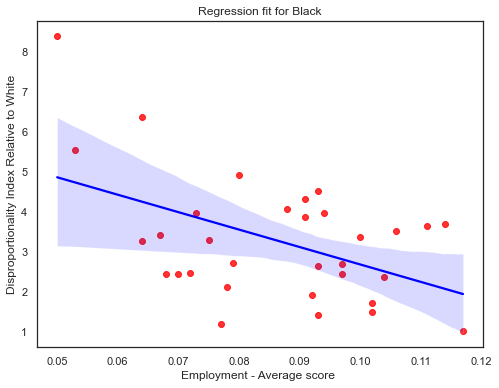

In [613]:
ethnicity_data = employment_dis_RTW[employment_dis_RTW['Ethnic group'] == 'Black']


formula = 'Q("SSR Compared to White") ~ Q("Employment - Average score ")'

# Conducting the regression
model = smf.ols(formula, data=ethnicity_data).fit()

# Printing out the statistics
print(f'Regression results for Black:')
print(model.summary())

# Calculating and printing the correlation coefficient
corr = ethnicity_data['SSR Compared to White'].corr(ethnicity_data['Employment - Average score '])
print(f'\nCorrelation coefficient between Disproportionality Index of Black Relative to White and IMD Employment Average Scores: {corr}\n')

# Ploting the data and the regression model fit
plt.figure(figsize=(8,6))
sns.regplot(x='Employment - Average score ', 
            y='SSR Compared to White', 
            data=ethnicity_data,
            scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title(f'Regression fit for Black')
plt.ylabel('Disproportionality Index Relative to White')
plt.show()
print('\n\n')

### Crime

In [614]:
df_crime_2019 = pd.read_csv('../../Data/IMD/2019/crime_2019.csv')
df_crime_2019.columns

Index(['London Borough', 'Crime - Average rank ',
       'Crime - Rank of average rank ', 'Crime - Average score ',
       'Crime - Rank of average score ',
       'Crime - Proportion  of LSOAs in most deprived 10% nationally ',
       'Crime - Rank of proportion of LSOAs in most deprived 10% nationally '],
      dtype='object')

In [615]:
df_crime_2019 = df_crime_2019[['London Borough', 'Crime - Average score ']]

df_crime_2019.sort_values(by=['Crime - Average score '], ascending=False)

London Borough  Crime - Average score 
12                Haringey                   0.732
10                 Hackney                   0.621
17               Islington                   0.607
0     Barking and Dagenham                   0.542
20                 Lambeth                   0.532
28           Tower Hamlets                   0.509
23                  Newham                   0.497
26               Southwark                   0.475
9                Greenwich                   0.457
3                    Brent                   0.428
29          Waltham Forest                   0.406
21                Lewisham                   0.402
16                Hounslow                   0.373
11  Hammersmith and Fulham                   0.340
18  Kensington and Chelsea                   0.331
5                   Camden                   0.325
24               Redbridge                   0.295
6                  Croydon                   0.280
7                   Ealing                   0.239
15              Hillingdon                   0.235
8                  Enfield                   0.199
14                Havering                   0.130
30              Wandsworth                   0.118
31             Westminster                   0.105
1                   Barnet                   0.082
4                  Bromley                  -0.038
22                  Merton                  -0.051
25    Richmond upon Thames                  -0.070
2                   Bexley                  -0.130
13                  Harrow                  -0.143
27                  Sutton                  -0.174
19    Kingston upon Thames                  -0.332

#### DI

In [616]:
# merging the datasets on borough names
crime_dis_NRTW = pd.merge(disproportionality_NRTW, df_crime_2019, left_on='Borough', right_on='London Borough', how='left')
crime_dis_NRTW.head(20)

Borough Ethnic group  Disproportionality Index  \
0   Barking and Dagenham        Asian                  0.696993   
1   Barking and Dagenham        Black                  1.004125   
2   Barking and Dagenham        Mixed                  0.683003   
3   Barking and Dagenham        Other                  3.853931   
4   Barking and Dagenham        White                  0.973547   
5                 Barnet        Asian                  0.571835   
6                 Barnet        Black                  2.426318   
7                 Barnet        Mixed                  0.801794   
8                 Barnet        Other                  3.102590   
9                 Barnet        White                  0.610597   
10                Bexley        Asian                  0.351925   
11                Bexley        Black                  1.127169   
12                Bexley        Mixed                  0.662213   
13                Bexley        Other                  4.923820   
14                Bexley        White                  0.950196   
15                 Brent        Asian                  0.434921   
16                 Brent        Black                  1.698404   
17                 Brent        Mixed                  0.697541   
18                 Brent        Other                  3.081638   
19                 Brent        White                  0.627819   

          London Borough  Crime - Average score   
0   Barking and Dagenham                   0.542  
1   Barking and Dagenham                   0.542  
2   Barking and Dagenham                   0.542  
3   Barking and Dagenham                   0.542  
4   Barking and Dagenham                   0.542  
5                 Barnet                   0.082  
6                 Barnet                   0.082  
7                 Barnet                   0.082  
8                 Barnet                   0.082  
9                 Barnet                   0.082  
10                Bexley                  -0.130  
11                Bexley                  -0.130  
12                Bexley                  -0.130  
13                Bexley                  -0.130  
14                Bexley                  -0.130  
15                 Brent                   0.428  
16                 Brent                   0.428  
17                 Brent                   0.428  
18                 Brent                   0.428  
19                 Brent                   0.428

In [617]:
# Defining color map
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}

# Looping over each ethnicity group
for ethnicity in crime_dis_NRTW['Ethnic group'].unique():
    
    # Subseting the dataframe for this ethnicity
    ethnicity_data = crime_dis_NRTW[crime_dis_NRTW['Ethnic group'] == ethnicity]
  
    # Calculating and printing the correlation coefficient
    corr = ethnicity_data['Disproportionality Index'].corr(ethnicity_data['Crime - Average score '])
    print(f'\nCorrelation coefficient between Disproportionality Index and the IMD Crime Average Score for {ethnicity}: {corr}\n')

    # Ploting the data with scatter plot
    fig = px.scatter(ethnicity_data, 
                     x='Crime - Average score ', 
                     y='Disproportionality Index',
                     title=f'Disproportionality Index of {ethnicity} vs IMD Crime Average Score of each Borough',
                     color_discrete_sequence=[color_map[ethnicity]]) # Use color map,


    fig.update_layout(
        autosize=False,
        width=730,
        title={
            'text': f'Disproportionality Index of {ethnicity} vs IMD Crime Average Score of each Borough',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})

    fig.show()
    print('\n\n')


Correlation coefficient between Disproportionality Index and the IMD Crime Average Score for Asian: 0.1421502620157751







Correlation coefficient between Disproportionality Index and the IMD Crime Average Score for Black: -0.5016695223192708







Correlation coefficient between Disproportionality Index and the IMD Crime Average Score for Mixed: -0.4988761437578811







Correlation coefficient between Disproportionality Index and the IMD Crime Average Score for Other: -0.2832949266384143







Correlation coefficient between Disproportionality Index and the IMD Crime Average Score for White: -0.3548919377276771



#### DIRTW

In [618]:
# merging the datasets on borough names
crime_dis_RTW = pd.merge(disproportionality_RTW, df_crime_2019, left_on='Borough', right_on='London Borough', how='left')
crime_dis_RTW.head(20)

Borough Ethnic group  SSR Compared to White  \
0   Barking and Dagenham        Asian               0.715932   
1   Barking and Dagenham        Black               1.031409   
2   Barking and Dagenham        Mixed               0.701562   
3   Barking and Dagenham        Other               3.958651   
4   Barking and Dagenham        White               1.000000   
5                 Barnet        Asian               0.936517   
6                 Barnet        Black               3.973680   
7                 Barnet        Mixed               1.313130   
8                 Barnet        Other               5.081237   
9                 Barnet        White               1.000000   
10                Bexley        Asian               0.370371   
11                Bexley        Black               1.186249   
12                Bexley        Mixed               0.696922   
13                Bexley        Other               5.181899   
14                Bexley        White               1.000000   
15                 Brent        Asian               0.692749   
16                 Brent        Black               2.705244   
17                 Brent        Mixed               1.111054   
18                 Brent        Other               4.908479   
19                 Brent        White               1.000000   

          London Borough  Crime - Average score   
0   Barking and Dagenham                   0.542  
1   Barking and Dagenham                   0.542  
2   Barking and Dagenham                   0.542  
3   Barking and Dagenham                   0.542  
4   Barking and Dagenham                   0.542  
5                 Barnet                   0.082  
6                 Barnet                   0.082  
7                 Barnet                   0.082  
8                 Barnet                   0.082  
9                 Barnet                   0.082  
10                Bexley                  -0.130  
11                Bexley                  -0.130  
12                Bexley                  -0.130  
13                Bexley                  -0.130  
14                Bexley                  -0.130  
15                 Brent                   0.428  
16                 Brent                   0.428  
17                 Brent                   0.428  
18                 Brent                   0.428  
19                 Brent                   0.428

In [619]:
# Defining color map
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}

# Looping over each ethnicity group
for ethnicity in crime_dis_RTW['Ethnic group'].unique():
    
    # Subseting the dataframe for this ethnicity
    ethnicity_data = crime_dis_RTW[crime_dis_RTW['Ethnic group'] == ethnicity]
  
    # Calculating and print the correlation coefficient
    corr = ethnicity_data['SSR Compared to White'].corr(ethnicity_data['Crime - Average score '])
    print(f'\nCorrelation coefficient between Disproportionality Index Compared to White and the IMD Crime Average Score for {ethnicity}: {corr}\n')

    # Ploting the data with scatter plot
    fig = px.scatter(ethnicity_data, 
                     x='Crime - Average score ', 
                     y='SSR Compared to White',
                     title=f'Disproportionality Index of {ethnicity} Compared to White vs IMD Crime Average Score of each Borough',
                     color_discrete_sequence=[color_map[ethnicity]]) # Use color map,


    fig.update_layout(
        autosize=False,
        width=900,
        yaxis_title="Disproportionality Index Relative to White",
        title={
            'text': f'Disproportionality Index of {ethnicity} Relative to White vs IMD Crime Average Score of each Borough',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})

    fig.show()
    print('\n\n')


Correlation coefficient between Disproportionality Index Compared to White and the IMD Crime Average Score for Asian: 0.3022144365541357







Correlation coefficient between Disproportionality Index Compared to White and the IMD Crime Average Score for Black: -0.2471471630399555







Correlation coefficient between Disproportionality Index Compared to White and the IMD Crime Average Score for Mixed: -0.09013317800235225







Correlation coefficient between Disproportionality Index Compared to White and the IMD Crime Average Score for Other: 0.009471340184402476







Correlation coefficient between Disproportionality Index Compared to White and the IMD Crime Average Score for White: nan



### House Prices

In [620]:
df_house_prices_2021 = pd.read_csv('../../Data/House_Prices/UK_House_price_index_mean.csv')
df_house_prices_2021.rename(columns={'Borough': 'London Borough'}, inplace=True)

In [621]:
# changing the London Borough name 'Barking & Dagenham' to 'Barking and Dagenham' to match the other datasets
df_house_prices_2021['London Borough'] = df_house_prices_2021['London Borough'].replace('Barking & Dagenham', 'Barking and Dagenham')
df_house_prices_2021['London Borough'] = df_house_prices_2021['London Borough'].replace('Kensington & Chelsea', 'Kensington and Chelsea')
df_house_prices_2021['London Borough'] = df_house_prices_2021['London Borough'].replace('Hammersmith & Fulham', 'Hammersmith and Fulham')

In [622]:
df_house_prices_2021['London Borough']

0     Kensington and Chelsea
1                Westminster
2                     Camden
3     Hammersmith and Fulham
4       Richmond upon Thames
5                  Islington
6                 Wandsworth
7                    Hackney
8                   Haringey
9                     Barnet
10                    Merton
11                   Lambeth
12                 Southwark
13                     Brent
14      Kingston upon Thames
15                    Ealing
16                    Harrow
17            Waltham Forest
18                   Bromley
19             Tower Hamlets
20                 Redbridge
21                  Lewisham
22                Hillingdon
23                  Hounslow
24                   Enfield
25                 Greenwich
26                    Sutton
27                   Croydon
28                  Havering
29                    Newham
30                    Bexley
31      Barking and Dagenham
Name: London Borough, dtype: object

#### DI

In [623]:
# merging the datasets on borough names
house_prices_dis_NRTW = pd.merge(disproportionality_NRTW, df_house_prices_2021, left_on='Borough', right_on='London Borough', how='left')
house_prices_dis_NRTW.head(20)

Borough Ethnic group  Disproportionality Index  \
0   Barking and Dagenham        Asian                  0.696993   
1   Barking and Dagenham        Black                  1.004125   
2   Barking and Dagenham        Mixed                  0.683003   
3   Barking and Dagenham        Other                  3.853931   
4   Barking and Dagenham        White                  0.973547   
5                 Barnet        Asian                  0.571835   
6                 Barnet        Black                  2.426318   
7                 Barnet        Mixed                  0.801794   
8                 Barnet        Other                  3.102590   
9                 Barnet        White                  0.610597   
10                Bexley        Asian                  0.351925   
11                Bexley        Black                  1.127169   
12                Bexley        Mixed                  0.662213   
13                Bexley        Other                  4.923820   
14                Bexley        White                  0.950196   
15                 Brent        Asian                  0.434921   
16                 Brent        Black                  1.698404   
17                 Brent        Mixed                  0.697541   
18                 Brent        Other                  3.081638   
19                 Brent        White                  0.627819   

          London Borough  Average Price  
0   Barking and Dagenham  316507.833575  
1   Barking and Dagenham  316507.833575  
2   Barking and Dagenham  316507.833575  
3   Barking and Dagenham  316507.833575  
4   Barking and Dagenham  316507.833575  
5                 Barnet  550728.768792  
6                 Barnet  550728.768792  
7                 Barnet  550728.768792  
8                 Barnet  550728.768792  
9                 Barnet  550728.768792  
10                Bexley  366009.711992  
11                Bexley  366009.711992  
12                Bexley  366009.711992  
13                Bexley  366009.711992  
14                Bexley  366009.711992  
15                 Brent  513736.526025  
16                 Brent  513736.526025  
17                 Brent  513736.526025  
18                 Brent  513736.526025  
19                 Brent  513736.526025

In [624]:
# Defining color map
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}

# Looping over each ethnicity group
for ethnicity in house_prices_dis_NRTW['Ethnic group'].unique():
    
    # Subseting the dataframe for this ethnicity
    ethnicity_data = house_prices_dis_NRTW[house_prices_dis_NRTW['Ethnic group'] == ethnicity]
  
    # Calculating and printing the correlation coefficient
    corr = ethnicity_data['Disproportionality Index'].corr(ethnicity_data['Average Price'])
    print(f'\nCorrelation coefficient between Disproportionality Index and the Average House Price for {ethnicity}: {corr}\n')

    # Ploting the data with scatter plot
    fig = px.scatter(ethnicity_data, 
                     x='Average Price', 
                     y='Disproportionality Index',
                     title=f'Disproportionality Index of {ethnicity} vs Average House Price of each Borough',
                     color_discrete_sequence=[color_map[ethnicity]]) # Use color map,


    fig.update_layout(
        autosize=False,
        width=730,
        title={
            'text': f'Disproportionality Index of {ethnicity} vs Average House Price of each Borough',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})

    fig.show()
    print('\n\n')


Correlation coefficient between Disproportionality Index and the Average House Price for Asian: 0.19764084482839245







Correlation coefficient between Disproportionality Index and the Average House Price for Black: 0.3384045943704542







Correlation coefficient between Disproportionality Index and the Average House Price for Mixed: 0.40527918788116984







Correlation coefficient between Disproportionality Index and the Average House Price for Other: -0.20147979772533803







Correlation coefficient between Disproportionality Index and the Average House Price for White: -0.5518933907654872



Regression results for Black:
                                  OLS Regression Results                                 
Dep. Variable:     Q("Disproportionality Index")   R-squared:                       0.115
Model:                                       OLS   Adj. R-squared:                  0.085
Method:                            Least Squares   F-statistic:                     3.880
Date:                           Fri, 04 Aug 2023   Prob (F-statistic):             0.0582
Time:                                   17:31:09   Log-Likelihood:                -40.608
No. Observations:                             32   AIC:                             85.22
Df Residuals:                                 30   BIC:                             88.15
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0

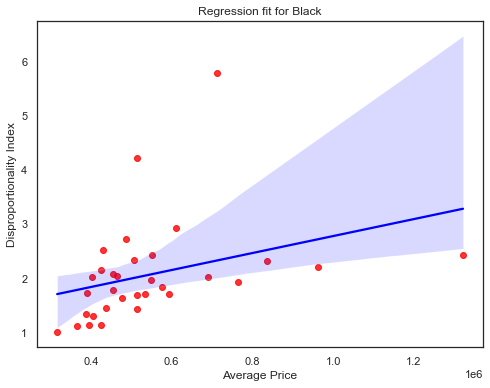

In [625]:
ethnicity_data = house_prices_dis_NRTW[house_prices_dis_NRTW['Ethnic group'] == 'Black']


formula = 'Q("Disproportionality Index") ~ Q("Average Price")'

# Conducting the regression
model = smf.ols(formula, data=ethnicity_data).fit()

# Printing out the statistics
print(f'Regression results for Black:')
print(model.summary())

# Calculateing and printing the correlation coefficient
corr = ethnicity_data['Disproportionality Index'].corr(ethnicity_data['Average Price'])
print(f'\nCorrelation coefficient between Disproportionality Index of Black and Average House Price: {corr}\n')

# Ploting the data and the regression model fit
plt.figure(figsize=(8,6))
sns.regplot(x='Average Price', 
            y='Disproportionality Index', 
            data=ethnicity_data,
            scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title(f'Regression fit for Black')
plt.show()
print('\n\n')

Regression results for White:
                                  OLS Regression Results                                 
Dep. Variable:     Q("Disproportionality Index")   R-squared:                       0.305
Model:                                       OLS   Adj. R-squared:                  0.281
Method:                            Least Squares   F-statistic:                     13.14
Date:                           Fri, 04 Aug 2023   Prob (F-statistic):            0.00106
Time:                                   17:31:09   Log-Likelihood:                 20.047
No. Observations:                             32   AIC:                            -36.09
Df Residuals:                                 30   BIC:                            -33.16
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0

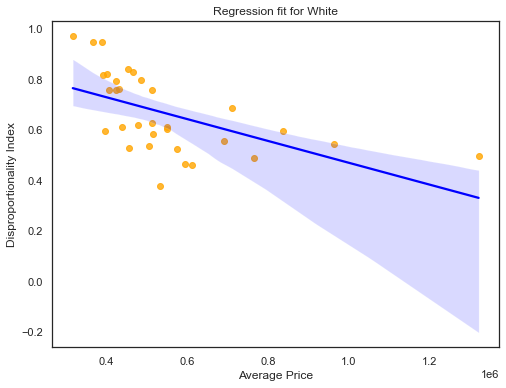

In [626]:
ethnicity_data = house_prices_dis_NRTW[house_prices_dis_NRTW['Ethnic group'] == 'White']


formula = 'Q("Disproportionality Index") ~ Q("Average Price")'

# Conducting the regression
model = smf.ols(formula, data=ethnicity_data).fit()

# Printing out the statistics
print(f'Regression results for White:')
print(model.summary())

# Calculateing and printing the correlation coefficient
corr = ethnicity_data['Disproportionality Index'].corr(ethnicity_data['Average Price'])
print(f'\nCorrelation coefficient between Disproportionality Index of White and Average House Price: {corr}\n')

# Ploting the data and the regression model fit
plt.figure(figsize=(8,6))
sns.regplot(x='Average Price', 
            y='Disproportionality Index', 
            data=ethnicity_data,
            scatter_kws={"color": "orange"}, line_kws={"color": "blue"})
plt.title(f'Regression fit for White')
plt.show()
print('\n\n')

#### DIRTW

In [627]:
# merging the datasets on borough names
house_prices_dis_RTW = pd.merge(disproportionality_RTW, df_house_prices_2021, left_on='Borough', right_on='London Borough', how='left')
house_prices_dis_RTW.head(20)

Borough Ethnic group  SSR Compared to White  \
0   Barking and Dagenham        Asian               0.715932   
1   Barking and Dagenham        Black               1.031409   
2   Barking and Dagenham        Mixed               0.701562   
3   Barking and Dagenham        Other               3.958651   
4   Barking and Dagenham        White               1.000000   
5                 Barnet        Asian               0.936517   
6                 Barnet        Black               3.973680   
7                 Barnet        Mixed               1.313130   
8                 Barnet        Other               5.081237   
9                 Barnet        White               1.000000   
10                Bexley        Asian               0.370371   
11                Bexley        Black               1.186249   
12                Bexley        Mixed               0.696922   
13                Bexley        Other               5.181899   
14                Bexley        White               1.000000   
15                 Brent        Asian               0.692749   
16                 Brent        Black               2.705244   
17                 Brent        Mixed               1.111054   
18                 Brent        Other               4.908479   
19                 Brent        White               1.000000   

          London Borough  Average Price  
0   Barking and Dagenham  316507.833575  
1   Barking and Dagenham  316507.833575  
2   Barking and Dagenham  316507.833575  
3   Barking and Dagenham  316507.833575  
4   Barking and Dagenham  316507.833575  
5                 Barnet  550728.768792  
6                 Barnet  550728.768792  
7                 Barnet  550728.768792  
8                 Barnet  550728.768792  
9                 Barnet  550728.768792  
10                Bexley  366009.711992  
11                Bexley  366009.711992  
12                Bexley  366009.711992  
13                Bexley  366009.711992  
14                Bexley  366009.711992  
15                 Brent  513736.526025  
16                 Brent  513736.526025  
17                 Brent  513736.526025  
18                 Brent  513736.526025  
19                 Brent  513736.526025

In [628]:
# Defining color map
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}

# Looping over each ethnicity group
for ethnicity in house_prices_dis_RTW['Ethnic group'].unique():
    
    # Subsetting the dataframe for this ethnicity
    ethnicity_data = house_prices_dis_RTW[house_prices_dis_RTW['Ethnic group'] == ethnicity]
  
    # Calculating and print the correlation coefficient
    corr = ethnicity_data['SSR Compared to White'].corr(ethnicity_data['Average Price'])
    print(f'\nCorrelation coefficient between Disproportionality Index Compared to White and the Average House Price for {ethnicity}: {corr}\n')

    # Plotting the data with scatter plot
    fig = px.scatter(ethnicity_data, 
                     x='Average Price', 
                     y='SSR Compared to White',
                     title=f'Disproportionality Index of {ethnicity} Compared to White vs Average House Price of each Borough',
                     color_discrete_sequence=[color_map[ethnicity]]) # Use color map,


    fig.update_layout(
        autosize=False,
        width=820,
        yaxis_title="Disproportionality Index Relative to White",
        title={
            'text': f'Disproportionality Index of {ethnicity} Relative to White vs Average House Price of each Borough',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})

    fig.show()
    print('\n\n')


Correlation coefficient between Disproportionality Index Compared to White and the Average House Price for Asian: 0.40072651363488765







Correlation coefficient between Disproportionality Index Compared to White and the Average House Price for Black: 0.5603507328814726







Correlation coefficient between Disproportionality Index Compared to White and the Average House Price for Mixed: 0.7577596553236812







Correlation coefficient between Disproportionality Index Compared to White and the Average House Price for Other: 0.11054456508238372







Correlation coefficient between Disproportionality Index Compared to White and the Average House Price for White: nan



Regression results for Black:
                                OLS Regression Results                                
Dep. Variable:     Q("SSR Compared to White")   R-squared:                       0.314
Model:                                    OLS   Adj. R-squared:                  0.291
Method:                         Least Squares   F-statistic:                     13.73
Date:                        Fri, 04 Aug 2023   Prob (F-statistic):           0.000852
Time:                                17:31:10   Log-Likelihood:                -52.992
No. Observations:                          32   AIC:                             110.0
Df Residuals:                              30   BIC:                             112.9
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

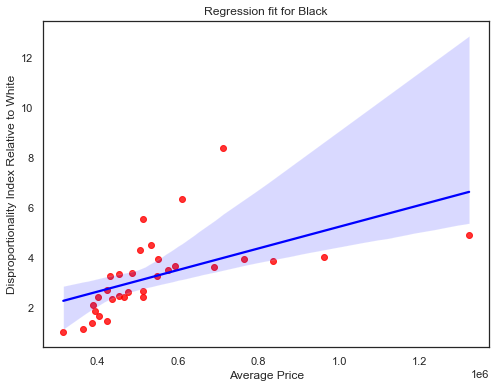

In [629]:
ethnicity_data = house_prices_dis_RTW[house_prices_dis_RTW['Ethnic group'] == 'Black']


formula = 'Q("SSR Compared to White") ~ Q("Average Price")'

# Conducting the regression
model = smf.ols(formula, data=ethnicity_data).fit()

# Printing out the statistics
print(f'Regression results for Black:')
print(model.summary())

# Calculating and print the correlation coefficient
corr = ethnicity_data['SSR Compared to White'].corr(ethnicity_data['Average Price'])
print(f'\nCorrelation coefficient between Disproportionality Index of Black Compared to White and Average House Price: {corr}\n')

# Plotting the data and the regression model fit
plt.figure(figsize=(8,6))
sns.regplot(x='Average Price', 
            y='SSR Compared to White', 
            data=ethnicity_data,
            scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title(f'Regression fit for Black')
plt.ylabel('Disproportionality Index Relative to White')
plt.show()
print('\n\n')

Regression results for Mixed:
                                OLS Regression Results                                
Dep. Variable:     Q("SSR Compared to White")   R-squared:                       0.574
Model:                                    OLS   Adj. R-squared:                  0.560
Method:                         Least Squares   F-statistic:                     40.46
Date:                        Fri, 04 Aug 2023   Prob (F-statistic):           5.11e-07
Time:                                17:31:10   Log-Likelihood:                 5.4025
No. Observations:                          32   AIC:                            -6.805
Df Residuals:                              30   BIC:                            -3.873
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

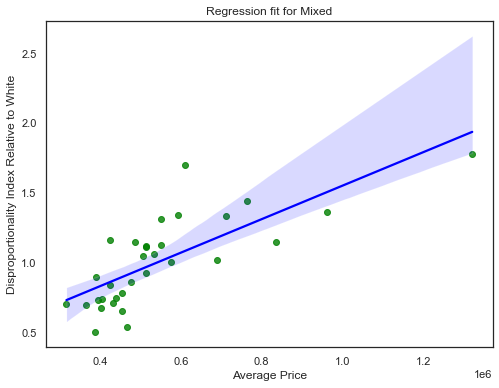

In [630]:
ethnicity_data = house_prices_dis_RTW[house_prices_dis_RTW['Ethnic group'] == 'Mixed']


formula = 'Q("SSR Compared to White") ~ Q("Average Price")'

# Conducting the regression
model = smf.ols(formula, data=ethnicity_data).fit()

# Printing out the statistics
print(f'Regression results for Mixed:')
print(model.summary())

# Calculating and print the correlation coefficient
corr = ethnicity_data['SSR Compared to White'].corr(ethnicity_data['Average Price'])
print(f'\nCorrelation coefficient between Disproportionality Index of Mixed Compared to White and Average House Price: {corr}\n')

# Plotting the data and the regression model fit
plt.figure(figsize=(8,6))
sns.regplot(x='Average Price', 
            y='SSR Compared to White', 
            data=ethnicity_data,
            scatter_kws={"color": "green"}, line_kws={"color": "blue"})
plt.title(f'Regression fit for Mixed')
plt.ylabel('Disproportionality Index Relative to White')
plt.show()
print('\n\n')

### Crime (Police Data)

In [631]:
crime_2021 = pd.read_csv('../../Data/Police_Data/Crime_Data/crime_2021_wLocations/crime_cleaned.csv')
# renaming the column Month to Date
crime_2021.rename(columns={'Month': 'Date'}, inplace=True)
crime_2021

Date                 Borough  Count
0   2021    Barking and Dagenham  20964
1   2021               Redbridge  27360
2   2021                Havering  19512
3   2021                  Barnet  31669
4   2021                 Enfield  33356
5   2021                  Harrow  17434
6   2021                Haringey  32366
7   2021                   Brent  31809
8   2021                  Camden  31562
9   2021                  Bexley  17729
10  2021               Greenwich  28642
11  2021                 Bromley  25679
12  2021                  Ealing  33427
13  2021             Westminster  53164
14  2021  Hammersmith and Fulham  22058
15  2021                Lewisham  30122
16  2021               Southwark  35801
17  2021                 Croydon  37104
18  2021               Islington  28321
19  2021           Tower Hamlets  38168
20  2021                  Sutton  15146
21  2021              Hillingdon  28916
22  2021                Hounslow  26746
23  2021          Waltham Forest  25912
24  2021                 Hackney  34046
25  2021  Kensington and Chelsea  20642
26  2021    Richmond upon Thames  13722
27  2021    Kingston upon Thames  12914
28  2021                 Lambeth  35614
29  2021              Wandsworth  28779
30  2021                  Merton  15547
31  2021                  Newham  37164

In [632]:
combined_df_2021

Borough  stop_counts Ethnic group  Population Counts  \
0    Barking and Dagenham          824        Asian              56583   
1    Barking and Dagenham          982        Black              46807   
2    Barking and Dagenham          133        Mixed               9320   
3    Barking and Dagenham          635        Other               7886   
4    Barking and Dagenham         1999        White              98275   
..                    ...          ...          ...                ...   
155           Westminster         1264        Asian              34242   
156           Westminster         2067        Black              16456   
157           Westminster          561        Mixed              13335   
158           Westminster         4195        Other              27471   
159           Westminster         3486        White             112732   

     borough_population  borough_stops  stop_and_search_rate_of_borough  \
0                218871           4573                         0.020894   
1                218871           4573                         0.020894   
2                218871           4573                         0.020894   
3                218871           4573                         0.020894   
4                218871           4573                         0.020894   
..                  ...            ...                              ...   
155              204236          11573                         0.056665   
156              204236          11573                         0.056665   
157              204236          11573                         0.056665   
158              204236          11573                         0.056665   
159              204236          11573                         0.056665   

     stop_and_search_rate_of_borough_per_1000  stop_and_search_rate  \
0                                   20.893586              0.014563   
1                                   20.893586              0.020980   
2                                   20.893586              0.014270   
3                                   20.893586              0.080522   
4                                   20.893586              0.020341   
..                                        ...                   ...   
155                                 56.664839              0.036914   
156                                 56.664839              0.125608   
157                                 56.664839              0.042070   
158                                 56.664839              0.152706   
159                                 56.664839              0.030923   

     stop_and_search_rate_per_1000  stop_rate  Disproportionality Index  \
0                        14.562678   0.180188                  0.696993   
1                        20.979768   0.214739                  1.004125   
2                        14.270386   0.029084                  0.683003   
3                        80.522445   0.138859                  3.853931   
4                        20.340880   0.437131                  0.973547   
..                             ...        ...                       ...   
155                      36.913732   0.109220                  0.651440   
156                     125.607681   0.178605                  2.216678   
157                      42.069741   0.048475                  0.742431   
158                     152.706490   0.362482                  2.694907   
159                      30.922897   0.301218                  0.545716   

     SSR Compared to White  
0                 0.715932  
1                 1.031409  
2                 0.701562  
3                 3.958651  
4                 1.000000  
..                     ...  
155               1.193735  
156               4.061964  
157               1.360472  
158               4.938298  
159               1.000000  

[160 rows x 13 columns]

In [633]:
borough_pop_2021 = combined_df_2021[['Borough', 'borough_population']]
borough_pop_2021.drop_duplicates(inplace=True)
borough_pop_2021.reset_index(drop=True)

/var/folders/f7/5b6xj7tx2j980czxfkmrn8y00000gn/T/ipykernel_19055/1052785560.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Borough  borough_population
0     Barking and Dagenham              218871
1                   Barnet              389344
2                   Bexley              246475
3                    Brent              339821
4                  Bromley              329991
5                   Camden              210136
6                  Croydon              390724
7                   Ealing              367116
8                  Enfield              329985
9                Greenwich              289065
10                 Hackney              259147
11  Hammersmith and Fulham              183156
12                Haringey              264238
13                  Harrow              261205
14                Havering              262052
15              Hillingdon              305907
16                Hounslow              288181
17               Islington              216590
18  Kensington and Chelsea              143373
19    Kingston upon Thames              168065
20                 Lambeth              317650
21                Lewisham              300553
22                  Merton              215187
23                  Newham              351030
24               Redbridge              310261
25    Richmond upon Thames              195277
26               Southwark              307640
27                  Sutton              209636
28           Tower Hamlets              310306
29          Waltham Forest              278428
30              Wandsworth              327506
31             Westminster              204236

In [634]:
borough_pop_2021['borough_population'].sum()

8791152

In [635]:
# merging the crime data with the borough population data
crime_2021 = pd.merge(crime_2021, borough_pop_2021, on='Borough', how='left')
crime_2021

Date                 Borough  Count  borough_population
0   2021    Barking and Dagenham  20964              218871
1   2021               Redbridge  27360              310261
2   2021                Havering  19512              262052
3   2021                  Barnet  31669              389344
4   2021                 Enfield  33356              329985
5   2021                  Harrow  17434              261205
6   2021                Haringey  32366              264238
7   2021                   Brent  31809              339821
8   2021                  Camden  31562              210136
9   2021                  Bexley  17729              246475
10  2021               Greenwich  28642              289065
11  2021                 Bromley  25679              329991
12  2021                  Ealing  33427              367116
13  2021             Westminster  53164              204236
14  2021  Hammersmith and Fulham  22058              183156
15  2021                Lewisham  30122              300553
16  2021               Southwark  35801              307640
17  2021                 Croydon  37104              390724
18  2021               Islington  28321              216590
19  2021           Tower Hamlets  38168              310306
20  2021                  Sutton  15146              209636
21  2021              Hillingdon  28916              305907
22  2021                Hounslow  26746              288181
23  2021          Waltham Forest  25912              278428
24  2021                 Hackney  34046              259147
25  2021  Kensington and Chelsea  20642              143373
26  2021    Richmond upon Thames  13722              195277
27  2021    Kingston upon Thames  12914              168065
28  2021                 Lambeth  35614              317650
29  2021              Wandsworth  28779              327506
30  2021                  Merton  15547              215187
31  2021                  Newham  37164              351030

In [636]:
# creating a new column for crime rate per 1 and 1000 people
crime_2021['crime_rate_per_1000'] = crime_2021['Count'] / crime_2021['borough_population'] * 1000
crime_2021['crime_rate_per_head'] = crime_2021['Count'] / crime_2021['borough_population']
crime_2021

Date                 Borough  Count  borough_population  \
0   2021    Barking and Dagenham  20964              218871   
1   2021               Redbridge  27360              310261   
2   2021                Havering  19512              262052   
3   2021                  Barnet  31669              389344   
4   2021                 Enfield  33356              329985   
5   2021                  Harrow  17434              261205   
6   2021                Haringey  32366              264238   
7   2021                   Brent  31809              339821   
8   2021                  Camden  31562              210136   
9   2021                  Bexley  17729              246475   
10  2021               Greenwich  28642              289065   
11  2021                 Bromley  25679              329991   
12  2021                  Ealing  33427              367116   
13  2021             Westminster  53164              204236   
14  2021  Hammersmith and Fulham  22058              183156   
15  2021                Lewisham  30122              300553   
16  2021               Southwark  35801              307640   
17  2021                 Croydon  37104              390724   
18  2021               Islington  28321              216590   
19  2021           Tower Hamlets  38168              310306   
20  2021                  Sutton  15146              209636   
21  2021              Hillingdon  28916              305907   
22  2021                Hounslow  26746              288181   
23  2021          Waltham Forest  25912              278428   
24  2021                 Hackney  34046              259147   
25  2021  Kensington and Chelsea  20642              143373   
26  2021    Richmond upon Thames  13722              195277   
27  2021    Kingston upon Thames  12914              168065   
28  2021                 Lambeth  35614              317650   
29  2021              Wandsworth  28779              327506   
30  2021                  Merton  15547              215187   
31  2021                  Newham  37164              351030   

    crime_rate_per_1000  crime_rate_per_head  
0             95.782447             0.095782  
1             88.183819             0.088184  
2             74.458504             0.074459  
3             81.339381             0.081339  
4            101.083383             0.101083  
5             66.744511             0.066745  
6            122.488060             0.122488  
7             93.605163             0.093605  
8            150.197967             0.150198  
9             71.930216             0.071930  
10            99.084981             0.099085  
11            77.817274             0.077817  
12            91.052964             0.091053  
13           260.306704             0.260307  
14           120.432855             0.120433  
15           100.221924             0.100222  
16           116.373033             0.116373  
17            94.962173             0.094962  
18           130.758576             0.130759  
19           123.001167             0.123001  
20            72.249041             0.072249  
21            94.525460             0.094525  
22            92.809727             0.092810  
23            93.065353             0.093065  
24           131.377172             0.131377  
25           143.974109             0.143974  
26            70.269412             0.070269  
27            76.839318             0.076839  
28           112.117110             0.112117  
29            87.873199             0.087873  
30            72.248788             0.072249  
31           105.871293             0.105871

In [637]:
# Sorting the DataFrame by crime_rate_per_1000 in descending order
df_sorted = crime_2021.sort_values('crime_rate_per_1000', ascending=False)

# Creating the bar chart
fig = go.Figure(
    data=[
        go.Bar(
            x=df_sorted['Borough'], 
            y=df_sorted['crime_rate_per_1000']
        )
    ]
)

# Updating the layout of the figure
fig.update_layout(
    title={
        'text': 'Crime Rate per 1,000 Residents by London Borough',
        'x': 0.5, 
        'y': 0.9  
    },
    xaxis_title='Borough',
    yaxis_title='Crime Rate per 1,000 Residents',
    autosize=False,
    width=1000,
    height=500,
)

fig.update_layout(title_x=0.5)
fig.update_layout(xaxis_tickangle=30) 

# Showing the figure
fig.show()



In [638]:
crime_2021[['Borough', 'crime_rate_per_1000']].sort_values('crime_rate_per_1000', ascending=False)

Borough  crime_rate_per_1000
13             Westminster           260.306704
8                   Camden           150.197967
25  Kensington and Chelsea           143.974109
24                 Hackney           131.377172
18               Islington           130.758576
19           Tower Hamlets           123.001167
6                 Haringey           122.488060
14  Hammersmith and Fulham           120.432855
16               Southwark           116.373033
28                 Lambeth           112.117110
31                  Newham           105.871293
4                  Enfield           101.083383
15                Lewisham           100.221924
10               Greenwich            99.084981
0     Barking and Dagenham            95.782447
17                 Croydon            94.962173
21              Hillingdon            94.525460
7                    Brent            93.605163
23          Waltham Forest            93.065353
22                Hounslow            92.809727
12                  Ealing            91.052964
1                Redbridge            88.183819
29              Wandsworth            87.873199
3                   Barnet            81.339381
11                 Bromley            77.817274
27    Kingston upon Thames            76.839318
2                 Havering            74.458504
20                  Sutton            72.249041
30                  Merton            72.248788
9                   Bexley            71.930216
26    Richmond upon Thames            70.269412
5                   Harrow            66.744511

In [639]:
crime_rate_per_head_2021 = crime_2021[['Borough','crime_rate_per_head']]
crime_rate_per_head_2021

Borough  crime_rate_per_head
0     Barking and Dagenham             0.095782
1                Redbridge             0.088184
2                 Havering             0.074459
3                   Barnet             0.081339
4                  Enfield             0.101083
5                   Harrow             0.066745
6                 Haringey             0.122488
7                    Brent             0.093605
8                   Camden             0.150198
9                   Bexley             0.071930
10               Greenwich             0.099085
11                 Bromley             0.077817
12                  Ealing             0.091053
13             Westminster             0.260307
14  Hammersmith and Fulham             0.120433
15                Lewisham             0.100222
16               Southwark             0.116373
17                 Croydon             0.094962
18               Islington             0.130759
19           Tower Hamlets             0.123001
20                  Sutton             0.072249
21              Hillingdon             0.094525
22                Hounslow             0.092810
23          Waltham Forest             0.093065
24                 Hackney             0.131377
25  Kensington and Chelsea             0.143974
26    Richmond upon Thames             0.070269
27    Kingston upon Thames             0.076839
28                 Lambeth             0.112117
29              Wandsworth             0.087873
30                  Merton             0.072249
31                  Newham             0.105871

In [640]:
stop_and_search_rates_borough

Borough  stop_and_search_rate_of_borough_per_1000
155             Westminster                                 56.664839
130               Southwark                                 29.872578
100                 Lambeth                                 29.787502
140           Tower Hamlets                                 29.612705
25                   Camden                                 27.648761
115                  Newham                                 26.143065
90   Kensington and Chelsea                                 25.785887
45                Greenwich                                 25.679345
50                  Hackney                                 23.704693
30                  Croydon                                 23.315691
85                Islington                                 21.182880
0      Barking and Dagenham                                 20.893586
55   Hammersmith and Fulham                                 19.360545
145          Waltham Forest                                 18.952835
15                    Brent                                 18.783418
120               Redbridge                                 17.965519
60                 Haringey                                 17.132282
75               Hillingdon                                 16.844989
35                   Ealing                                 16.820297
20                  Bromley                                 16.806519
105                Lewisham                                 16.616038
80                 Hounslow                                 14.695625
95     Kingston upon Thames                                 14.577693
70                 Havering                                 13.546930
10                   Bexley                                 12.094533
65                   Harrow                                 12.086292
150              Wandsworth                                 11.413531
135                  Sutton                                 10.432368
110                  Merton                                 10.349138
40                  Enfield                                 10.261072
5                    Barnet                                  8.000637
125    Richmond upon Thames                                  7.732605

In [641]:
stop_and_search_rates_borough_ethnic

Borough  stop_and_search_rate_of_borough_per_1000  \
0             Westminster                                 56.664839   
1             Westminster                                 56.664839   
2             Westminster                                 56.664839   
3             Westminster                                 56.664839   
4             Westminster                                 56.664839   
..                    ...                                       ...   
155  Richmond upon Thames                                  7.732605   
156  Richmond upon Thames                                  7.732605   
157  Richmond upon Thames                                  7.732605   
158  Richmond upon Thames                                  7.732605   
159  Richmond upon Thames                                  7.732605   

    Ethnic group  stop_and_search_rate_per_1000  
0          White                      30.922897  
1          Other                     152.706490  
2          Mixed                      42.069741  
3          Black                     125.607681  
4          Asian                      36.913732  
..           ...                            ...  
155        White                       5.327444  
156        Other                      44.566929  
157        Mixed                       7.128119  
158        Black                      44.751831  
159        Asian                       8.530372  

[160 rows x 4 columns]

In [642]:
# correlation coefficient between crime rate per head and stop and search rate per head
print(crime_2021['crime_rate_per_1000'].corr(stop_and_search_rates_borough['stop_and_search_rate_of_borough_per_1000']))

# Merging the two dataframes on 'Borough'
merged_df = pd.merge(crime_2021, stop_and_search_rates_borough, on='Borough')

# Creating a scatter plot
fig = px.scatter(merged_df, 
                 x='crime_rate_per_1000', 
                 y='stop_and_search_rate_of_borough_per_1000', 
                 labels={'crime_rate_per_1000': 'Crime Rate per 1000', 
                         'stop_and_search_rate_of_borough_per_1000': 'Stop and Search Rate per 1000'},
                 title='Scatterplot of Crime Rate per 1000 vs Stop and Search Rate per 1000 by Borough')

fig.show()

0.6082605750574309


In [643]:
merged_df

Date                 Borough  Count  borough_population  \
0   2021    Barking and Dagenham  20964              218871   
1   2021               Redbridge  27360              310261   
2   2021                Havering  19512              262052   
3   2021                  Barnet  31669              389344   
4   2021                 Enfield  33356              329985   
5   2021                  Harrow  17434              261205   
6   2021                Haringey  32366              264238   
7   2021                   Brent  31809              339821   
8   2021                  Camden  31562              210136   
9   2021                  Bexley  17729              246475   
10  2021               Greenwich  28642              289065   
11  2021                 Bromley  25679              329991   
12  2021                  Ealing  33427              367116   
13  2021             Westminster  53164              204236   
14  2021  Hammersmith and Fulham  22058              183156   
15  2021                Lewisham  30122              300553   
16  2021               Southwark  35801              307640   
17  2021                 Croydon  37104              390724   
18  2021               Islington  28321              216590   
19  2021           Tower Hamlets  38168              310306   
20  2021                  Sutton  15146              209636   
21  2021              Hillingdon  28916              305907   
22  2021                Hounslow  26746              288181   
23  2021          Waltham Forest  25912              278428   
24  2021                 Hackney  34046              259147   
25  2021  Kensington and Chelsea  20642              143373   
26  2021    Richmond upon Thames  13722              195277   
27  2021    Kingston upon Thames  12914              168065   
28  2021                 Lambeth  35614              317650   
29  2021              Wandsworth  28779              327506   
30  2021                  Merton  15547              215187   
31  2021                  Newham  37164              351030   

    crime_rate_per_1000  crime_rate_per_head  \
0             95.782447             0.095782   
1             88.183819             0.088184   
2             74.458504             0.074459   
3             81.339381             0.081339   
4            101.083383             0.101083   
5             66.744511             0.066745   
6            122.488060             0.122488   
7             93.605163             0.093605   
8            150.197967             0.150198   
9             71.930216             0.071930   
10            99.084981             0.099085   
11            77.817274             0.077817   
12            91.052964             0.091053   
13           260.306704             0.260307   
14           120.432855             0.120433   
15           100.221924             0.100222   
16           116.373033             0.116373   
17            94.962173             0.094962   
18           130.758576             0.130759   
19           123.001167             0.123001   
20            72.249041             0.072249   
21            94.525460             0.094525   
22            92.809727             0.092810   
23            93.065353             0.093065   
24           131.377172             0.131377   
25           143.974109             0.143974   
26            70.269412             0.070269   
27            76.839318             0.076839   
28           112.117110             0.112117   
29            87.873199             0.087873   
30            72.248788             0.072249   
31           105.871293             0.105871   

    stop_and_search_rate_of_borough_per_1000  
0                                  20.893586  
1                                  17.965519  
2                                  13.546930  
3                                   8.000637  
4                                  10.261072  
5                                  12.086292  
6         

Regression results for Stop and Search Rates per 1000 vs Crime Rates per 1000:
                                          OLS Regression Results                                         
Dep. Variable:     Q("stop_and_search_rate_of_borough_per_1000")   R-squared:                       0.786
Model:                                                       OLS   Adj. R-squared:                  0.779
Method:                                            Least Squares   F-statistic:                     110.0
Date:                                           Fri, 04 Aug 2023   Prob (F-statistic):           1.49e-11
Time:                                                   17:31:10   Log-Likelihood:                -91.960
No. Observations:                                             32   AIC:                             187.9
Df Residuals:                                                 30   BIC:                             190.9
Df Model:                                                      1         

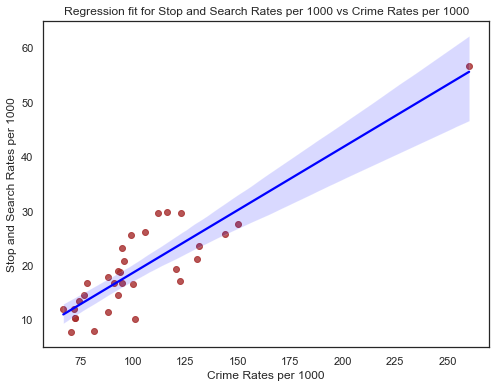

In [644]:
formula = 'Q("stop_and_search_rate_of_borough_per_1000") ~ Q("crime_rate_per_1000")'

# Conducting the regression
model = smf.ols(formula, data=merged_df).fit()

# Printing out the statistics
print(f'Regression results for Stop and Search Rates per 1000 vs Crime Rates per 1000:')
print(model.summary())

# Calculating and print the correlation coefficient
corr = crime_2021['crime_rate_per_1000'].corr(stop_and_search_rates_borough['stop_and_search_rate_of_borough_per_1000'])
print(f'\nCorrelation coefficient between Stop adn Search Rates and Crime Rates: {corr}\n')

# Plotting the data and the regression model fit
plt.figure(figsize=(8,6))
sns.regplot(x='crime_rate_per_1000', 
            y='stop_and_search_rate_of_borough_per_1000', 
            data=merged_df,
            scatter_kws={"color": "brown"}, line_kws={"color": "blue"})
plt.title(f'Regression fit for Stop and Search Rates per 1000 vs Crime Rates per 1000')
plt.xlabel('Crime Rates per 1000')
plt.ylabel('Stop and Search Rates per 1000')

plt.show()
print('\n\n')

In [645]:
# merge the two dataframes on 'Borough'
ssr_merged_ethnic_df = pd.merge(crime_2021, stop_and_search_rates_borough_ethnic, on='Borough')
ssr_merged_ethnic_df = ssr_merged_ethnic_df[['Borough','crime_rate_per_1000','Ethnic group','stop_and_search_rate_per_1000']]
ssr_merged_ethnic_df

Borough  crime_rate_per_1000 Ethnic group  \
0    Barking and Dagenham            95.782447        Black   
1    Barking and Dagenham            95.782447        Asian   
2    Barking and Dagenham            95.782447        Mixed   
3    Barking and Dagenham            95.782447        White   
4    Barking and Dagenham            95.782447        Other   
..                    ...                  ...          ...   
155                Newham           105.871293        Asian   
156                Newham           105.871293        White   
157                Newham           105.871293        Mixed   
158                Newham           105.871293        Black   
159                Newham           105.871293        Other   

     stop_and_search_rate_per_1000  
0                        20.979768  
1                        14.562678  
2                        14.270386  
3                        20.340880  
4                        80.522445  
..                             ...  
155                      15.392713  
156                      24.854790  
157                      12.424630  
158                      35.349581  
159                     107.248908  

[160 rows x 4 columns]

In [646]:
# Defining color map
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}

# Looping over each ethnicity group
for ethnicity in ssr_merged_ethnic_df['Ethnic group'].unique():
    
    # Subsetting the dataframe for this ethnicity
    ethnicity_data = ssr_merged_ethnic_df[ssr_merged_ethnic_df['Ethnic group'] == ethnicity]
  
    # Calculating and print the correlation coefficient
    corr = ethnicity_data['stop_and_search_rate_per_1000'].corr(ethnicity_data['crime_rate_per_1000'])
    print(f'\nCorrelation coefficient between Stop and Search Rates and the Crimes Rates for {ethnicity}: {corr}\n')

    # Plotting the data with scatter plot
    fig = px.scatter(ethnicity_data, 
                     x='crime_rate_per_1000', 
                     y='stop_and_search_rate_per_1000',
                     title=f'Stop and Search Rates of {ethnicity} vs Crime Rate of each Borough',
                     color_discrete_sequence=[color_map[ethnicity]]) # Use color map,


    fig.update_layout(
        autosize=False,
        width=730,
        title={
            'text': f'Stop and Search Rates of {ethnicity} vs Crime Rate of each Borough',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})

    fig.show()
    print('\n\n')


Correlation coefficient between Stop and Search Rates and the Crimes Rates for Black: 0.8252982766402235







Correlation coefficient between Stop and Search Rates and the Crimes Rates for Asian: 0.7769970350265502







Correlation coefficient between Stop and Search Rates and the Crimes Rates for Mixed: 0.9104893035408772







Correlation coefficient between Stop and Search Rates and the Crimes Rates for White: 0.6421691825569108







Correlation coefficient between Stop and Search Rates and the Crimes Rates for Other: 0.45118009269753384




Regression summary for Black:
                                  OLS Regression Results                                 
Dep. Variable:     stop_and_search_rate_per_1000   R-squared:                       0.681
Model:                                       OLS   Adj. R-squared:                  0.670
Method:                            Least Squares   F-statistic:                     64.08
Date:                           Fri, 04 Aug 2023   Prob (F-statistic):           6.19e-09
Time:                                   17:31:10   Log-Likelihood:                -123.65
No. Observations:                             32   AIC:                             251.3
Df Residuals:                                 30   BIC:                             254.2
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                          coef    std err          t      P>|t|      

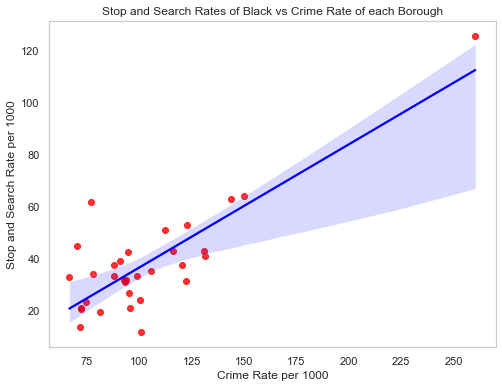





Regression summary for Asian:
                                  OLS Regression Results                                 
Dep. Variable:     stop_and_search_rate_per_1000   R-squared:                       0.604
Model:                                       OLS   Adj. R-squared:                  0.591
Method:                            Least Squares   F-statistic:                     45.70
Date:                           Fri, 04 Aug 2023   Prob (F-statistic):           1.70e-07
Time:                                   17:31:10   Log-Likelihood:                -94.755
No. Observations:                             32   AIC:                             193.5
Df Residuals:                                 30   BIC:                             196.4
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                          coef    std err          t      P>|t|   

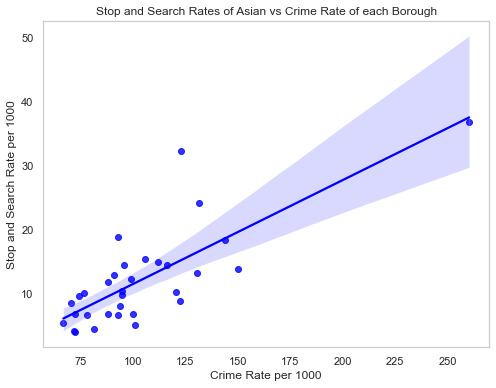





Regression summary for Mixed:
                                  OLS Regression Results                                 
Dep. Variable:     stop_and_search_rate_per_1000   R-squared:                       0.829
Model:                                       OLS   Adj. R-squared:                  0.823
Method:                            Least Squares   F-statistic:                     145.4
Date:                           Fri, 04 Aug 2023   Prob (F-statistic):           4.93e-13
Time:                                   17:31:11   Log-Likelihood:                -76.965
No. Observations:                             32   AIC:                             157.9
Df Residuals:                                 30   BIC:                             160.9
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                          coef    std err          t      P>|t|   

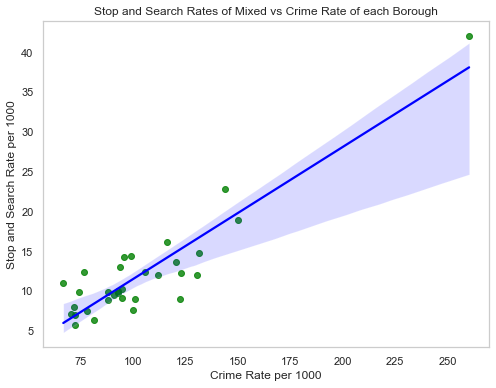





Regression summary for White:
                                  OLS Regression Results                                 
Dep. Variable:     stop_and_search_rate_per_1000   R-squared:                       0.412
Model:                                       OLS   Adj. R-squared:                  0.393
Method:                            Least Squares   F-statistic:                     21.05
Date:                           Fri, 04 Aug 2023   Prob (F-statistic):           7.43e-05
Time:                                   17:31:11   Log-Likelihood:                -91.335
No. Observations:                             32   AIC:                             186.7
Df Residuals:                                 30   BIC:                             189.6
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                          coef    std err          t      P>|t|   

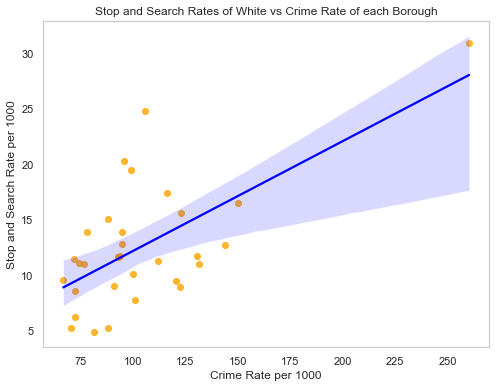





Regression summary for Other:
                                  OLS Regression Results                                 
Dep. Variable:     stop_and_search_rate_per_1000   R-squared:                       0.204
Model:                                       OLS   Adj. R-squared:                  0.177
Method:                            Least Squares   F-statistic:                     7.668
Date:                           Fri, 04 Aug 2023   Prob (F-statistic):            0.00955
Time:                                   17:31:11   Log-Likelihood:                -160.02
No. Observations:                             32   AIC:                             324.0
Df Residuals:                                 30   BIC:                             327.0
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                          coef    std err          t      P>|t|   

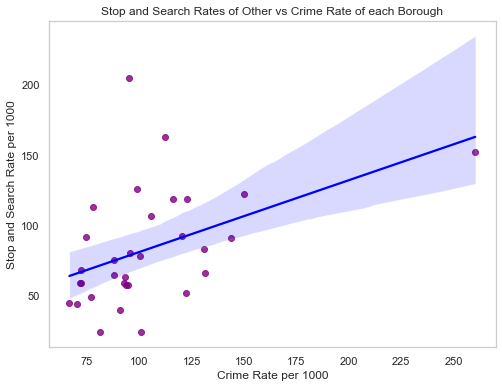

In [647]:
# Looping over each ethnicity group
for ethnicity in ssr_merged_ethnic_df['Ethnic group'].unique():
    
    # Subsetting the dataframe for this ethnicity
    ethnicity_data = ssr_merged_ethnic_df[ssr_merged_ethnic_df['Ethnic group'] == ethnicity]
  
    # Fitting the linear regression model
    X = ethnicity_data['crime_rate_per_1000']
    y = ethnicity_data['stop_and_search_rate_per_1000']
    X = sm.add_constant(X)  # Adding a constant term
    model = sm.OLS(y, X).fit()
    
    # Printing the regression summary
    print(f'\nRegression summary for {ethnicity}:')
    print(model.summary())
    
    # Plotting the data with scatter plot and regression line
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    sns.regplot(x='crime_rate_per_1000', y='stop_and_search_rate_per_1000', data=ethnicity_data, scatter_kws={'color': color_map[ethnicity]}, line_kws={'color': 'blue'})
    plt.title(f'Stop and Search Rates of {ethnicity} vs Crime Rate of each Borough')
    plt.xlabel('Crime Rate per 1000')
    plt.ylabel('Stop and Search Rate per 1000')
    plt.grid(False)
    plt.show()
    print('\n\n')


#### DI

In [648]:
disproportionality_NRTW = combined_df_2021[['Borough','Ethnic group', 'Disproportionality Index']]
disproportionality_NRTW

Borough Ethnic group  Disproportionality Index
0    Barking and Dagenham        Asian                  0.696993
1    Barking and Dagenham        Black                  1.004125
2    Barking and Dagenham        Mixed                  0.683003
3    Barking and Dagenham        Other                  3.853931
4    Barking and Dagenham        White                  0.973547
..                    ...          ...                       ...
155           Westminster        Asian                  0.651440
156           Westminster        Black                  2.216678
157           Westminster        Mixed                  0.742431
158           Westminster        Other                  2.694907
159           Westminster        White                  0.545716

[160 rows x 3 columns]

In [649]:
# merging the datasets on borough names
crime_rates_dis_NRTW = pd.merge(disproportionality_NRTW, crime_rate_per_head_2021, left_on='Borough', right_on='Borough', how='left')
crime_rates_dis_NRTW.head(20)

Borough Ethnic group  Disproportionality Index  \
0   Barking and Dagenham        Asian                  0.696993   
1   Barking and Dagenham        Black                  1.004125   
2   Barking and Dagenham        Mixed                  0.683003   
3   Barking and Dagenham        Other                  3.853931   
4   Barking and Dagenham        White                  0.973547   
5                 Barnet        Asian                  0.571835   
6                 Barnet        Black                  2.426318   
7                 Barnet        Mixed                  0.801794   
8                 Barnet        Other                  3.102590   
9                 Barnet        White                  0.610597   
10                Bexley        Asian                  0.351925   
11                Bexley        Black                  1.127169   
12                Bexley        Mixed                  0.662213   
13                Bexley        Other                  4.923820   
14                Bexley        White                  0.950196   
15                 Brent        Asian                  0.434921   
16                 Brent        Black                  1.698404   
17                 Brent        Mixed                  0.697541   
18                 Brent        Other                  3.081638   
19                 Brent        White                  0.627819   

    crime_rate_per_head  
0              0.095782  
1              0.095782  
2              0.095782  
3              0.095782  
4              0.095782  
5              0.081339  
6              0.081339  
7              0.081339  
8              0.081339  
9              0.081339  
10             0.071930  
11             0.071930  
12             0.071930  
13             0.071930  
14             0.071930  
15             0.093605  
16             0.093605  
17             0.093605  
18             0.093605  
19             0.093605

In [650]:
# Defining color map
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}

# Looping over each ethnicity group
for ethnicity in crime_rates_dis_NRTW['Ethnic group'].unique():
    
    # Subsetting the dataframe for this ethnicity
    ethnicity_data = crime_rates_dis_NRTW[crime_rates_dis_NRTW['Ethnic group'] == ethnicity]
  
    # Calculating and print the correlation coefficient
    corr = ethnicity_data['Disproportionality Index'].corr(ethnicity_data['crime_rate_per_head'])
    print(f'\nCorrelation coefficient between Disproportionality Index and the Crimes Rates for {ethnicity}: {corr}\n')

    # Plotting the data with scatter plot
    fig = px.scatter(ethnicity_data, 
                     x='crime_rate_per_head', 
                     y='Disproportionality Index',
                     title=f'Disproportionality Index of {ethnicity} vs Crime Rate of each Borough',
                     color_discrete_sequence=[color_map[ethnicity]]) # Use color map,


    fig.update_layout(
        autosize=False,
        width=730,
        title={
            'text': f'Disproportionality Index of {ethnicity} vs Crime Rate of each Borough',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
    
    
    fig.update_xaxes(title_text='Crime Rate per Head')

    fig.show()
    print('\n\n')


Correlation coefficient between Disproportionality Index and the Crimes Rates for Asian: 0.10887775800728833







Correlation coefficient between Disproportionality Index and the Crimes Rates for Black: -0.13906529284648175







Correlation coefficient between Disproportionality Index and the Crimes Rates for Mixed: -0.03827418901629238







Correlation coefficient between Disproportionality Index and the Crimes Rates for Other: -0.3519314401076582







Correlation coefficient between Disproportionality Index and the Crimes Rates for White: -0.4408768383243118



#### DIRTW

In [651]:
disproportionality_RTW = combined_df_2021[['Borough','Ethnic group', 'SSR Compared to White']]
disproportionality_RTW

Borough Ethnic group  SSR Compared to White
0    Barking and Dagenham        Asian               0.715932
1    Barking and Dagenham        Black               1.031409
2    Barking and Dagenham        Mixed               0.701562
3    Barking and Dagenham        Other               3.958651
4    Barking and Dagenham        White               1.000000
..                    ...          ...                    ...
155           Westminster        Asian               1.193735
156           Westminster        Black               4.061964
157           Westminster        Mixed               1.360472
158           Westminster        Other               4.938298
159           Westminster        White               1.000000

[160 rows x 3 columns]

In [652]:
# merging the datasets on borough names
crime_rates_dis_RTW = pd.merge(disproportionality_RTW, crime_rate_per_head_2021, left_on='Borough', right_on='Borough', how='left')
crime_rates_dis_RTW.head(20)

Borough Ethnic group  SSR Compared to White  \
0   Barking and Dagenham        Asian               0.715932   
1   Barking and Dagenham        Black               1.031409   
2   Barking and Dagenham        Mixed               0.701562   
3   Barking and Dagenham        Other               3.958651   
4   Barking and Dagenham        White               1.000000   
5                 Barnet        Asian               0.936517   
6                 Barnet        Black               3.973680   
7                 Barnet        Mixed               1.313130   
8                 Barnet        Other               5.081237   
9                 Barnet        White               1.000000   
10                Bexley        Asian               0.370371   
11                Bexley        Black               1.186249   
12                Bexley        Mixed               0.696922   
13                Bexley        Other               5.181899   
14                Bexley        White               1.000000   
15                 Brent        Asian               0.692749   
16                 Brent        Black               2.705244   
17                 Brent        Mixed               1.111054   
18                 Brent        Other               4.908479   
19                 Brent        White               1.000000   

    crime_rate_per_head  
0              0.095782  
1              0.095782  
2              0.095782  
3              0.095782  
4              0.095782  
5              0.081339  
6              0.081339  
7              0.081339  
8              0.081339  
9              0.081339  
10             0.071930  
11             0.071930  
12             0.071930  
13             0.071930  
14             0.071930  
15             0.093605  
16             0.093605  
17             0.093605  
18             0.093605  
19             0.093605

In [653]:
# Defining color map
color_map = {
    'Asian': 'blue',
    'Black': 'red',
    'Mixed': 'green',
    'Other': 'purple',
    'White': 'orange'
}

# Looping over each ethnicity group
for ethnicity in crime_rates_dis_RTW['Ethnic group'].unique():
    
    # Subsetting the dataframe for this ethnicity
    ethnicity_data = crime_rates_dis_RTW[crime_rates_dis_RTW['Ethnic group'] == ethnicity]
  
    # Calculating and print the correlation coefficient
    corr = ethnicity_data['SSR Compared to White'].corr(ethnicity_data['crime_rate_per_head'])
    print(f'\nCorrelation coefficient between Disproportionality Index Comapred to White and the Crimes Rates for {ethnicity}: {corr}\n')

    # Plotting the data with scatter plot
    fig = px.scatter(ethnicity_data, 
                     x='crime_rate_per_head', 
                     y='SSR Compared to White',
                     title=f'Disproportionality Index of {ethnicity} Compared to White vs Crime Rate of each Borough',
                     color_discrete_sequence=[color_map[ethnicity]]) # Use color map,


    fig.update_layout(
        autosize=False,
        width=730,
        title={
            'text': f'Disproportionality Index of {ethnicity} Relative to White vs Crime Rate of each Borough',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
    fig.update_xaxes(title_text='Crime Rate per Head')
    fig.update_yaxes(title_text='Disproportionality Index Relative to White')
    fig.show()
    print('\n\n')


Correlation coefficient between Disproportionality Index Comapred to White and the Crimes Rates for Asian: 0.307683543479811







Correlation coefficient between Disproportionality Index Comapred to White and the Crimes Rates for Black: 0.09191757913070703







Correlation coefficient between Disproportionality Index Comapred to White and the Crimes Rates for Mixed: 0.3229654108974942







Correlation coefficient between Disproportionality Index Comapred to White and the Crimes Rates for Other: -0.05760690818017914







Correlation coefficient between Disproportionality Index Comapred to White and the Crimes Rates for White: nan

